# Neural Nets

 a few ANNs that perform various logical computations:
        
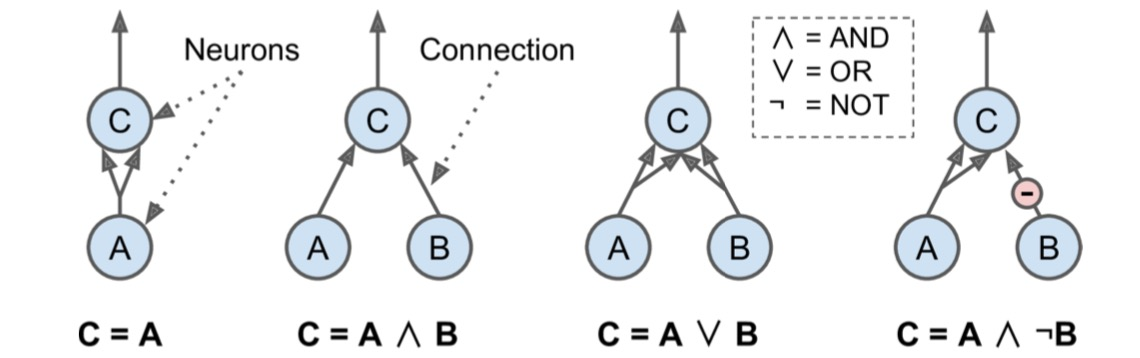

Warren McCulloch and Walter Pitts proposed a very simple model of the biological neuron, which later became known as an artificial neuron: it has one or more binary (on/off) inputs and one binary output. The artificial neuron simply activates its out‐ put when more than a certain number of its inputs are active. McCulloch and Pitts showed that even with such a simplified model it is possible to build a network of artificial neurons that computes any logical proposition you want.

• The first network on the left is simply the identity function: if neuron A is activa‐ ted, then neuron C gets activated as well (since it receives two input signals from neuron A), but if neuron A is off, then neuron C is off as well.

• The second network performs a logical AND: neuron C is activated only when both neurons A and B are activated (a single input signal is not enough to acti‐ vate neuron C).

• The third network performs a logical OR: neuron C gets activated if either neu‐ ron A or neuron B is activated (or both).

• Finally, if we suppose that an input connection can inhibit the neuron’s activity (which is the case with biological neurons), then the fourth network computes a slightly more complex logical proposition: neuron C is activated only if neuron A is active and if neuron B is off. If neuron A is active all the time, then you get a logical NOT: neuron C is active when neuron B is off, and vice versa

### Perceptron

The Perceptron is one of the simplest ANN architectures. 
It is based on a slightly different artificial neuron called a threshold logic unit (TLU), or sometimes a linear threshold unit (LTU): the inputs and output are now numbers (instead of binary on/off values) and each input con‐ nection is associated with a weight. The TLU computes a weighted sum of its inputs (z = w1 x1 + w2 x2 + ⋯ + wn xn = xT w), then applies a step function to that sum and outputs the result: hw(x) = step(z), where z = xT w.

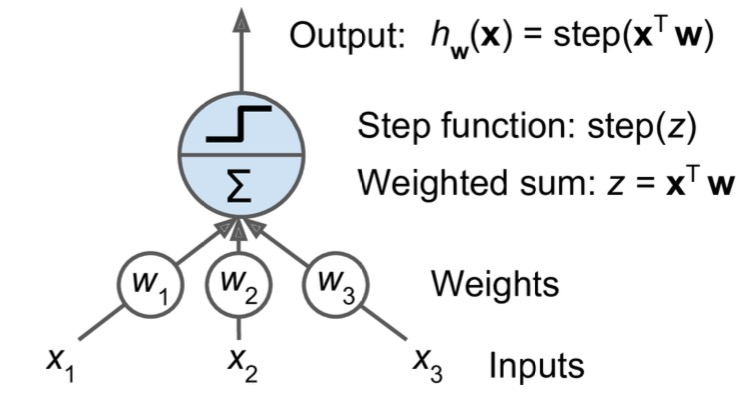

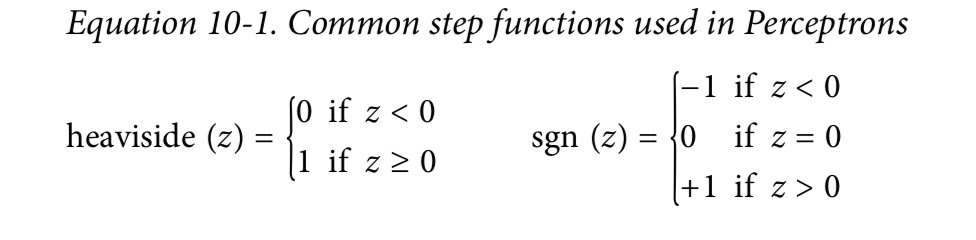

A Perceptron with two inputs and three outputs is represented: 
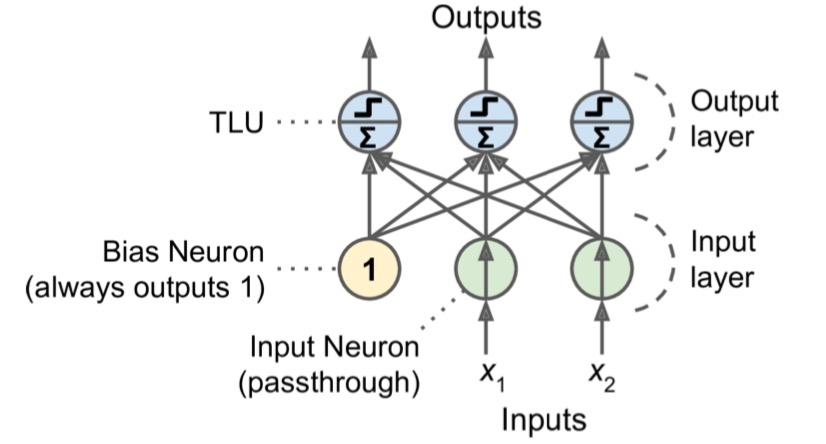

This Perceptron can classify instances simultaneously into three different binary classes, which makes it a multi‐ output classifier.

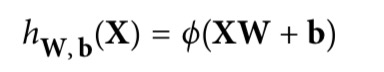

• As always, X represents the matrix of input features. It has one row per instance, one column per feature.
• The weight matrix W contains all the connection weights except for the ones from the bias neuron. It has one row per input neuron and one column per artifi‐ cial neuron in the layer.
• The bias vector b contains all the connection weights between the bias neuron and the artificial neurons. It has one bias term per artificial neuron.
• The function φ is called the activation function: when the artificial neurons are TLUs, it is a step function (but we will discuss other activation functions shortly).

The Perceptron training algorithm:
    
   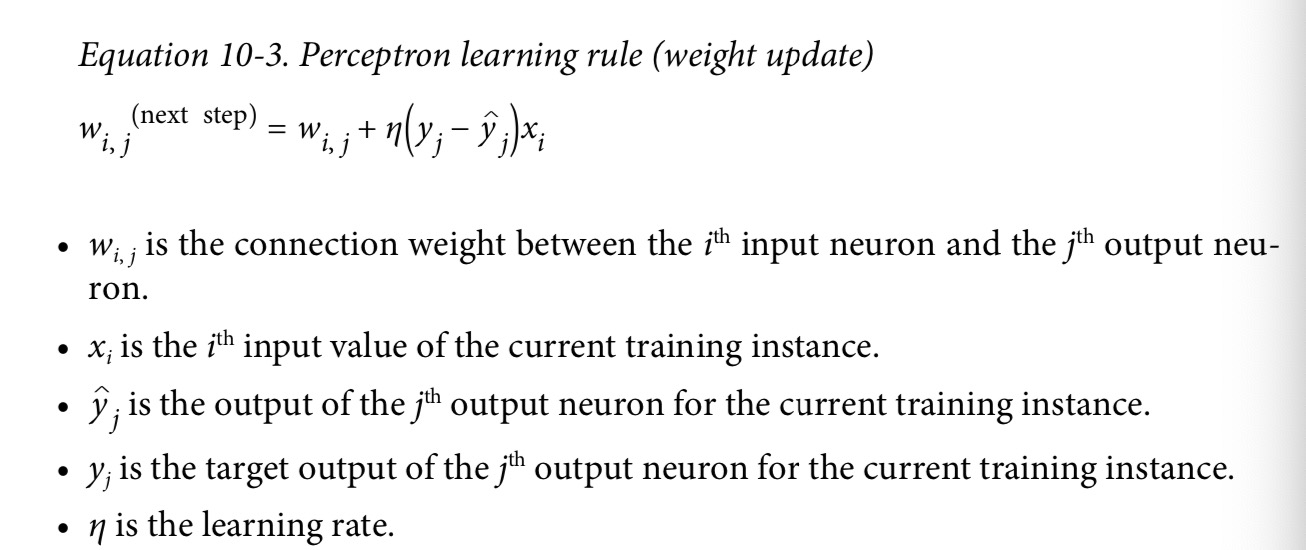
   
   The connection weight between two neurons is increased whenever they have the same output. Perceptrons are trained using a var‐ iant of this rule that takes into account the error made by the network; it reinforces connections that help reduce the error. More specifically, the Perceptron is fed one training instance at a time, and for each instance it makes its predictions. For every output neuron that produced a wrong prediction, it reinforces the connection weights from the inputs that would have contributed to the correct prediction.
    

### Model: 

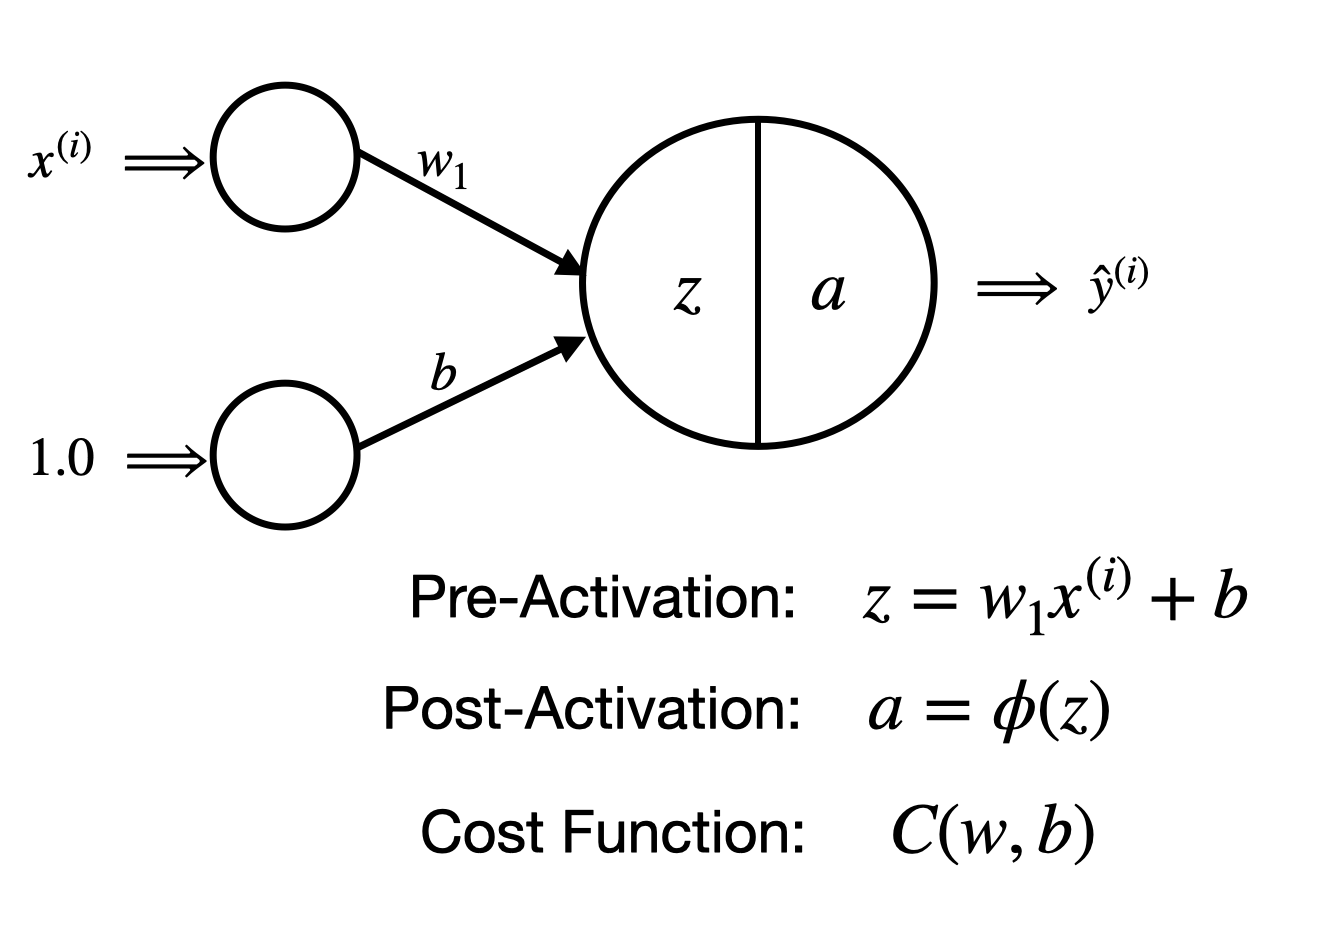

The Sigmoid Activation Function: 
  
  σ(z) = 1 / (1 + exp(–z)) 
  
  the range is from 0 to 1
  
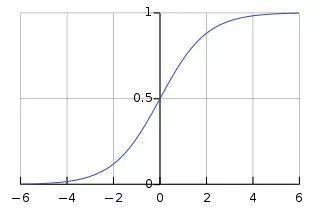

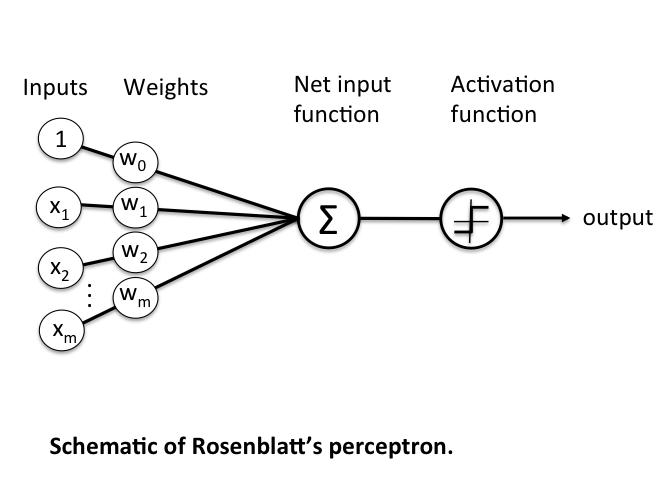

In [22]:
import numpy as np
class Perceptron(object):
    """Implements a perceptron network"""
    def __init__(self, input_size):
        self.W = np.zeros(input_size+1)
    def activation_fn(self, x):
        return 1 if x >= 0 else 0

    def predict(self, x):
        x = np.insert(x, 0, 1)
        z = self.W.T.dot(x)
        a = self.activation_fn(z)
        return a

In [23]:
def fit(self, X, d):
    for _ in range(self.epochs):
        for i in range(d.shape[0]):
            y = self.predict(X[i])
            e = d[i] - y
            self.W = self.W + self.lr * e * np.insert(X[i], 0, 1)

In [24]:
class Perceptron(object):
    """Implements a perceptron network"""
    def __init__(self, input_size, lr=1, epochs=100):
        self.W = np.zeros(input_size+1)
        # add one for bias
        self.epochs = epochs
        self.lr = lr
    
    def activation_fn(self, x):
        #return (x >= 0).astype(np.float32)
        return 1 if x >= 0 else 0
    def predict(self, x):
        z = self.W.T.dot(x)
        a = self.activation_fn(z)
        return a
    def fit(self, X, d):
        for _ in range(self.epochs):
            for i in range(d.shape[0]):
                x = np.insert(X[i], 0, 1)
                y = self.predict(x)
                e = d[i] - y
                self.W = self.W + self.lr * e * x

In [25]:
if __name__ == '__main__':
    X = np.array([
        [0, 0],
        [0, 1],
        [1, 0],
        [1, 1]
    ])
    d = np.array([0, 0, 0, 1])
    perceptron = Perceptron(input_size=2)
    perceptron.fit(X, d)
    print(perceptron.W)

[-3.  2.  1.]


### Multiple Layer Perceptron

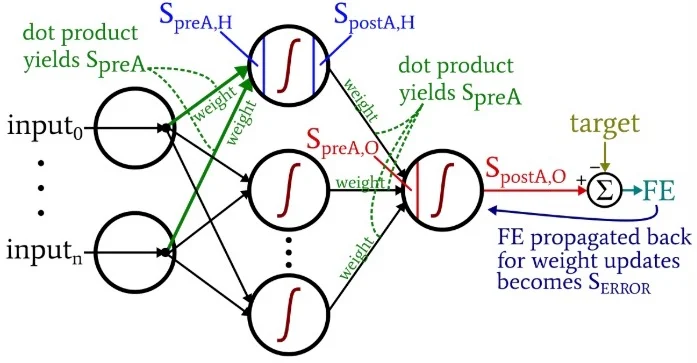

A standard Artificial Neural Network will be made of multiple layers:

1. An Input Layer, that pass the features to the NN

2. An arbitrary number of Hidden Layers, containing an arbitrary number of neurons for each layer, that receives the inputs and elaborate them. We will introduce Hidden Layers with ReLU activator, since in the hidden part of the NN we don't need the output to be contained in the  [0,1]  range.

3. An Output Layer: these layers contains a number of neurons equal to the number of possible labels we want to have a prediction to; this is because the output of the NN is thus a vector whose dimension is the same as the cardinality of the set of labels, and its entries are the probability for each label for the element whose feateures we have passed to the NN. This means that we will use a sigmoid activator to the Output layer, so we squeeze each perceptron's output between 0 and 1.

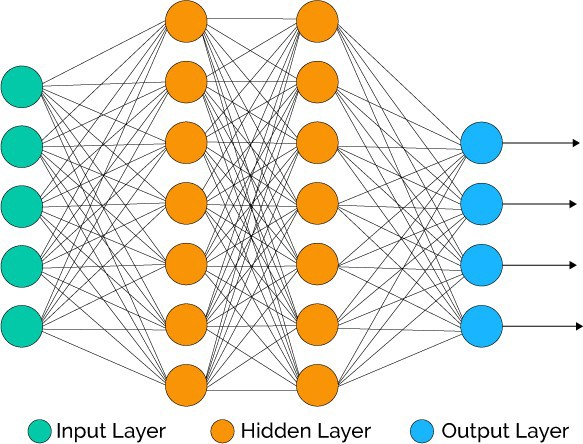

#### Coding Part: 

In [1]:
import numpy as np

In [2]:
def sigmoid(x):
    # our activation function: f(x) = 1 / (1 * e^(-x))
    return 1 / (1 + np.exp(-x))

class Neuron():
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias
        
    def feedforward(self, inputs):
        # weight inputs, add bias, then use the activation function
        total = np.dot(self.weights, inputs) + self.bias
        return sigmoid(total)
    
weights = np.array([0, 1]) # w1 = 0, w2 = 1
bias = 4
n = Neuron(weights, bias)

# inputs
x = np.array([2, 3])   # x1 = 2, x2 = 3
print(n.feedforward(x)) # 0.9990889488055994

0.9990889488055994


In [8]:
class OurNeuralNetworks():
    """
    A neural network with:
      - 2 inputs
      - a hidden layer with 2 neurons (h1, h2)
      - an output layer with 1 neuron (o1)
    Each neural has the same weights and bias:
      - w = [0, 1]
      - b = 0
    """
    def __init__(self):
        weights = np.array([0, 1])
        bias = 0
        
        # The Neuron class here is from the previous section
        self.h1 = Neuron(weights, bias)
        self.h2 = Neuron(weights, bias)
        self.o1 = Neuron(weights, bias)
        
    def feedforward(self, x):
        out_h1 = self.h1.feedforward(x)
        out_h2 = self.h2.feedforward(x)

        # The inputs for o1 are the outputs from h1 and h2
        out_o1 = self.o1.feedforward(np.array([out_h1, out_h2]))
        return out_o1
        
network = OurNeuralNetworks()
x = np.array([2, 3])
print(network.feedforward(x)) # 0.7216325609518421

0.7216325609518421


we will use known factor to imply unknow factor:

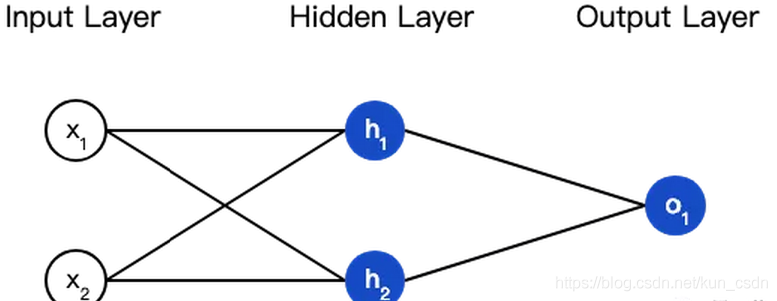

on our next step we will caculate the loss: (mse)
MSE= 

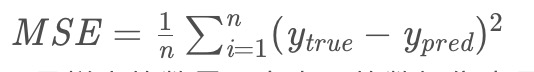

y_true is the actural value 
y_pred is the predicted value
n is the number of sample 

In [9]:
import numpy as np

def mse_loss(y_true, y_pred):
    # y_true and y_pred are numpy arrays of the same length
    return ((y_true - y_pred) ** 2).mean()
    #1 means yes; 0 means no
y_true = np.array([1, 0, 0, 1]) 
y_pred = np.array([0, 0, 0, 0])

print(mse_loss(y_true, y_pred)) # 0.5


0.5


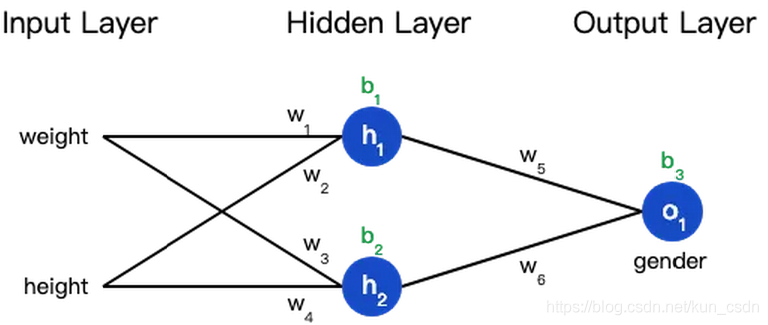

In [10]:
def sigmoid(x):
    # Sigmoid activation function: f(x) = 1 / (1 + e^(-x))
    return 1 / (1 + np.exp(-x))

def deriv_sigmoid(x):
    # Derivative of sigmoid: f'(x) = f(x) * (1 - f(x))
    fx = sigmoid(x)
    return fx * (1 - fx)

def mse_loss(y_true, y_pred):
    # y_true and y_pred are numpy arrays of the same length
    return ((y_true - y_pred) ** 2).mean()

class OurNeuralNetwork():
    """
    A neural network with:
      - 2 inputs
      - a hidden layer with 2 neurons (h1, h2)
      - an output layer with 1 neuron (o1)
      
    *** DISCLAIMER ***
    The code below is intend to be simple and educational, NOT optimal.
    Real neural net code looks nothing like this. Do NOT use this code.
    Instead, read/run it to understand how this specific network works.
    """
    def __init__(self):
        # weights
        self.w1 = np.random.normal()
        self.w2 = np.random.normal()
        self.w3 = np.random.normal()
        self.w4 = np.random.normal()
        self.w5 = np.random.normal()
        self.w6 = np.random.normal()
        # biases
        self.b1 = np.random.normal()
        self.b2 = np.random.normal()
        self.b3 = np.random.normal()
        
    def feedforward(self, x):
        # x is a numpy array with 2 elements, for example [input1, input2]
        h1 = sigmoid(self.w1 * x[0] + self.w2 * x[1] + self.b1)
        h2 = sigmoid(self.w3 * x[0] + self.w4 * x[1] + self.b2)
        o1 = sigmoid(self.w5 * h1 + self.w6 * h2 + self.b3)
        return o1
    
    def train(self, data, all_y_trues):
        """
        - data is a (n x 2) numpy array, n = # samples in the dataset.
        - all_y_trues is a numpy array with n elements.
        Elements in all_y_trues correspond to those in data.
        """
        learn_rate = 0.1
        epochs = 1000 # number of times to loop through the entire dataset
        
        for epoch in range(epochs):
            for x, y_true in zip(data, all_y_trues):
                
                # - - - Do a feedforward (we'll need these values later)
                sum_h1 = self.w1 * x[0] + self.w2 * x[1] + self.b1
                h1 = sigmoid(sum_h1)
                
                sum_h2 = self.w3 * x[0] + self.w4 * x[1] + self.b2
                h2 = sigmoid(sum_h2)
                
                sum_o1 = self.w5 * x[0] + self.w6 * x[1] + self.b3
                o1 = sigmoid(sum_o1)
                y_pred = o1
                
                # - - - Calculate partial derivatives.
                # - - - Naming: d_L_d_w1 represents "partial L / partial w1"
                d_L_d_ypred = -2 * (y_true - y_pred)
                
                # Neuron o1
                d_ypred_d_w5 = h1 * deriv_sigmoid(sum_o1)
                d_ypred_d_w6 = h2 * deriv_sigmoid(sum_o1)
                d_ypred_d_b3 = deriv_sigmoid(sum_o1)
                
                d_ypred_d_h1 = self.w5 * deriv_sigmoid(sum_o1)
                d_ypred_d_h2 = self.w6 * deriv_sigmoid(sum_o1)
                
                # Neuron h1
                d_h1_d_w1 = x[0] * deriv_sigmoid(sum_h1)
                d_h1_d_w2 = x[1] * deriv_sigmoid(sum_h1)
                d_h1_d_b1 = deriv_sigmoid(sum_h1)
                
                # Neuron h2
                d_h2_d_w3 = x[0] * deriv_sigmoid(sum_h2)
                d_h2_d_w4 = x[0] * deriv_sigmoid(sum_h2)
                d_h2_d_b2 = deriv_sigmoid(sum_h2)
                
                # - - - update weights and biases
                # Neuron o1
                self.w5 -= learn_rate * d_L_d_ypred * d_ypred_d_w5
                self.w6 -= learn_rate * d_L_d_ypred * d_ypred_d_w6
                self.b3 -= learn_rate * d_L_d_ypred * d_ypred_d_b3
                
                # Neuron h1
                self.w1 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_w1
                self.w2 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_w2
                self.b1 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_b1
                
                # Neuron h2
                self.w3 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_w3
                self.w4 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_w4
                self.b2 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_b2
                
            # - - - Calculate total loss at the end of each epoch
            if epoch % 10 == 0:
                y_preds = np.apply_along_axis(self.feedforward, 1, data)
                loss = mse_loss(all_y_trues, y_preds)
                print("epoch & loss", (epoch, loss))
                
# Define dataset
data = np.array([
    [-2, -1], # A
    [25, 6],  # B
    [17, 4],  # C
    [-15, -6] # d
])
all_y_trues = np.array([
    1, # A
    0, # B
    0, # C
    1 # d
])

# Train our neural network!
network = OurNeuralNetwork()
network.train(data, all_y_trues)

epoch & loss (0, 0.2816708942463918)
epoch & loss (10, 0.26169880804961504)
epoch & loss (20, 0.2535203794005927)
epoch & loss (30, 0.2568943664194704)
epoch & loss (40, 0.2702982201589169)
epoch & loss (50, 0.29144469697883196)
epoch & loss (60, 0.3169666979798149)
epoch & loss (70, 0.34040440804150396)
epoch & loss (80, 0.3569232168343921)
epoch & loss (90, 0.3413596351026275)
epoch & loss (100, 0.25284046420297485)
epoch & loss (110, 0.26044336586743544)
epoch & loss (120, 0.27440226862831285)
epoch & loss (130, 0.2920185169866952)
epoch & loss (140, 0.3122643986822181)
epoch & loss (150, 0.3327082504980575)
epoch & loss (160, 0.35090483447255744)
epoch & loss (170, 0.36597577569847)
epoch & loss (180, 0.3781752534740607)
epoch & loss (190, 0.3880720227341288)
epoch & loss (200, 0.3961965985081105)
epoch & loss (210, 0.40296409656184423)
epoch & loss (220, 0.4086831799119236)
epoch & loss (230, 0.4135811072322104)
epoch & loss (240, 0.4178262014474449)
epoch & loss (250, 0.421544655

In [11]:
emily = np.array([-15, -9]) 
frank = np.array([20, 10])  
print("Emily: %.3f" % network.feedforward(emily)) 
print("Frank: %.3f" % network.feedforward(frank)) 

Emily: 1.000
Frank: 0.973


#### Coding Part 2:

In [29]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
        
data = pd.read_csv('FEV.csv')
np.random.seed(10)
data.head(4)

Id  Age    FEV   Hgt  Sex  Smoke
0  301    9  1.708  57.0    0      0
1  451    8  1.724  67.5    0      0
2  501    7  1.720  54.5    0      0
3  642    9  1.558  53.0    1      0

In [67]:
dict_live = data['Smoke']  
features = data[['Age', 'FEV']].to_numpy()
labels = data['Smoke'].to_numpy()

In [31]:
# Define the sigmoid activator; we ask if we want the sigmoid or its derivative
def sigmoid_act(x, der=False):
    import numpy as np
    
    if (der==True) : #derivative of the sigmoid
        f = x/(1-x)
    else : # sigmoid
        f = 1/(1+ np.exp(-x))
    
    return f
# We may employ the Rectifier Linear Unit (ReLU)
def ReLU_act(x, der=False):
    import numpy as np
    
    if (der== True):
        if x>0 :
            f= 1
        else :
            f = 0
    else :
        if x>0:
            f = x
        else :
            f = 0
    return f
def perceptron(X, act='Sigmoid'): 
    import numpy as np
    
    shapes = X.shape # Pick the number of (rows, columns)!
    n= shapes[0]+shapes[1]
    # Generating random weights and bias
    w = 2*np.random.random(shapes) - 0.5 # We want w to be between -1 and 1
    b = np.random.random(1)
    
    # Initialize the function
    f = b[0]
    for i in range(0, X.shape[0]-1) : # run over column elements
        for j in range(0, X.shape[1]-1) : # run over rows elements
            f += w[i, j]*X[i,j]/n
    # Pass it to the activation function and return it as an output
    if act == 'Sigmoid':
        output = sigmoid_act(f)
    else :
        output = ReLU_act(f)
        
    return output

In [33]:
print('Output with sigmoid activator: ', perceptron(features))
print('Output with ReLU activator: ', perceptron(features))

Output with sigmoid activator:  0.9952673297405776
Output with ReLU activator:  0.9962664561045216


In [34]:
import numpy as np

# Define the sigmoid activator; we ask if we want the sigmoid or its derivative
def sigmoid_act(x, der=False):
    import numpy as np
    
    if (der==True) : #derivative of the sigmoid
        f = 1/(1+ np.exp(- x))*(1-1/(1+ np.exp(- x)))
    else : # sigmoid
        f = 1/(1+ np.exp(- x))
    
    return f

In [35]:
# We may employ the Rectifier Linear Unit (ReLU)
def ReLU_act(x, der=False):
    import numpy as np
    
    if (der == True): # the derivative of the ReLU is the Heaviside Theta
        f = np.heaviside(x, 1)
    else :
        f = np.maximum(x, 0)
    
    return f

In [36]:
# split into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(features, labels, test_size=0.30)

print('Training records:',Y_train.size)
print('Test records:',Y_test.size)

Training records: 457
Test records: 197


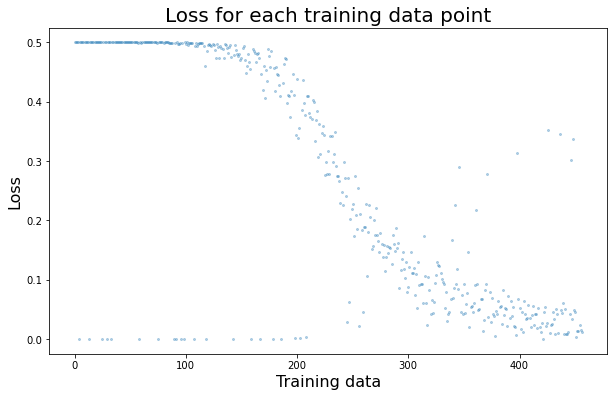

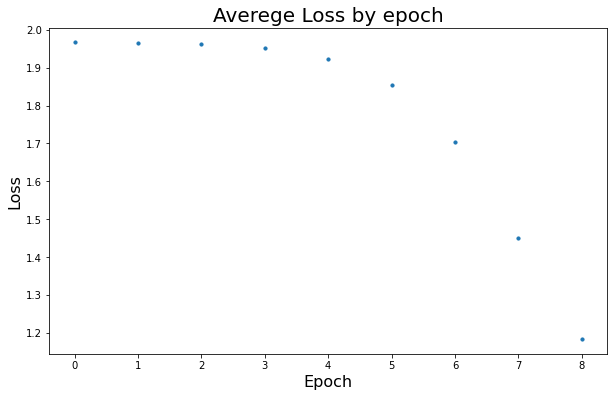

In [39]:
# Set up the number of perceptron per each layer:
p=4 # Layer 1
q=4 # Layer 2

# Set up the Learning rate
eta =  1/623


# 0: Random initialize the relevant data 
w1 = 2*np.random.rand(p , X_train.shape[1]) - 0.5 # Layer 1
b1 = np.random.rand(p)

w2 = 2*np.random.rand(q , p) - 0.5  # Layer 2
b2 = np.random.rand(q)

wOut = 2*np.random.rand(q) - 0.5  # Output Layer
bOut = np.random.rand(1)

mu = []
vec_y = []

for I in range(0, X_train.shape[0]): #loop in all the passengers:
    
    # 1: input the data 
    x = X_train[I]
    
    
    # 2: Start the algorithm
    
    # 2.1: Feed forward
    z1 = ReLU_act(np.dot(w1, x) + b1) # output layer 1 
    z2 = ReLU_act(np.dot(w2, z1) + b2) # output layer 2
    y = sigmoid_act(np.dot(wOut, z2) + bOut) # Output of the Output layer
    
    #2.2: Compute the output layer's error
    delta_Out =  (y-Y_train[I]) * sigmoid_act(y, der=True)
    
    #2.3: Backpropagate
    delta_2 = delta_Out * wOut * ReLU_act(z2, der=True) # Second Layer Error
    delta_1 = np.dot(delta_2, w2) * ReLU_act(z1, der=True) # First Layer Error
    
    # 3: Gradient descent 
    wOut = wOut - eta*delta_Out*z2  # Outer Layer
    bOut = bOut - eta*delta_Out
    
    w2 = w2 - eta*np.kron(delta_2, z1).reshape(q,p) # Hidden Layer 2
    b2 = b2 - eta*delta_2
    
    w1 = w1 - eta*np.kron(delta_1, x).reshape(p, x.shape[0]) # Hidden Layer 1
    b1 = b1 - eta*delta_1
    
    # 4. Computation of the loss function
    mu.append((1/2)*(y-Y_train[I])**2)
    vec_y.append(y[0])


# Plotting the Cost function for each training data     
plt.figure(figsize=(10,6))
plt.scatter(np.arange(0, X_train.shape[0]), mu, alpha=0.3, s=4, label='mu')
plt.title('Loss for each training data point', fontsize=20)
plt.xlabel('Training data', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.show()

# Plotting the average cost function over 10 training data    
pino = []
for i in range(0, 9):
    pippo = 0
    for m in range(0, 59):
        pippo+=vec_y[30*i+m]/30
    pino.append(pippo)
    
plt.figure(figsize=(10,6))
plt.scatter(np.arange(0, 9), pino, alpha=1, s=10, label='error')
plt.title('Averege Loss by epoch', fontsize=20)
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.show()

In [ ]:
def ANN_train(X_train, Y_train, p=4, q=4, eta=0.0015):
    import numpy as np
    import matplotlib.pyplot as plt
    
    # 0: Random initialize the relevant data 
    w1 = 2*np.random.rand(p , X_train.shape[1]) - 0.5 # Layer 1
    b1 = np.random.rand(p)

    w2 = 2*np.random.rand(q , p) - 0.5  # Layer 2
    b2 = np.random.rand(q)

    wOut = 2*np.random.rand(q) - 0.5   # Output Layer
    bOut = np.random.rand(1)

    mu = []
    vec_y = []


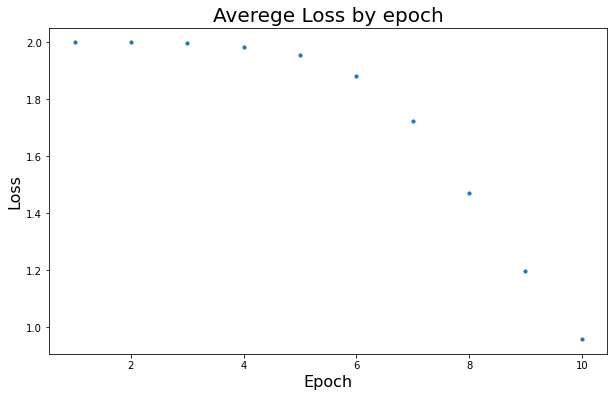

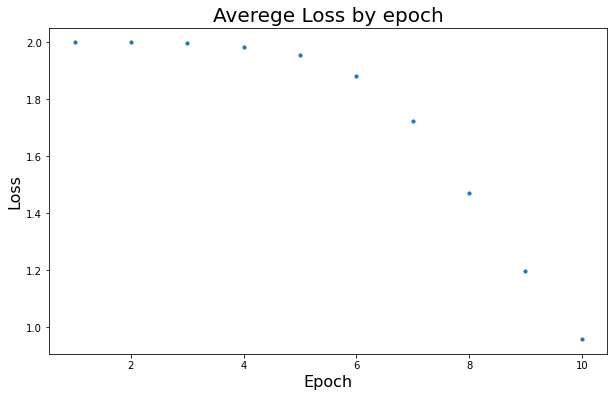

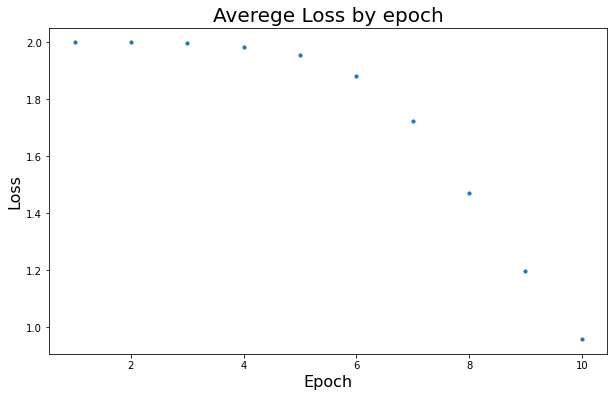

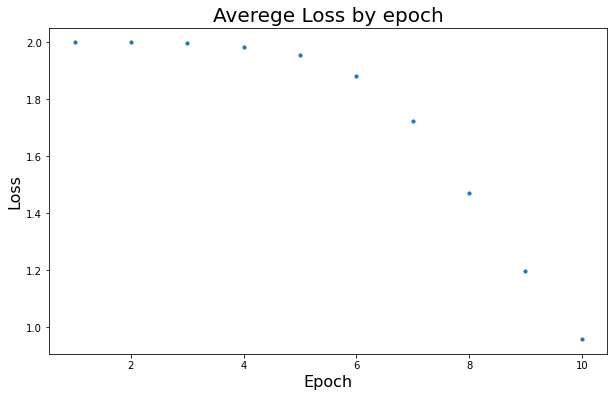

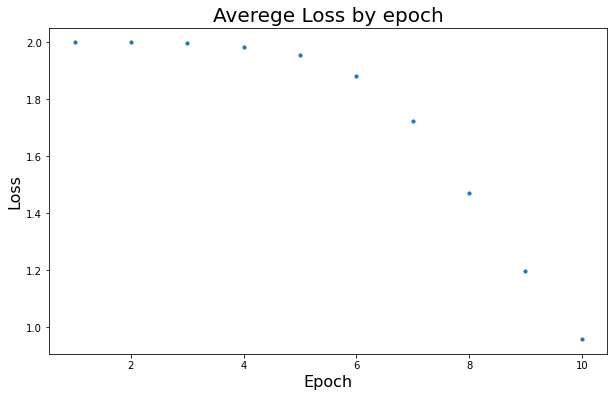

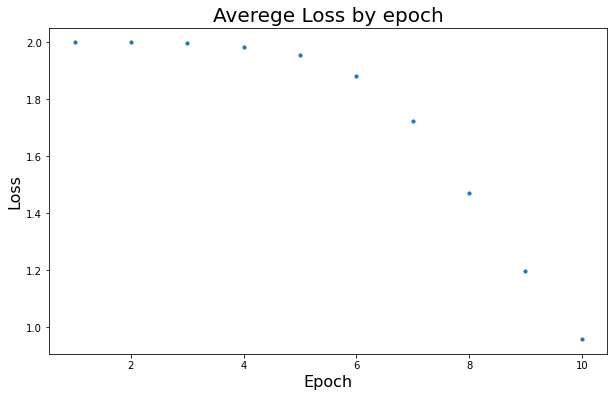

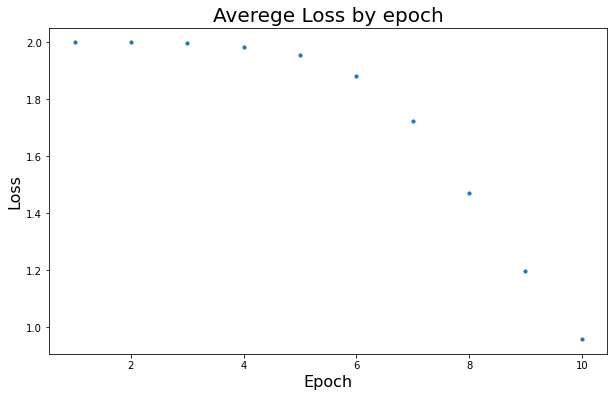

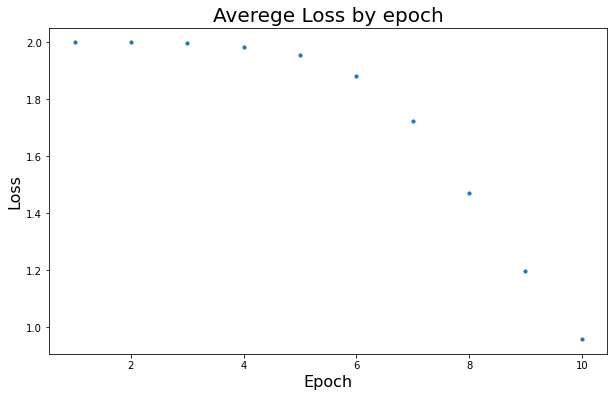

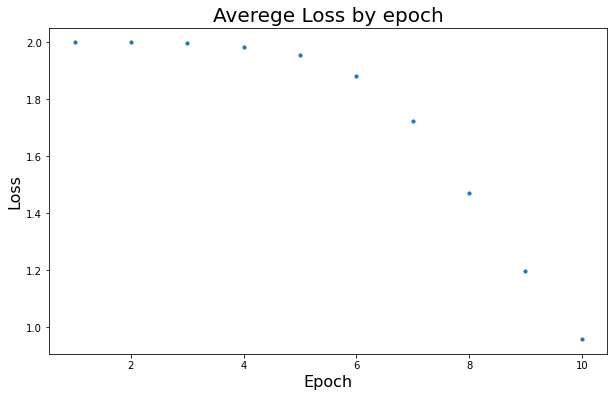

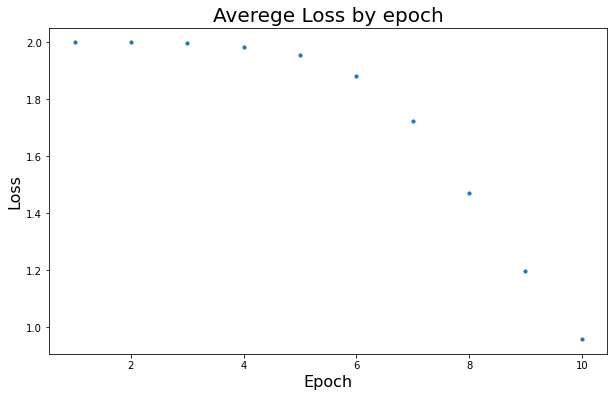

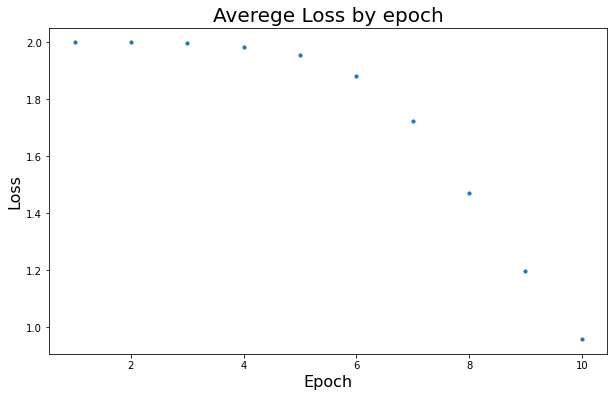

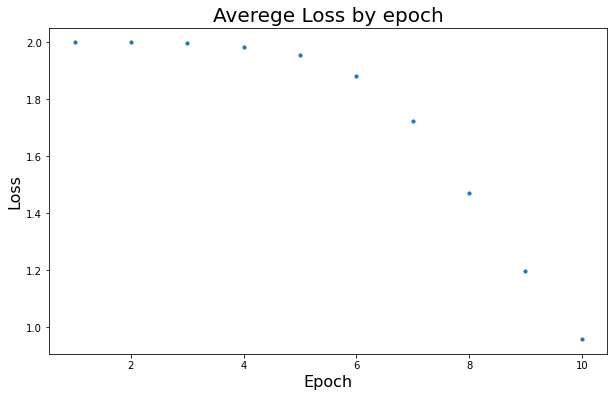

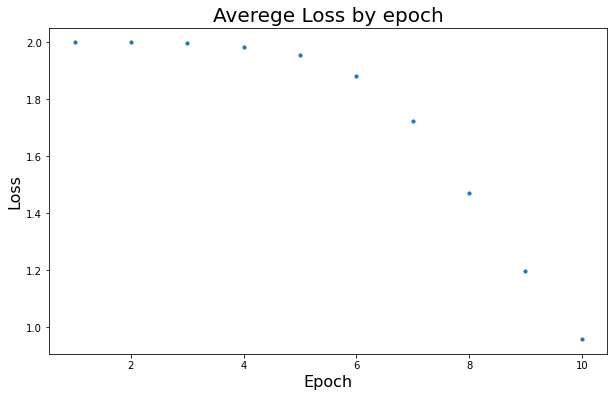

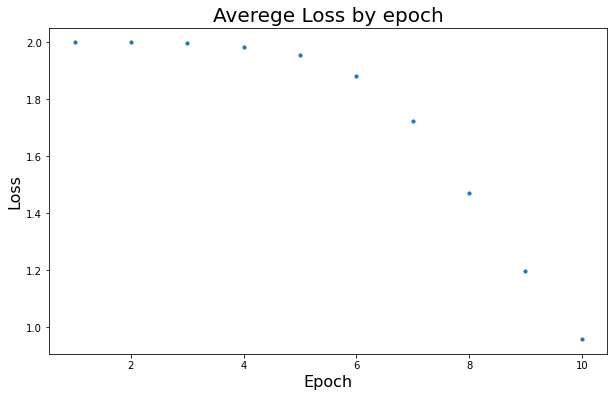

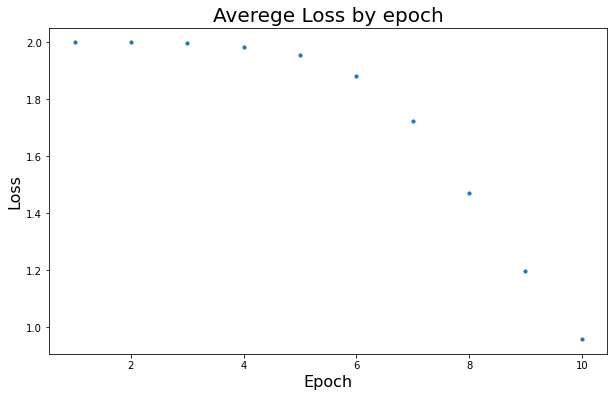

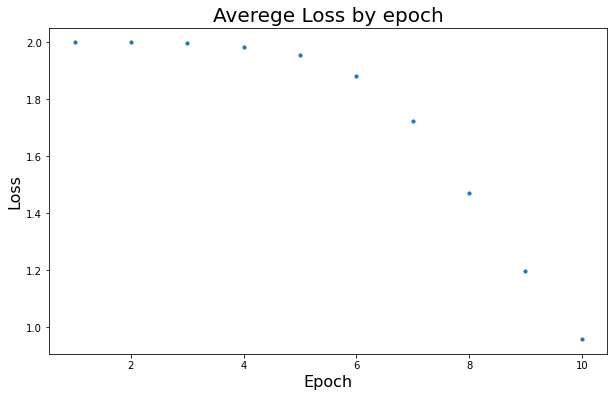

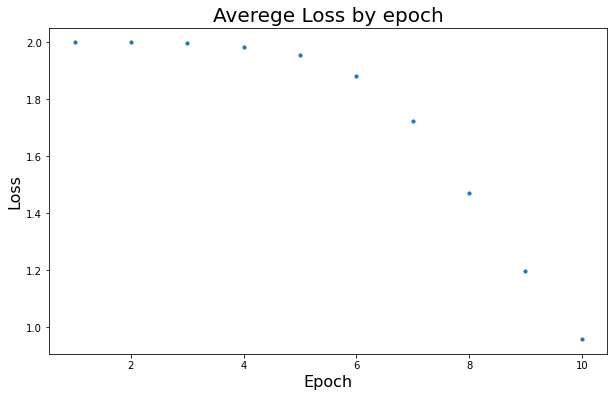

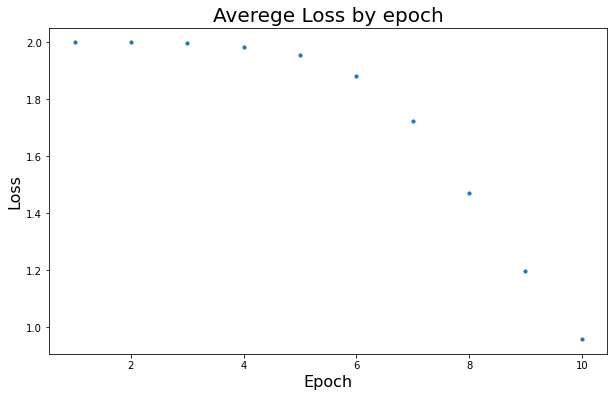

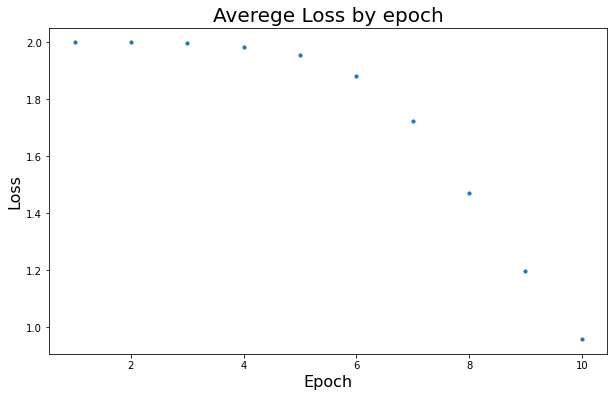

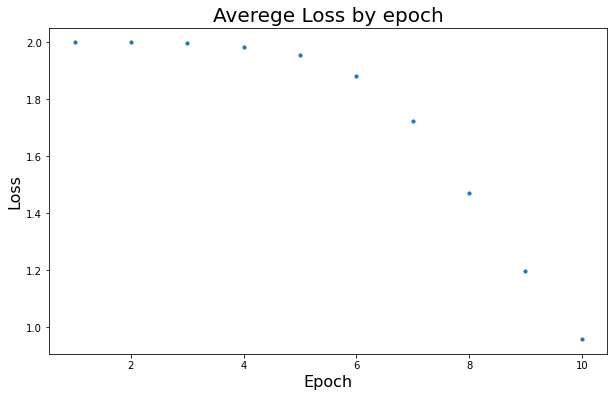

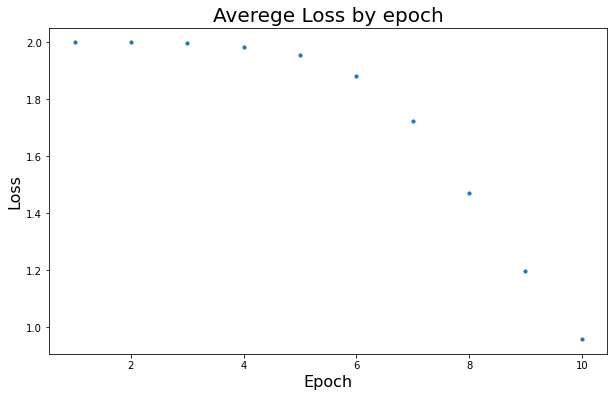

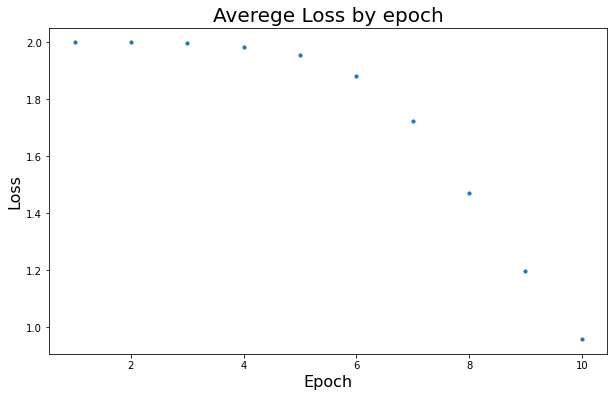

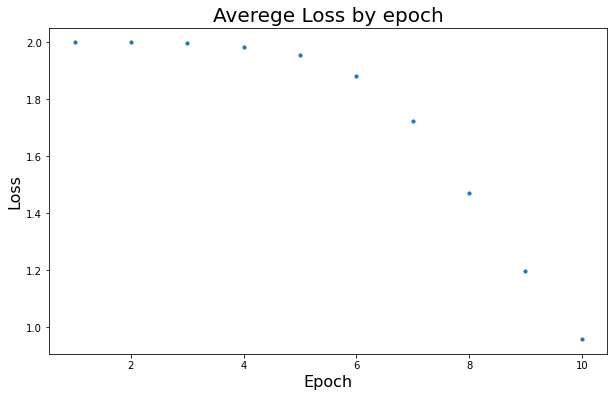

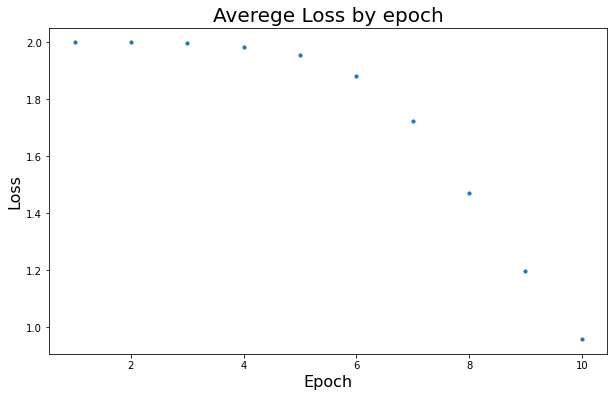

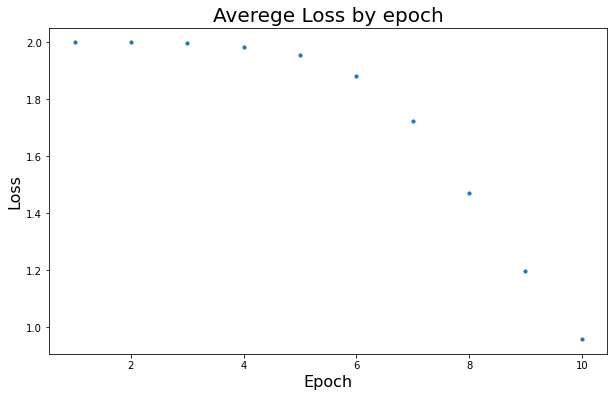

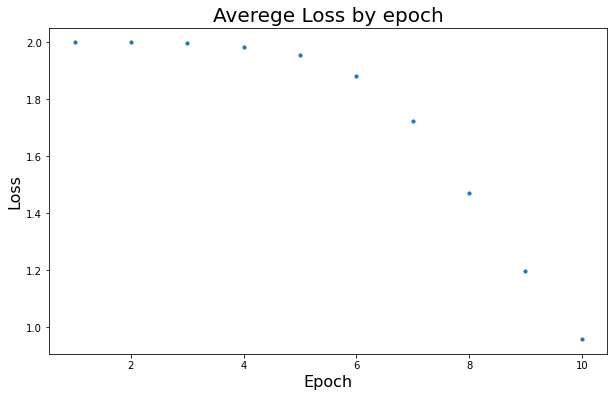

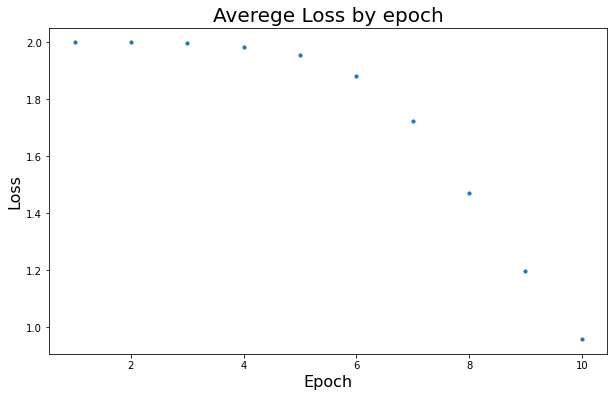

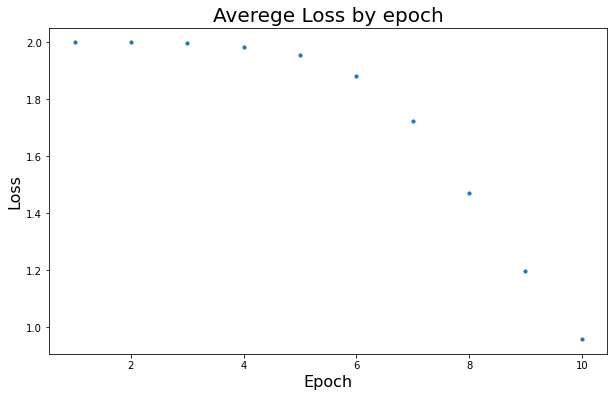

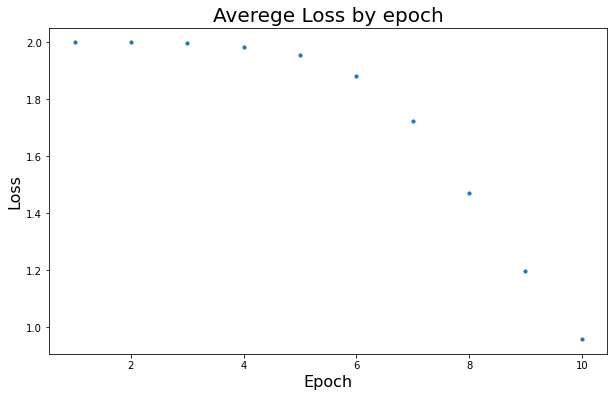

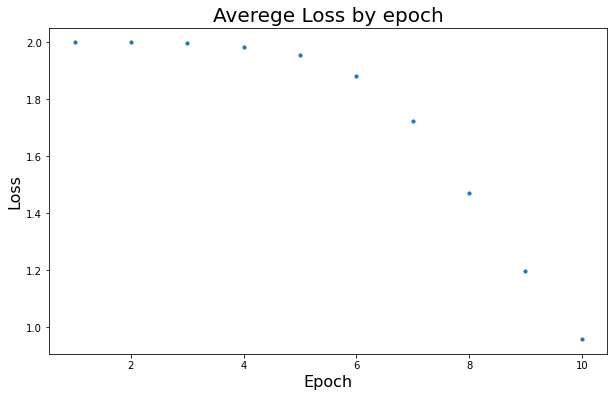

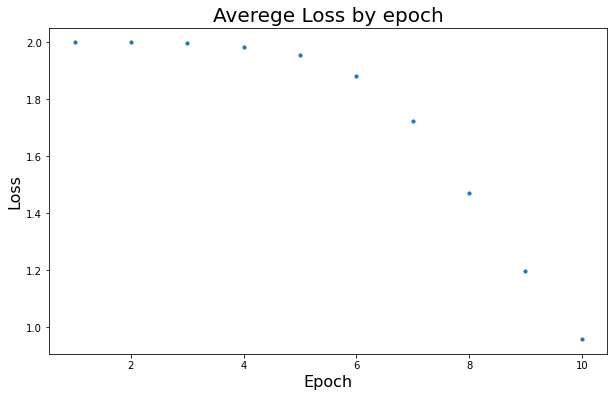

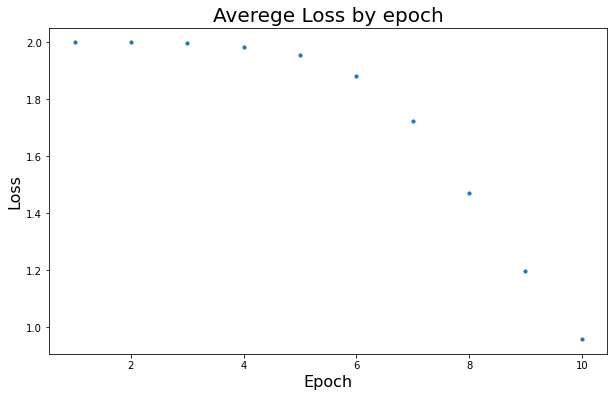

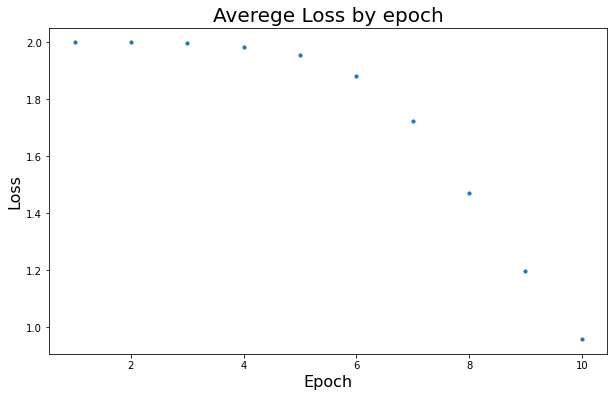

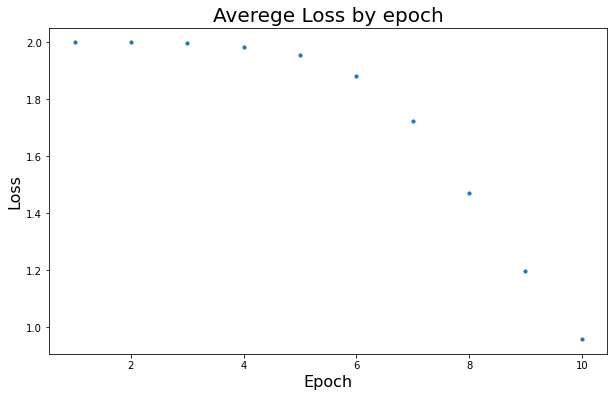

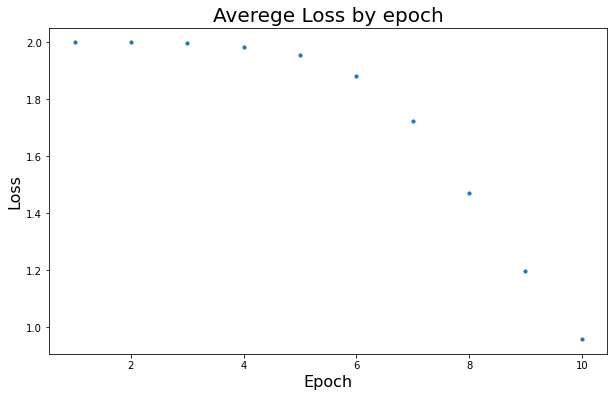

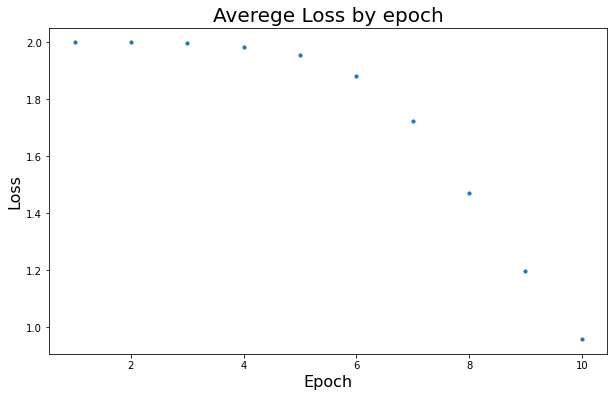

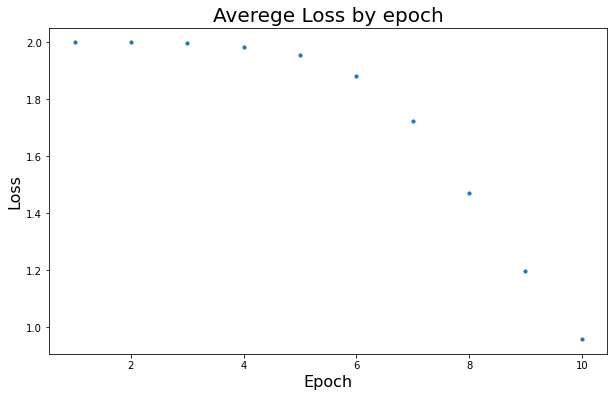

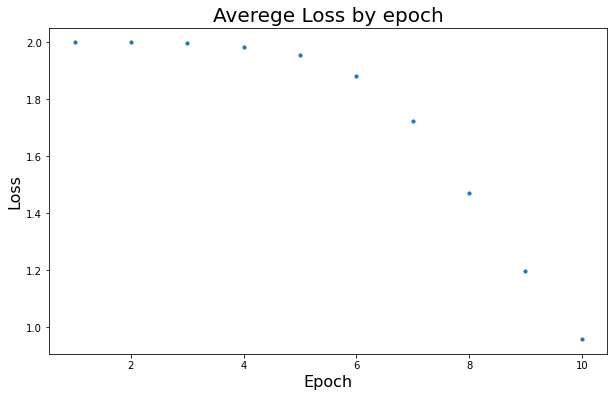

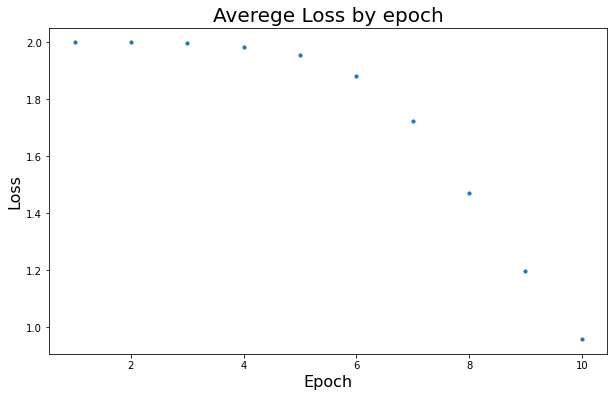

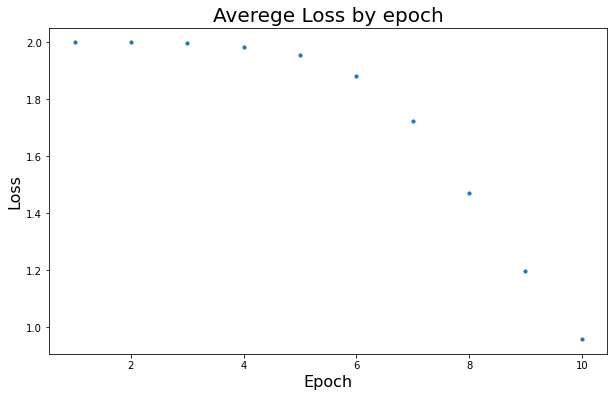

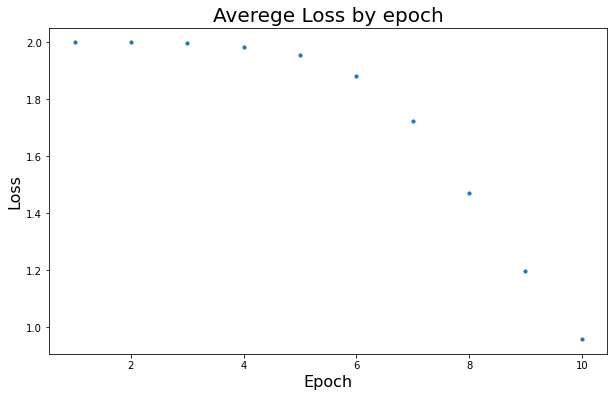

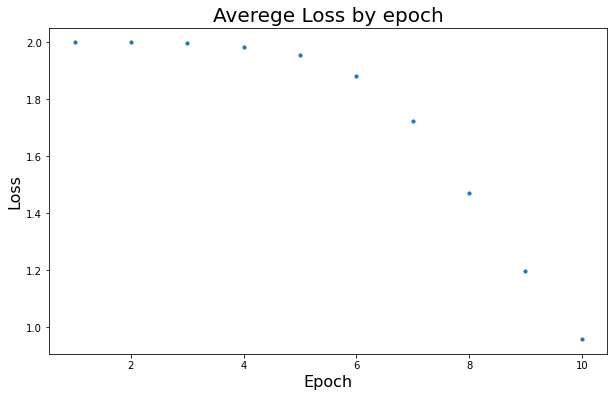

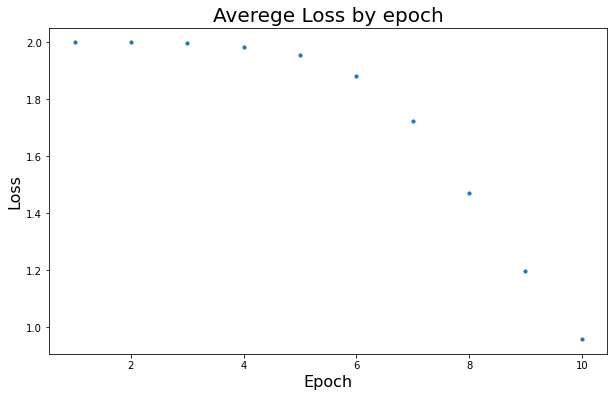

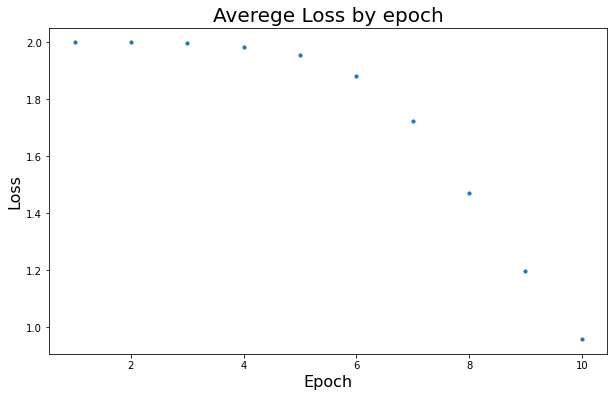

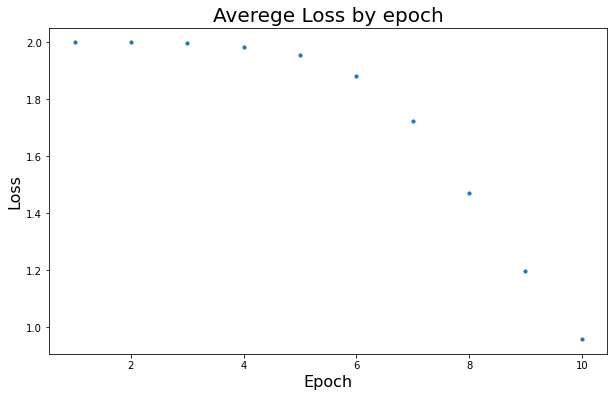

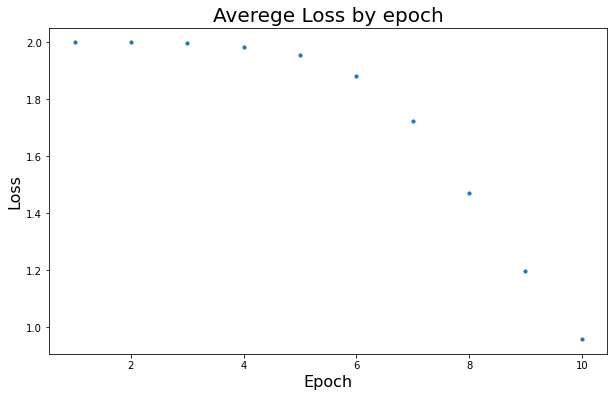

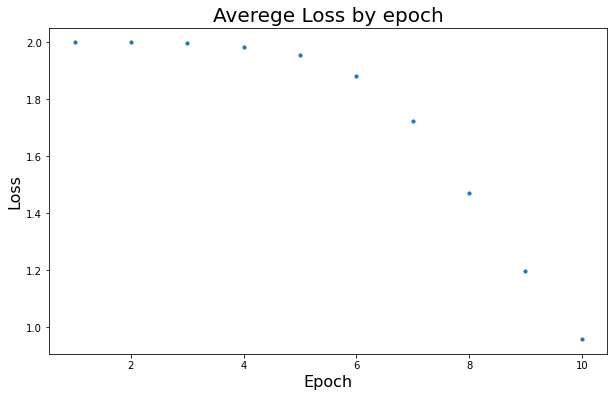

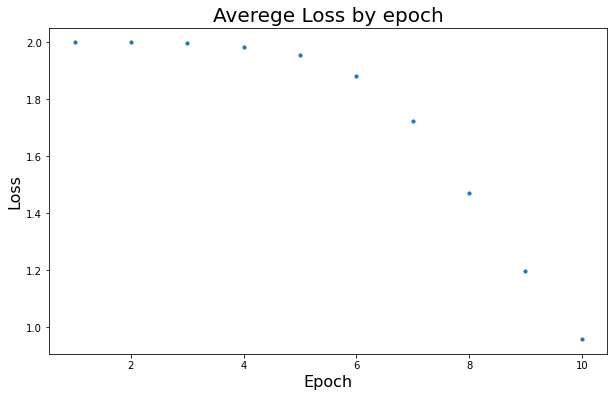

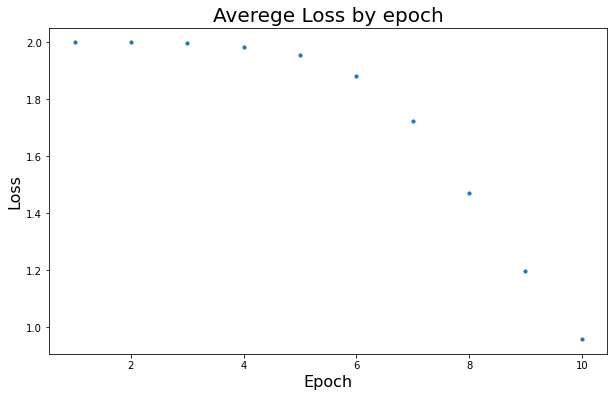

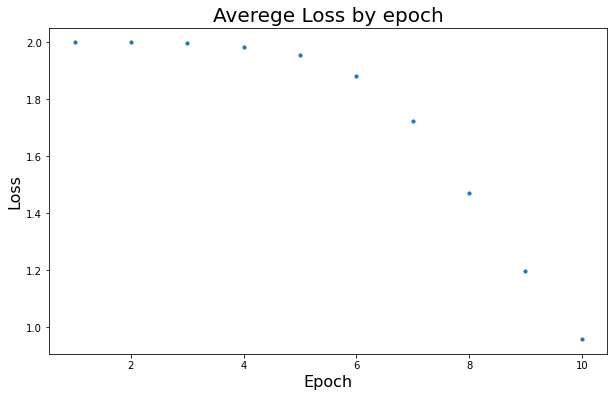

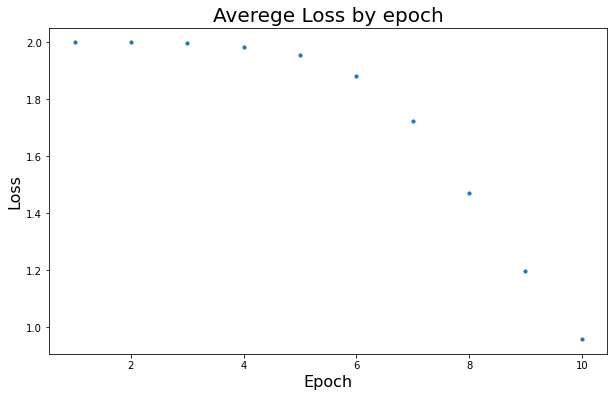

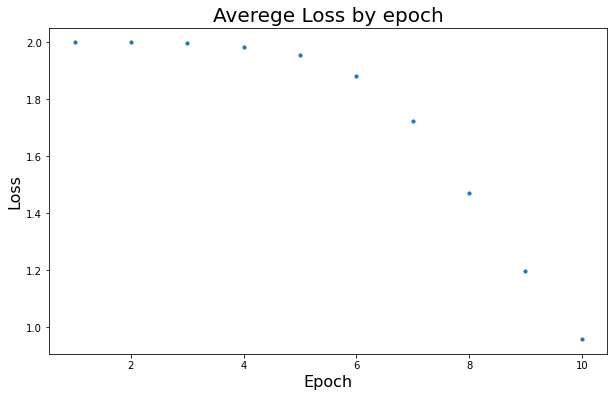

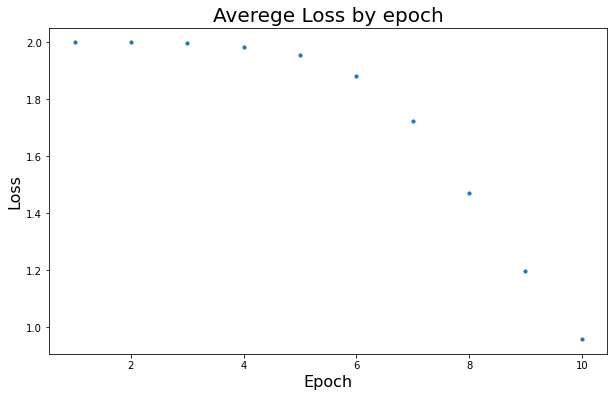

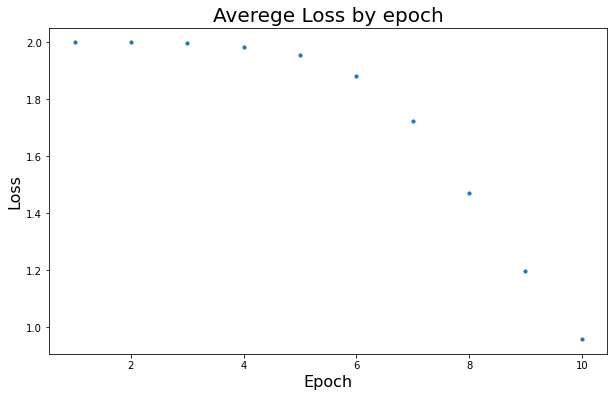

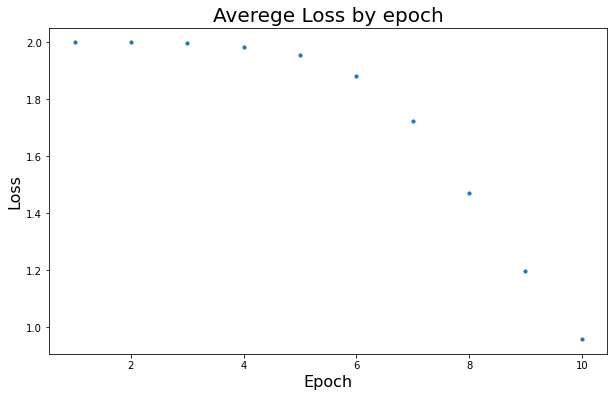

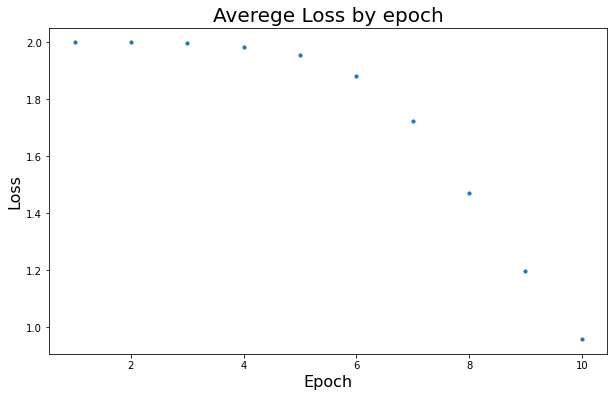

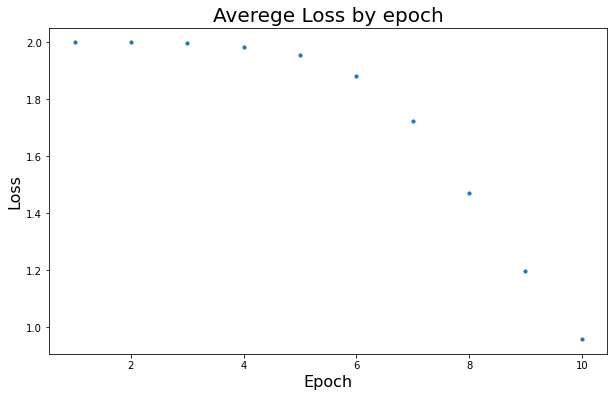

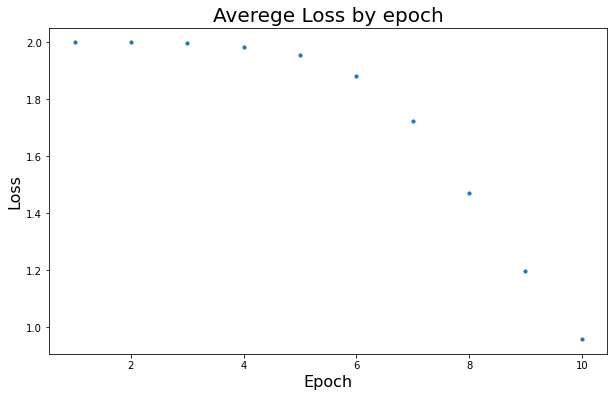

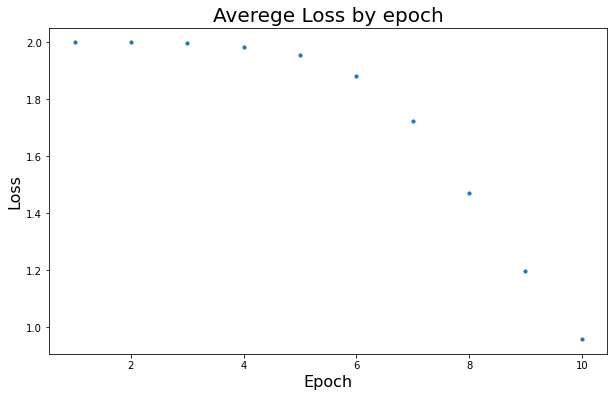

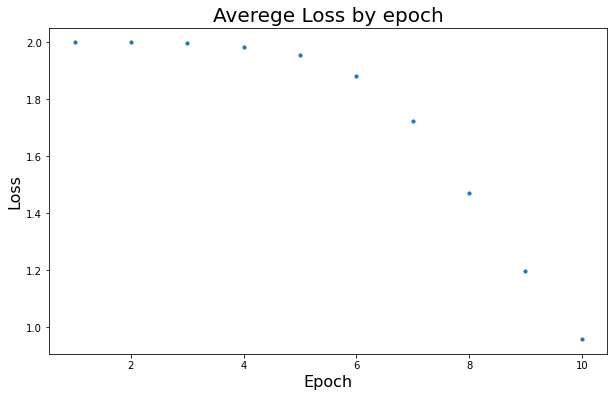

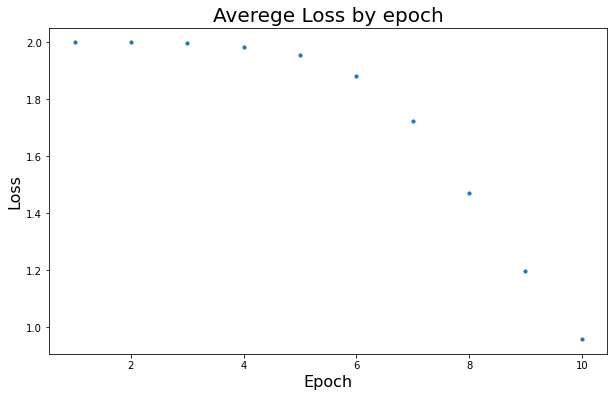

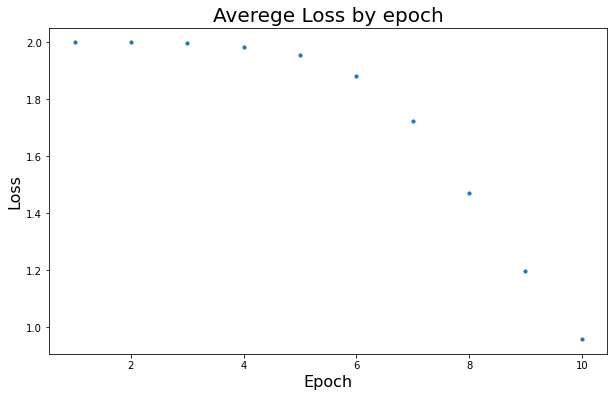

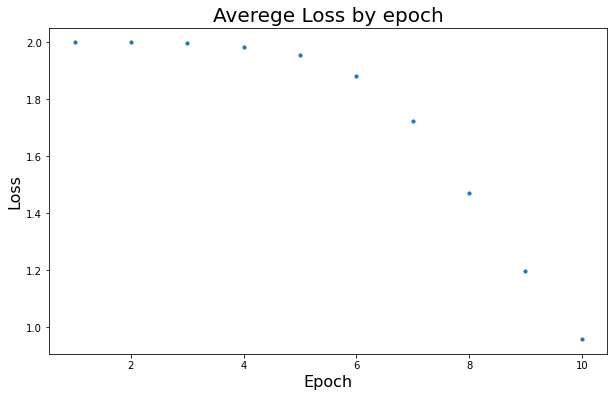

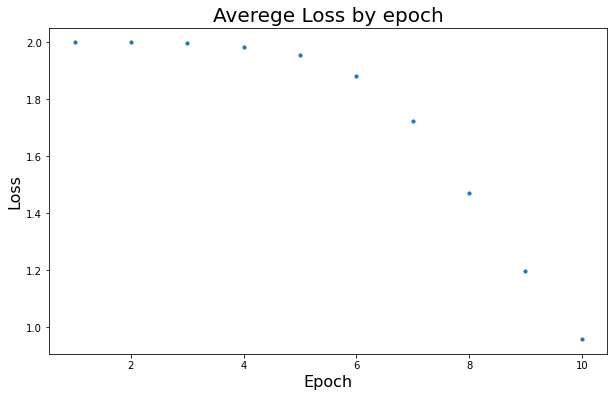

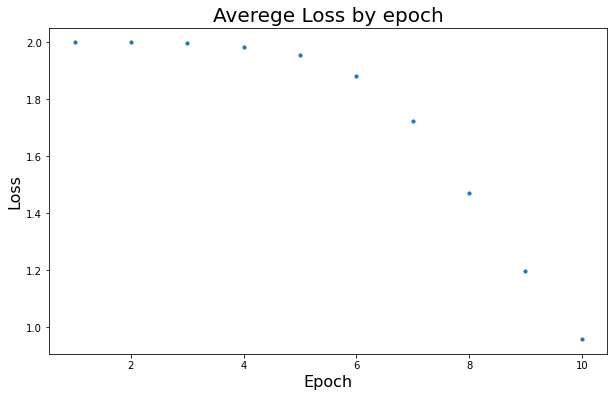

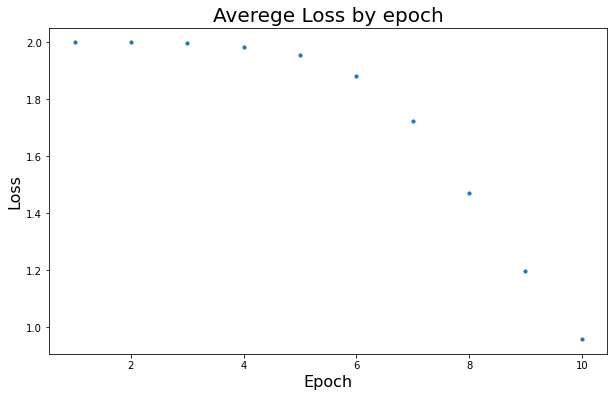

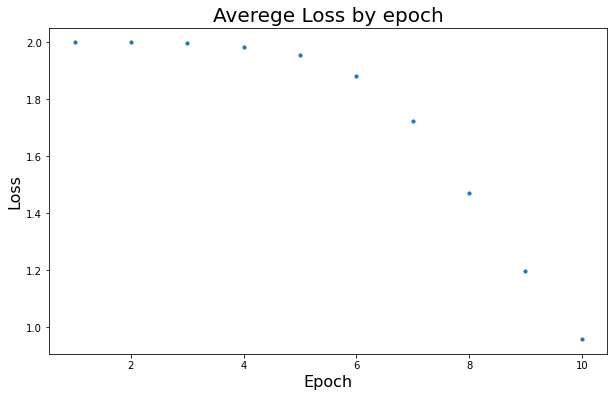

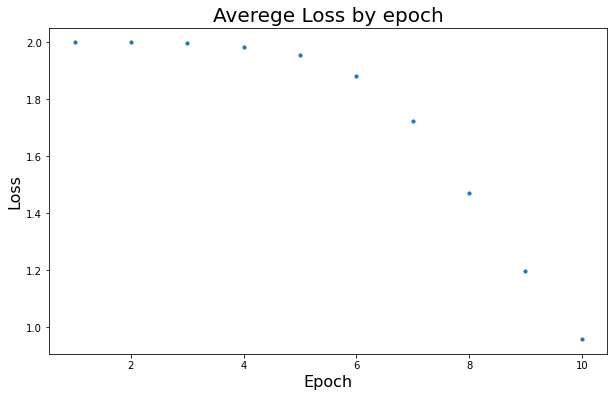

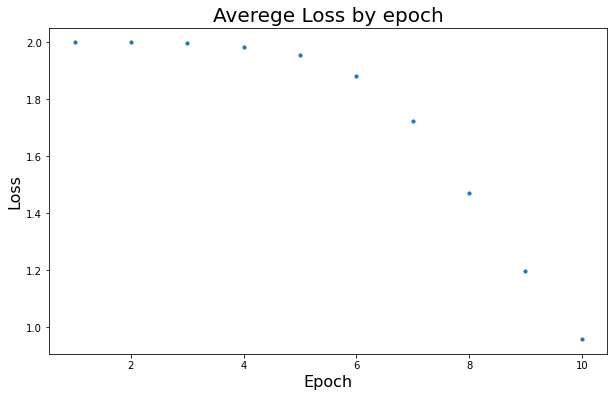

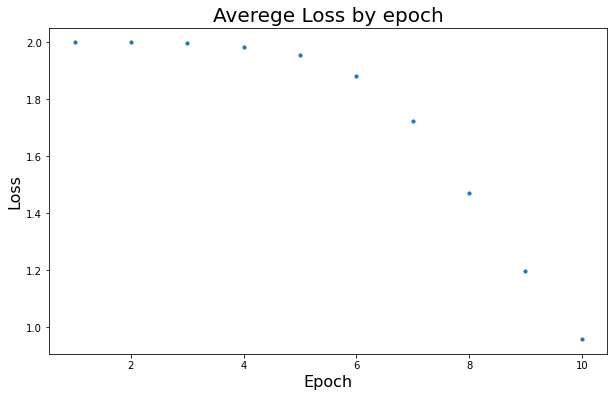

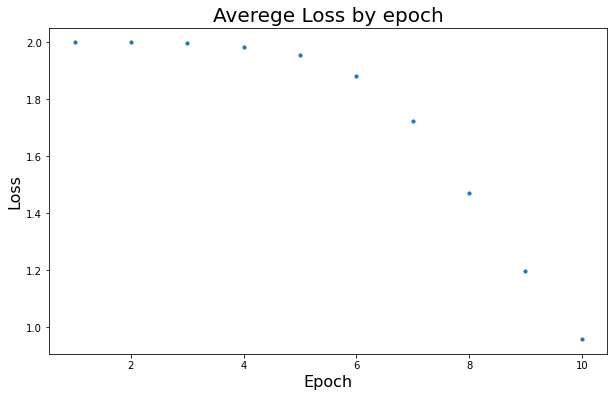

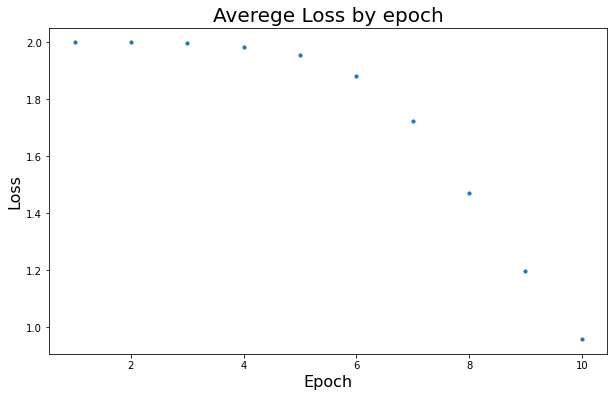

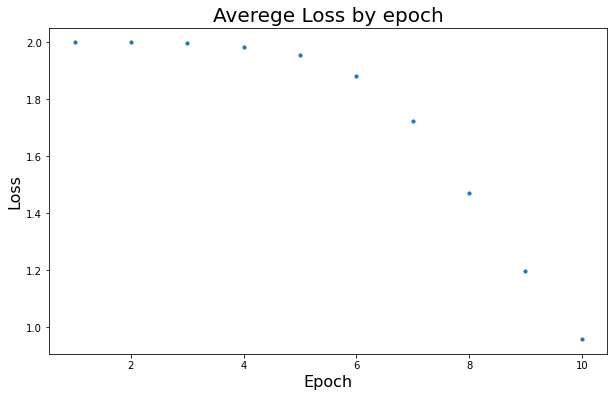

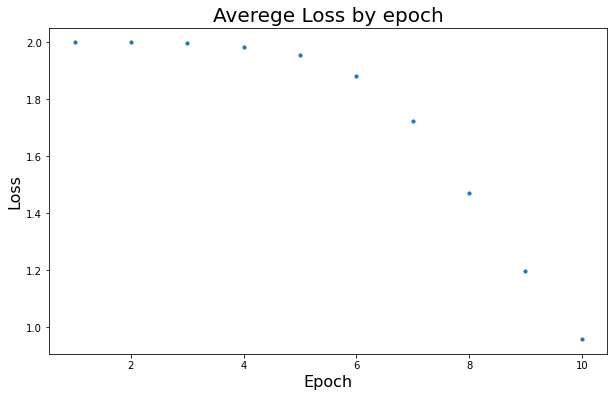

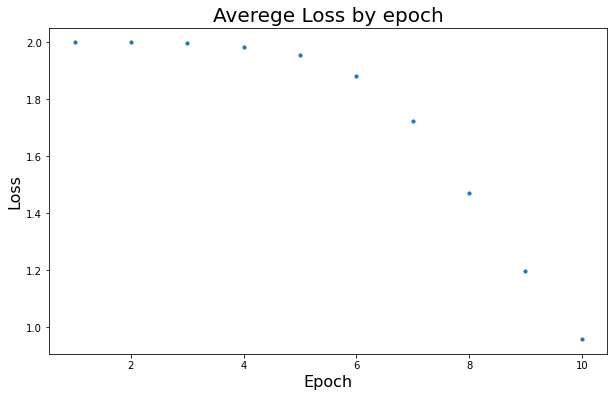

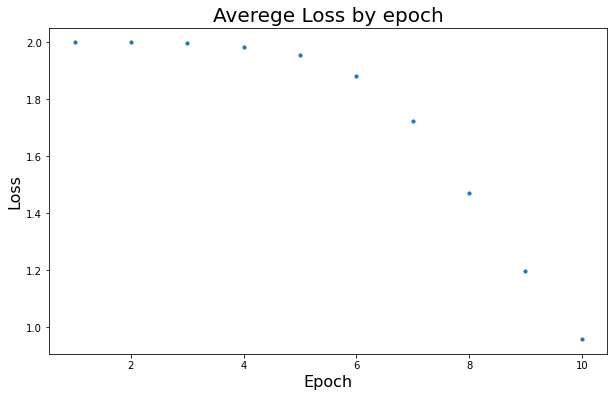

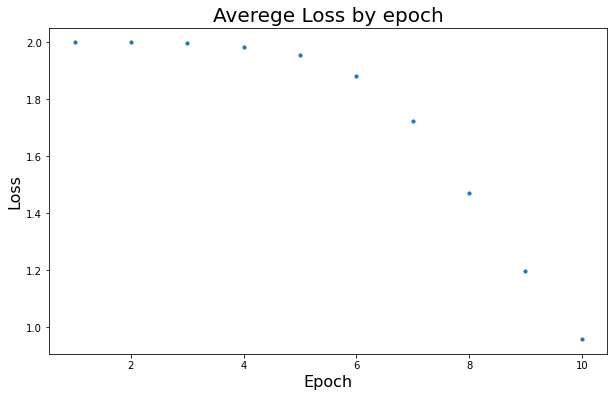

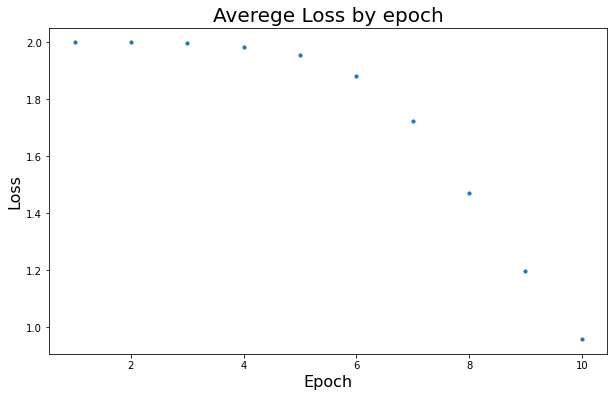

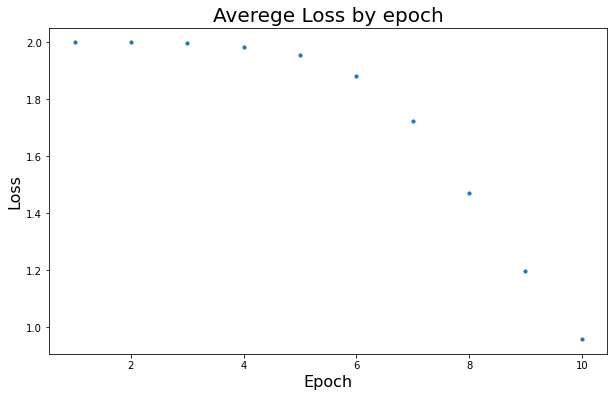

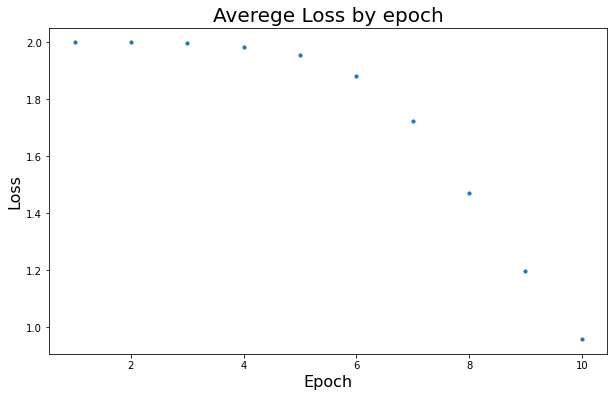

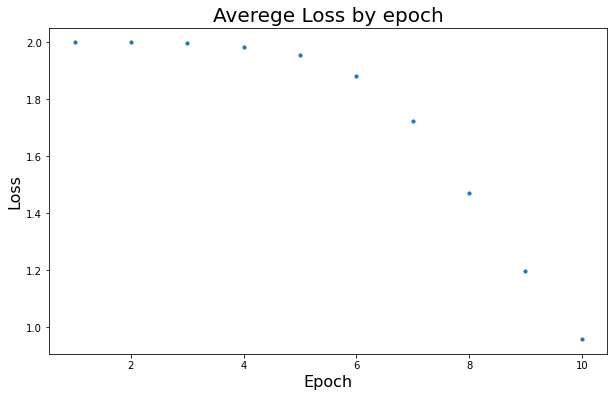

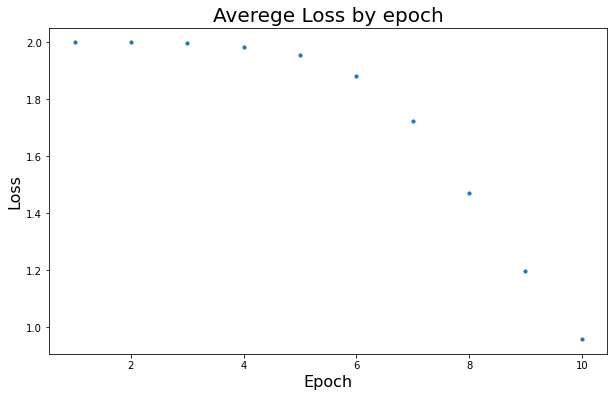

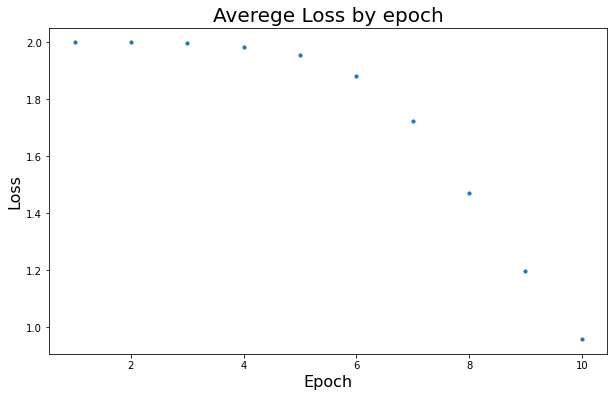

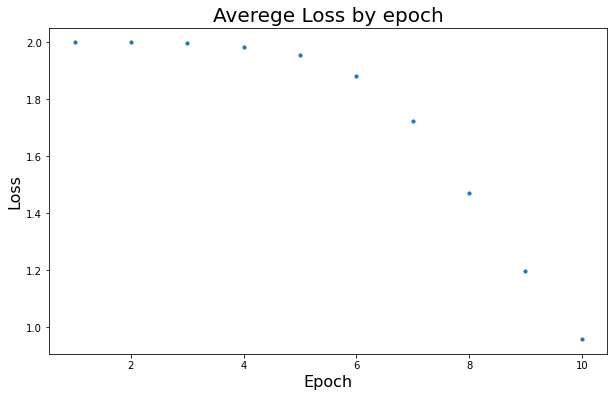

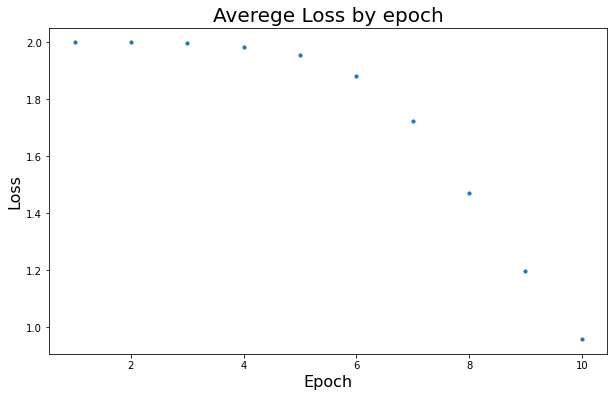

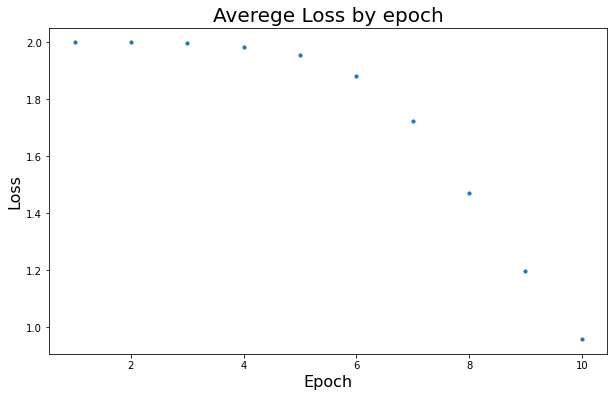

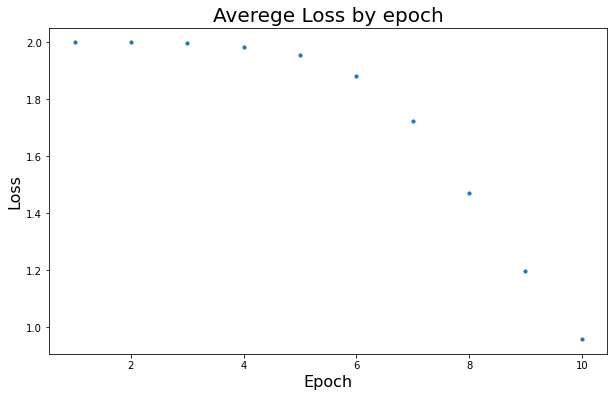

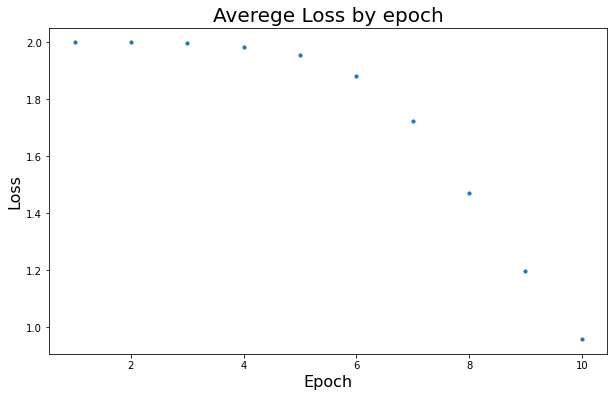

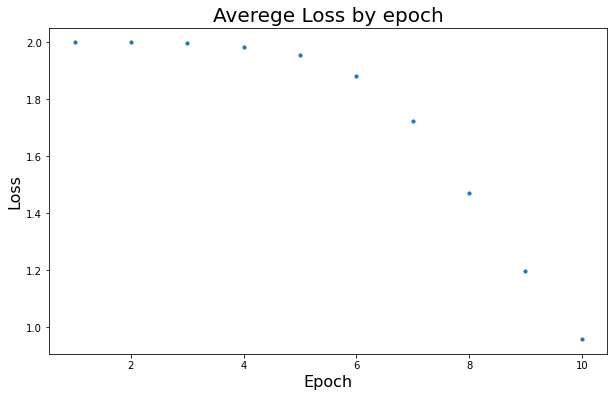

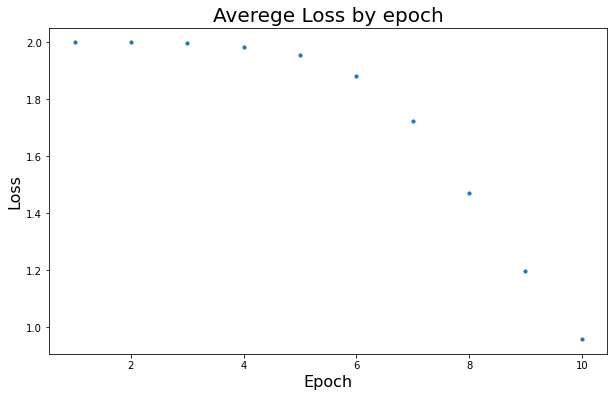

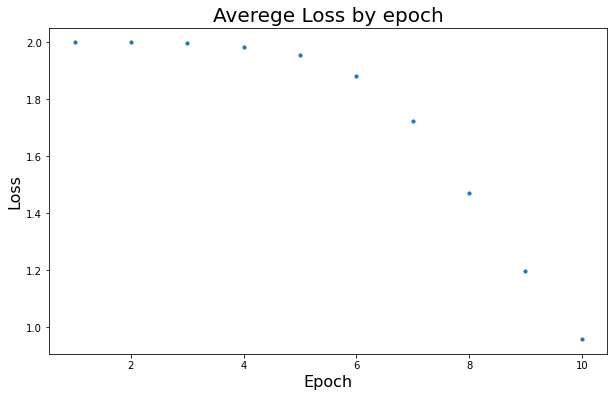

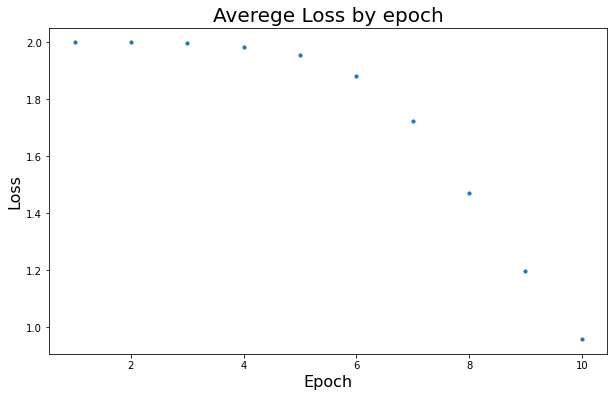

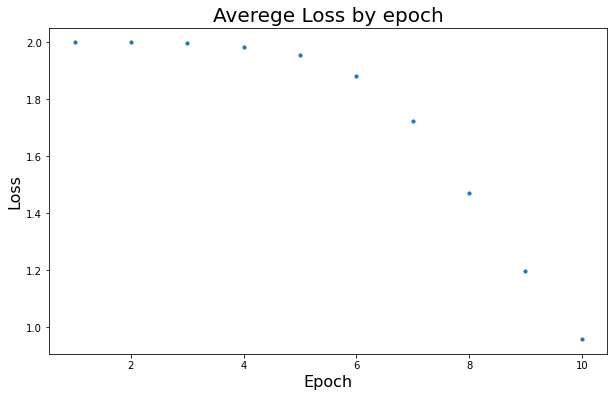

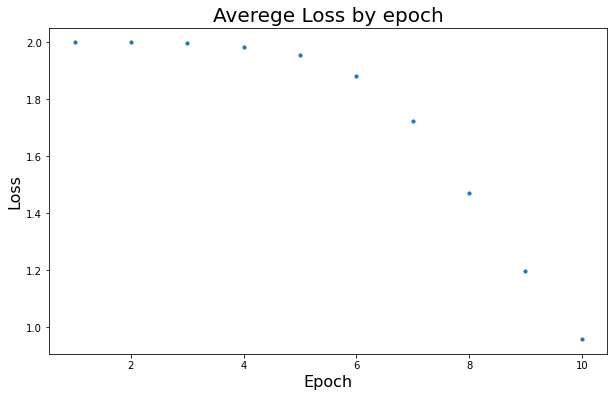

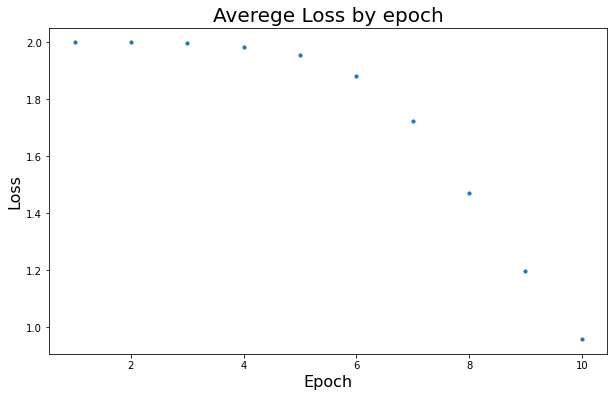

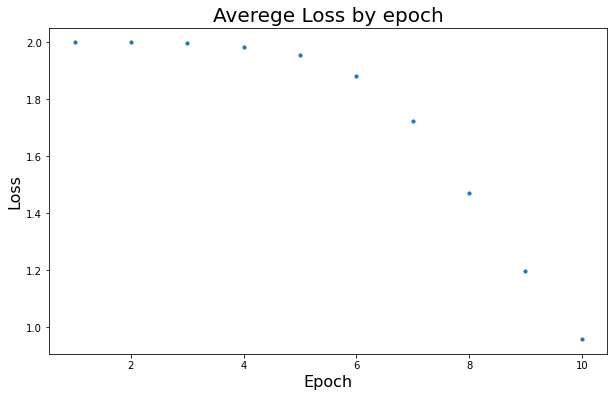

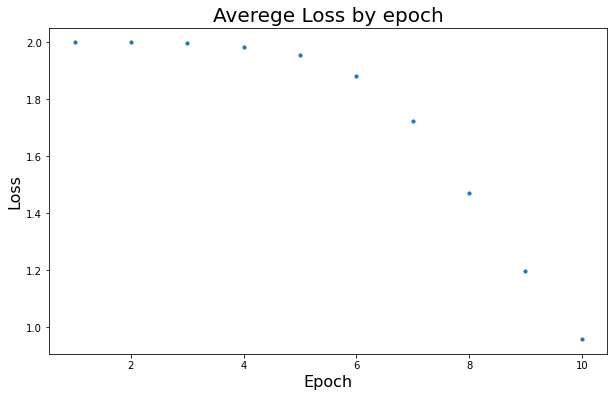

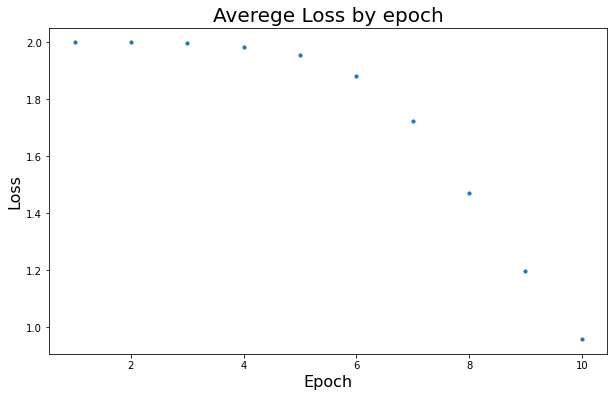

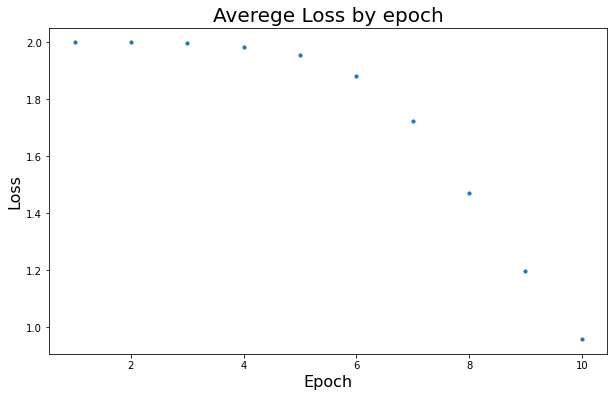

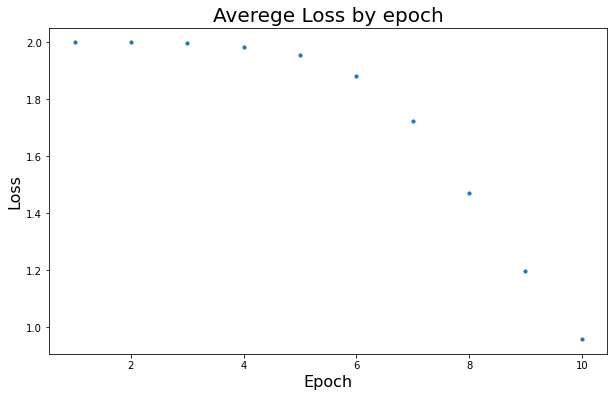

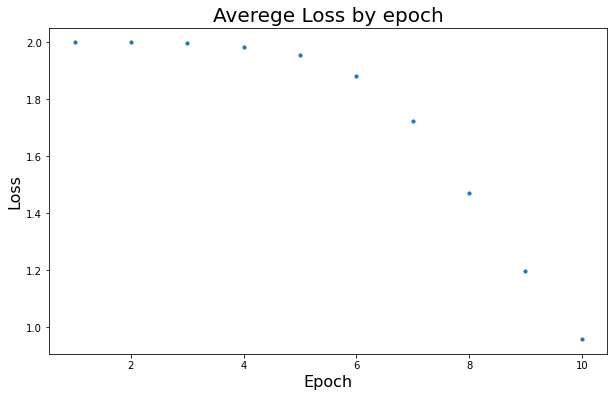

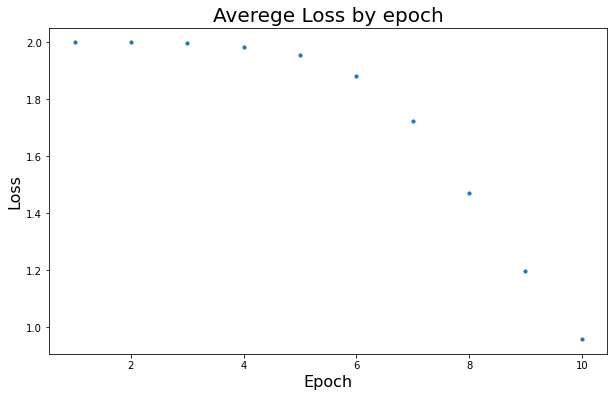

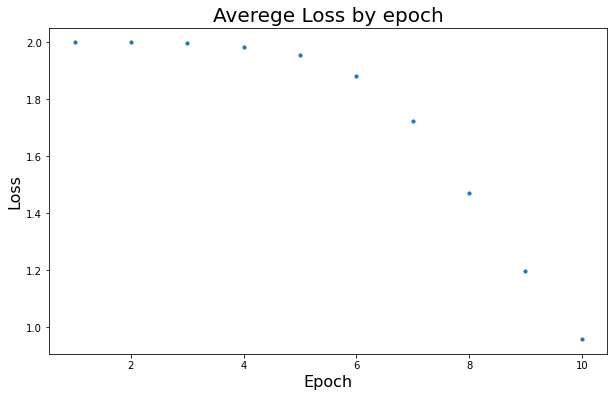

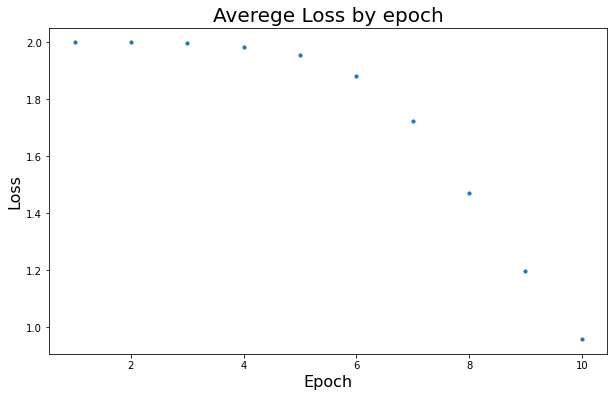

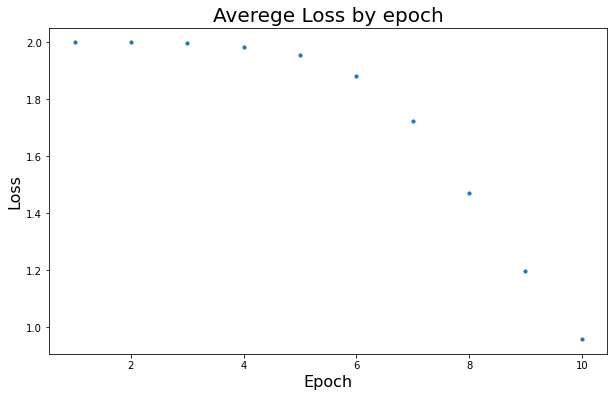

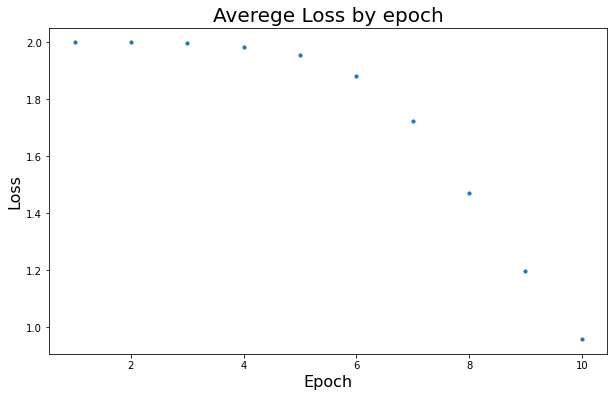

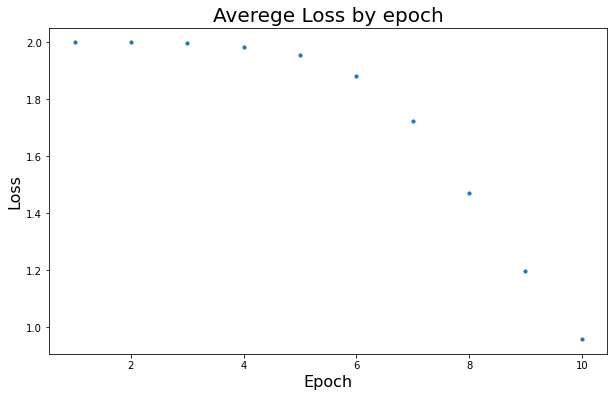

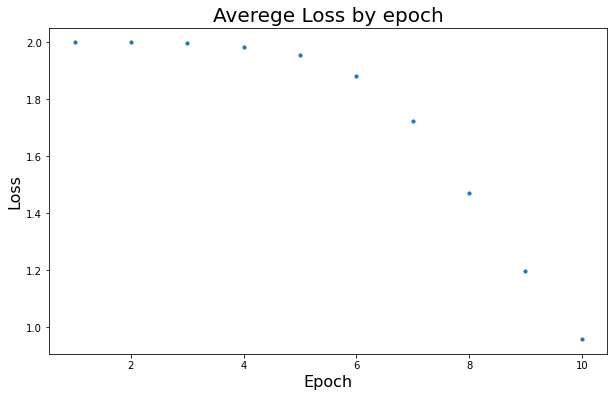

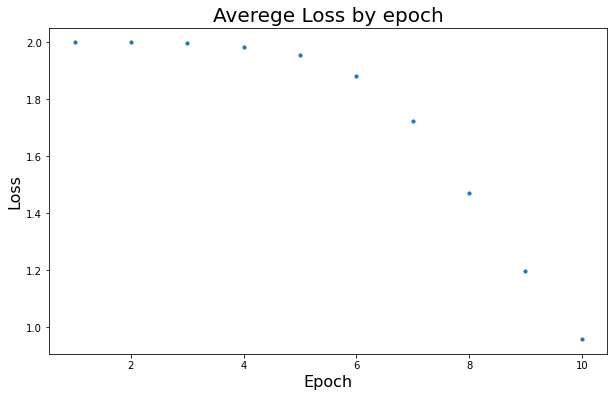

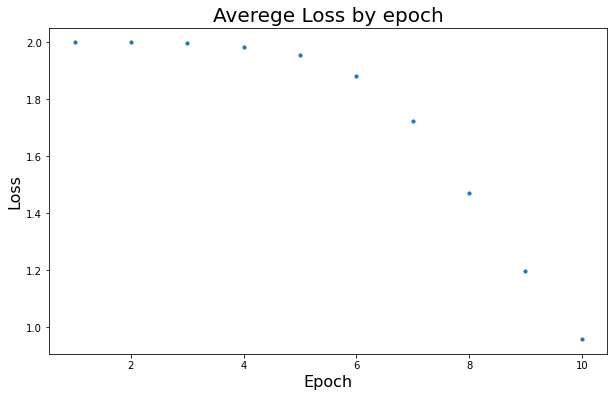

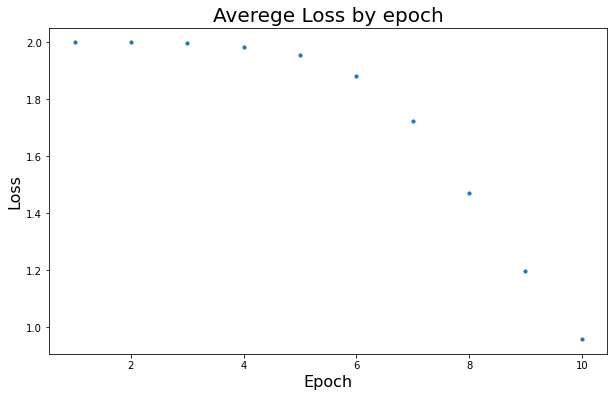

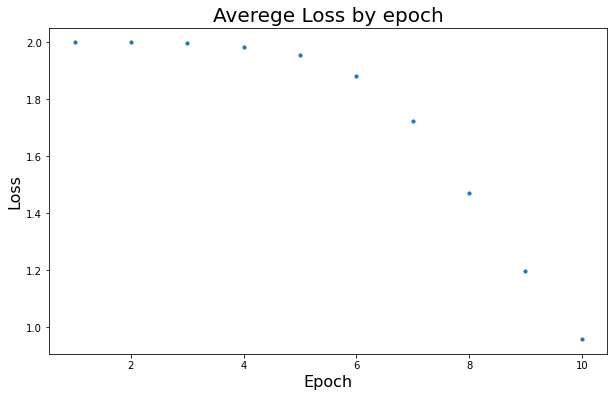

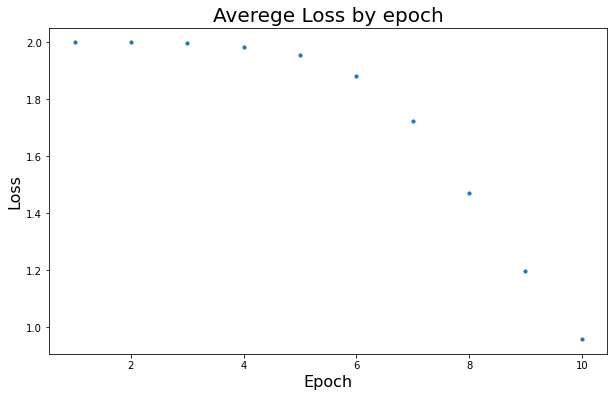

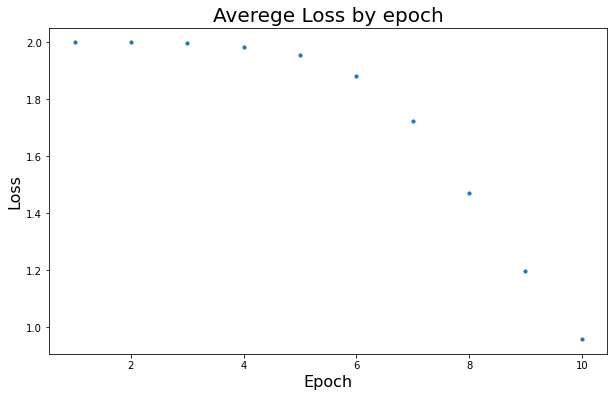

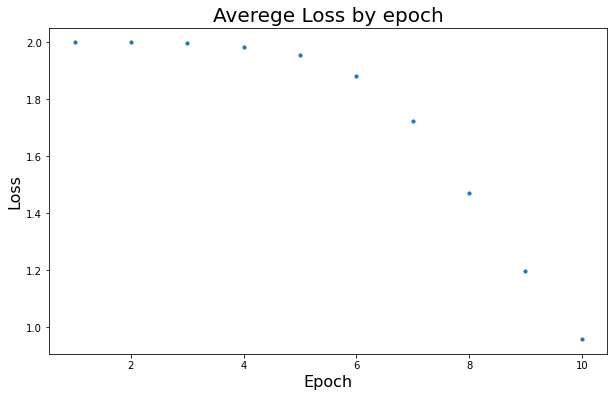

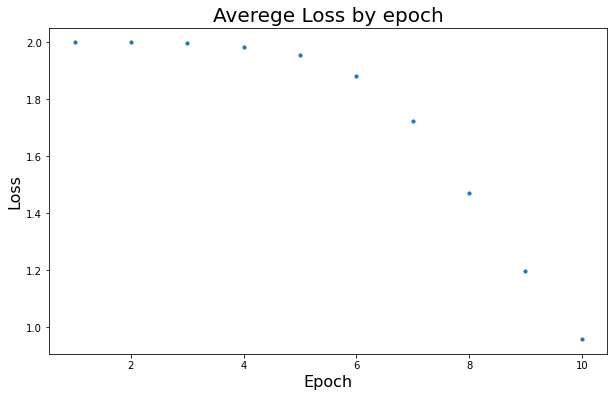

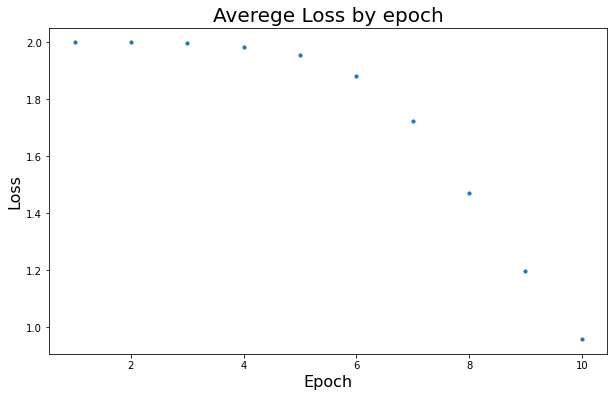

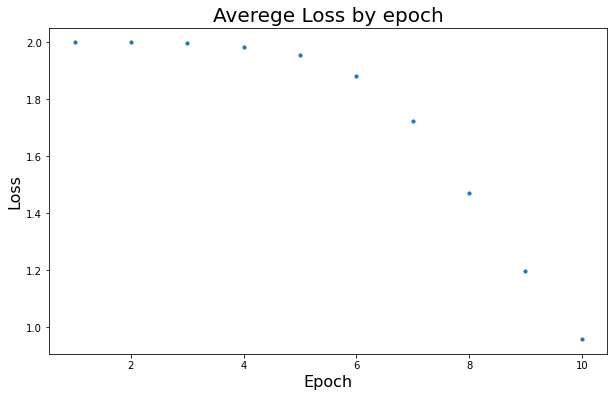

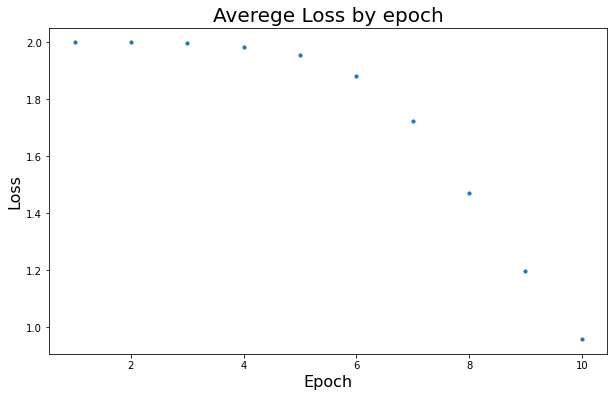

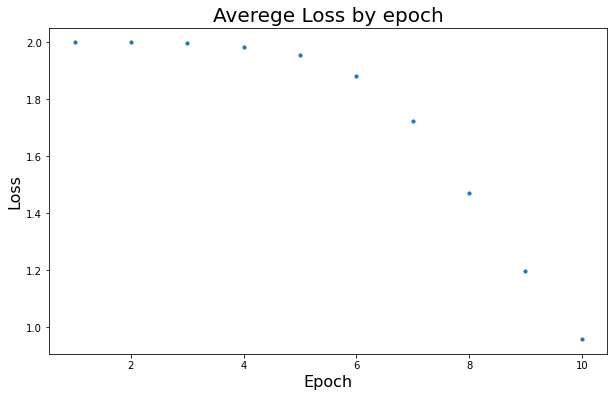

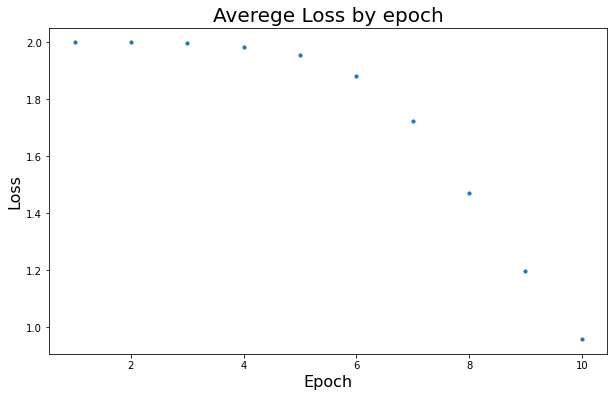

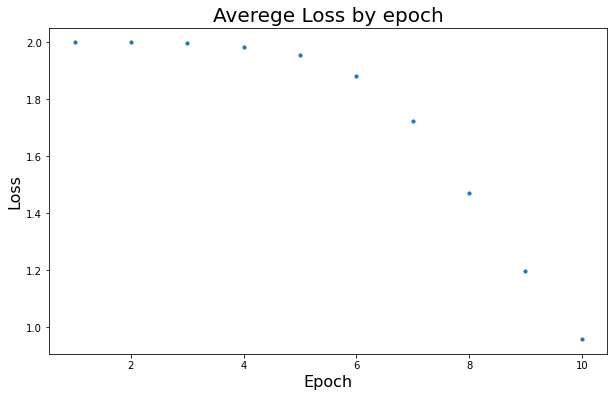

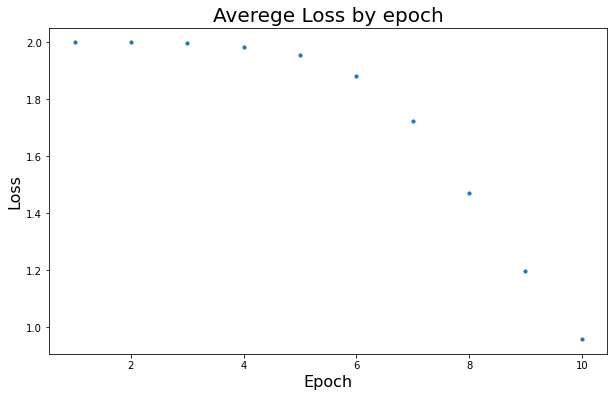

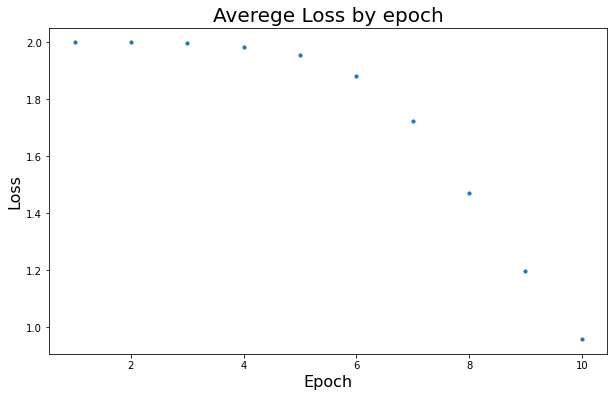

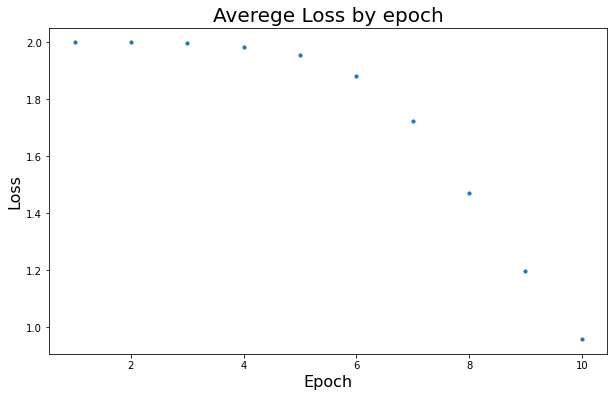

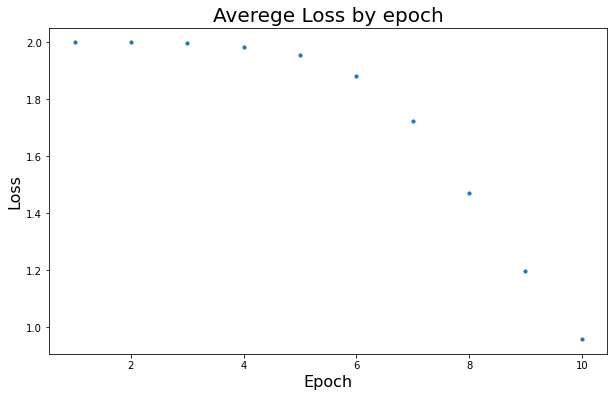

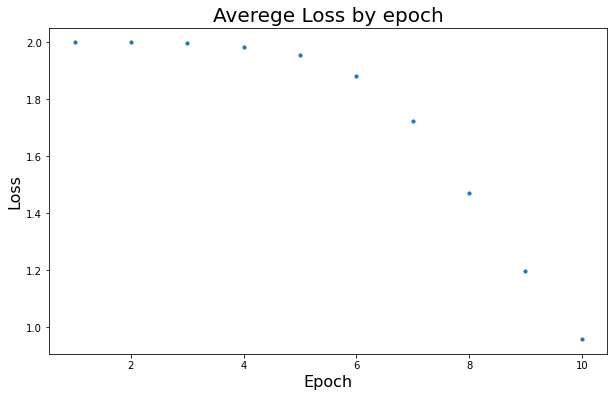

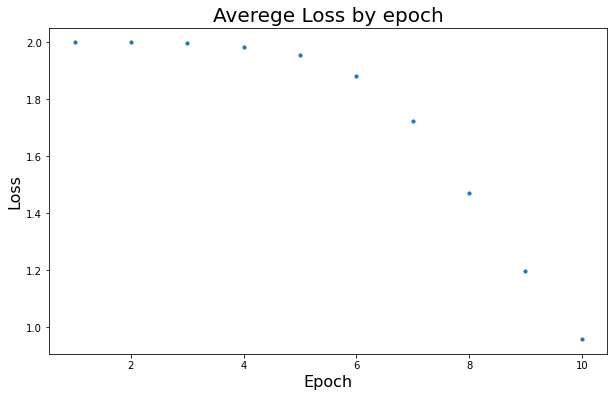

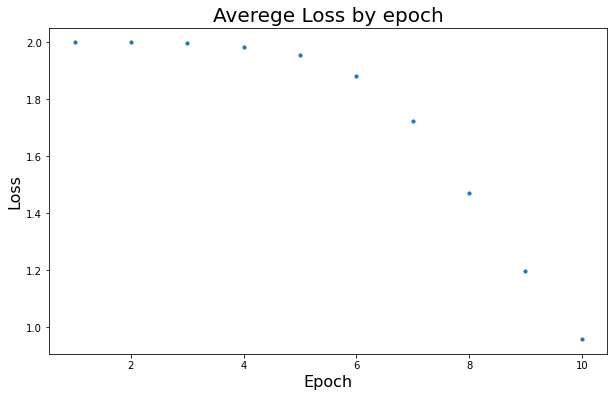

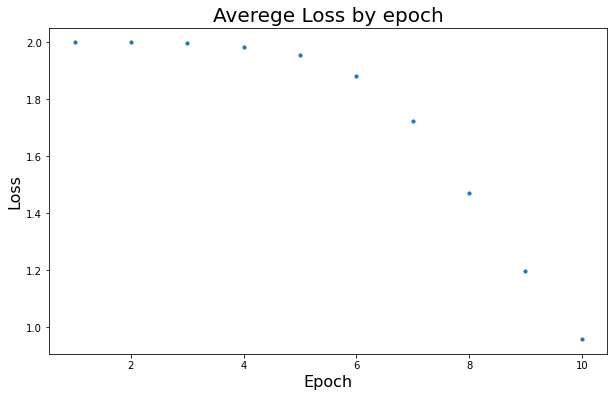

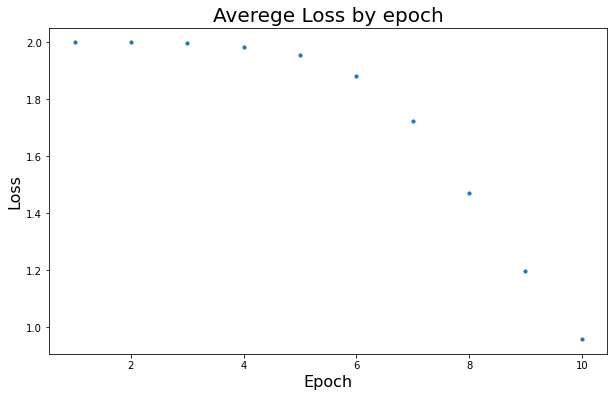

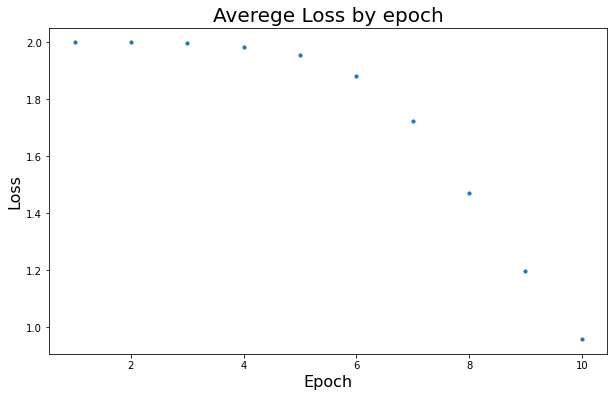

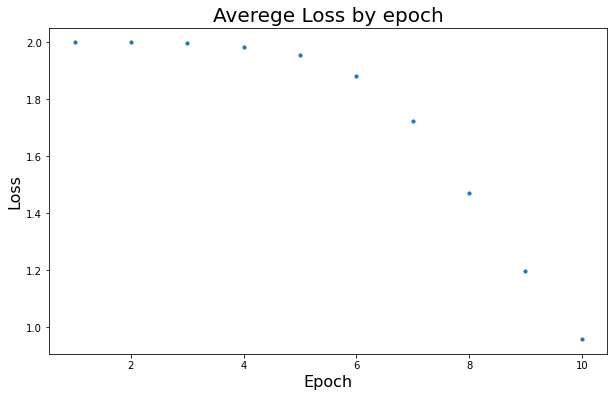

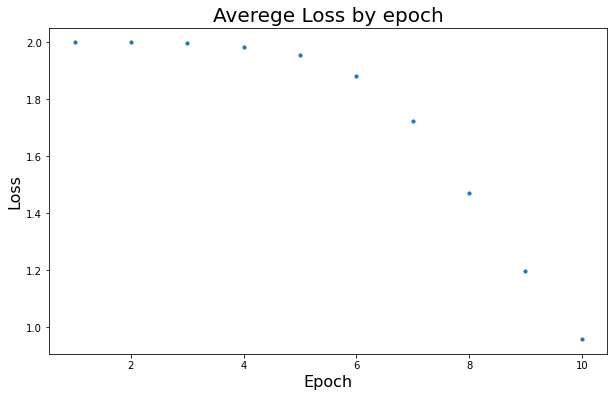

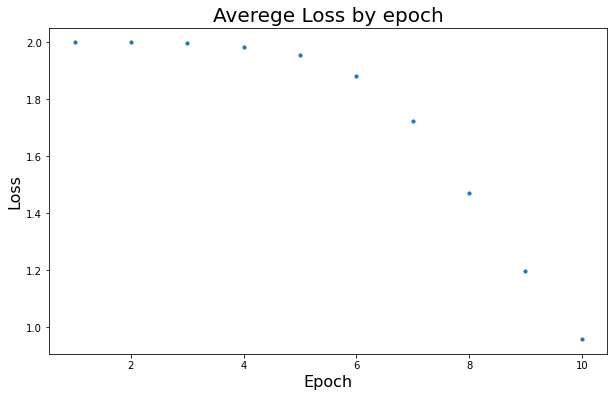

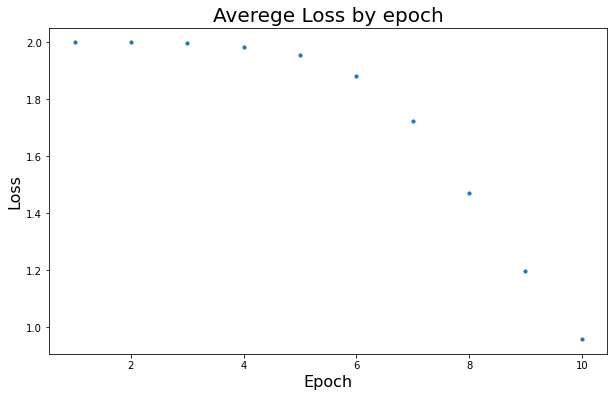

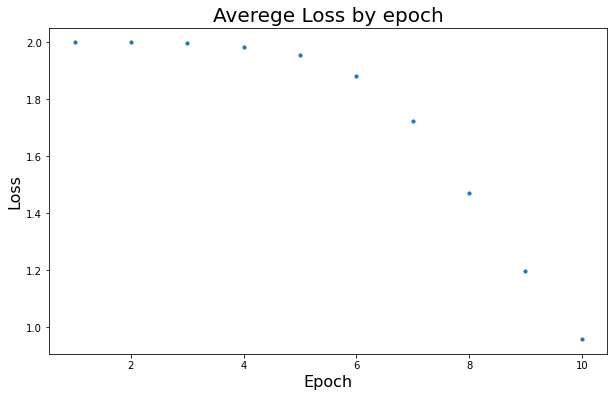

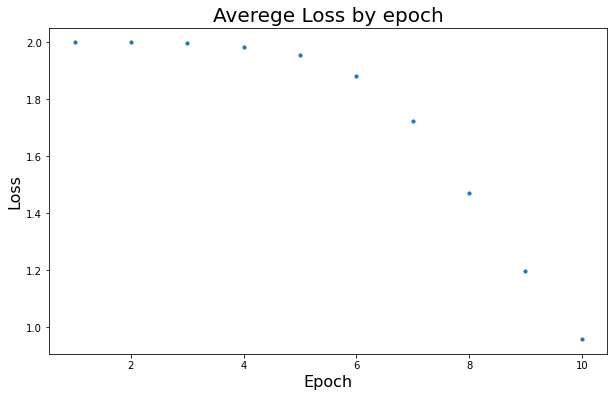

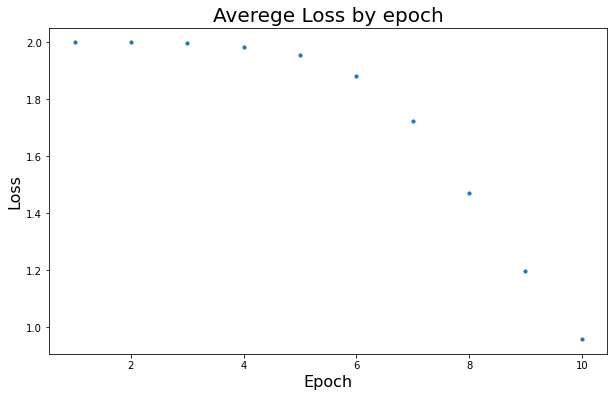

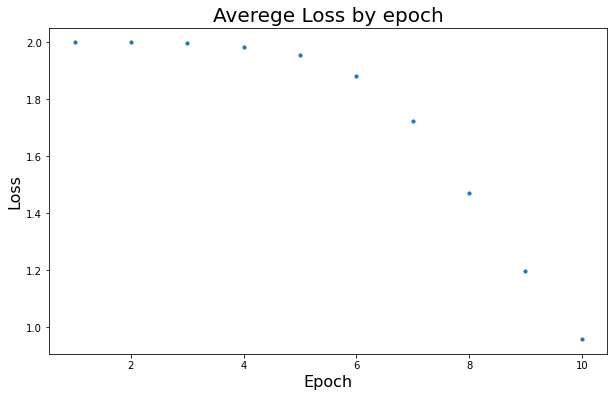

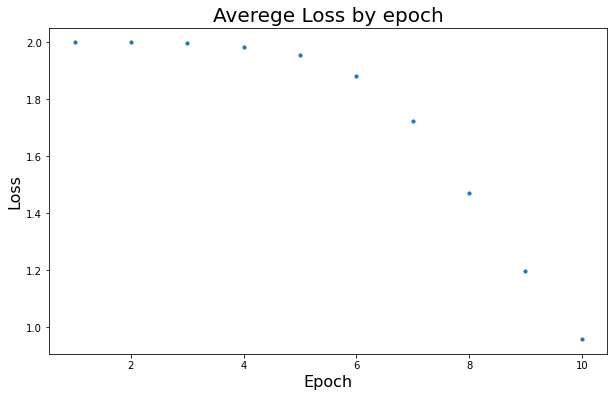

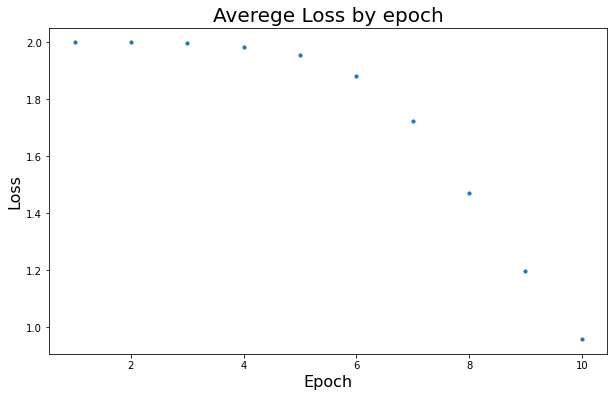

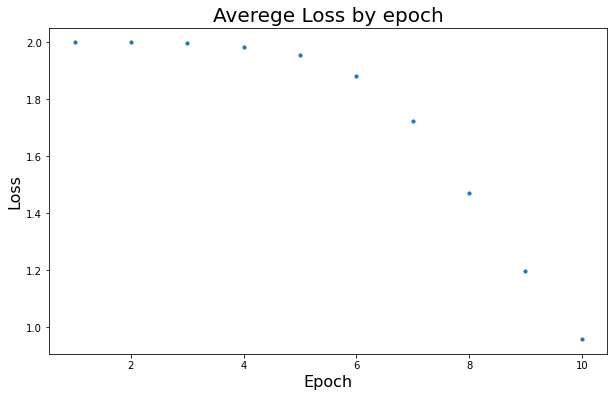

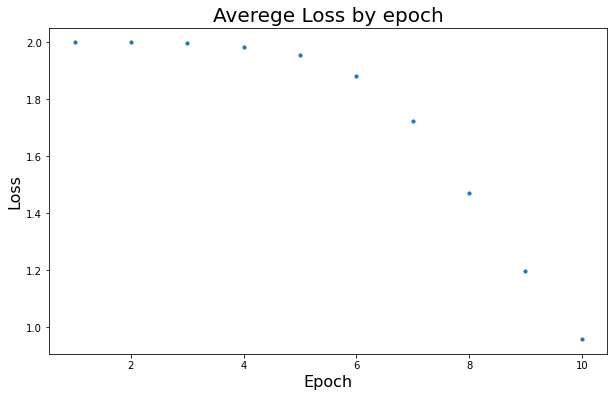

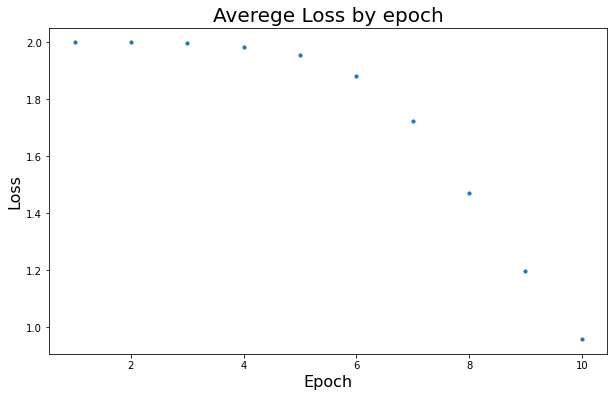

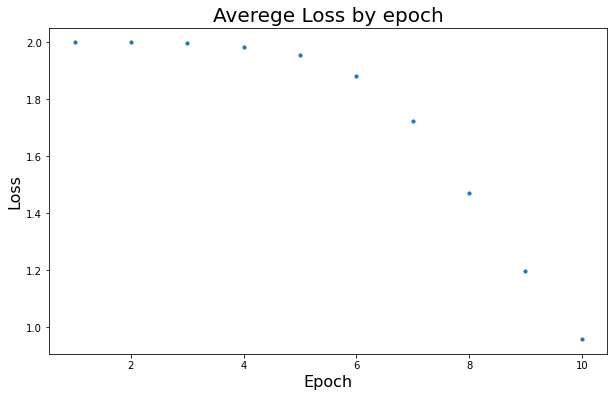

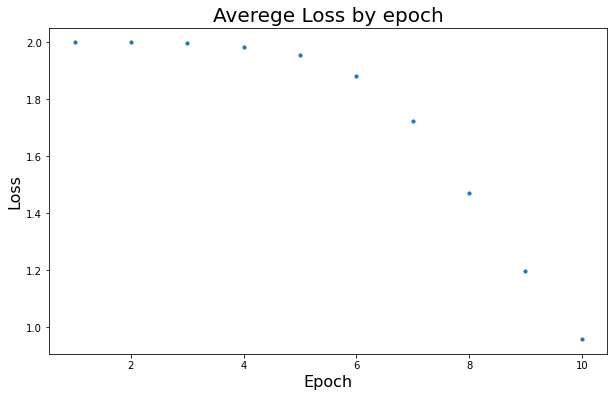

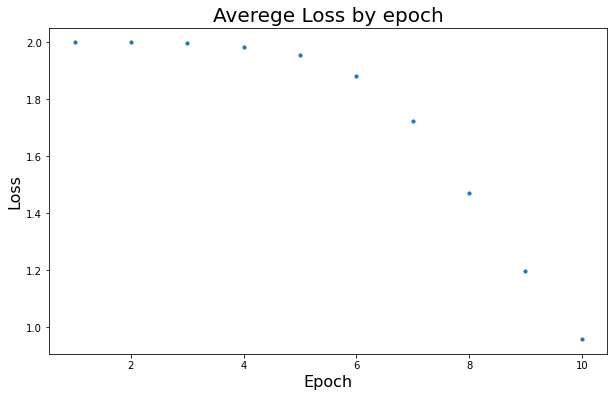

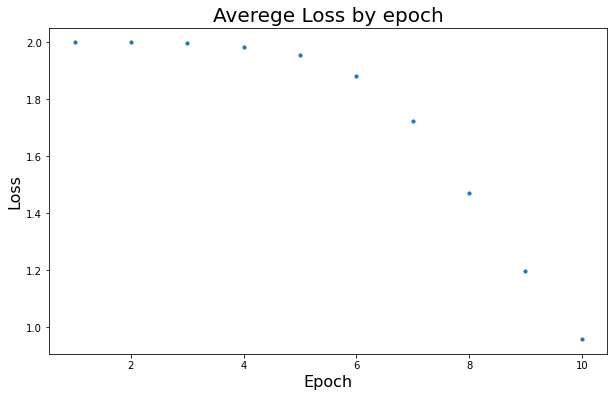

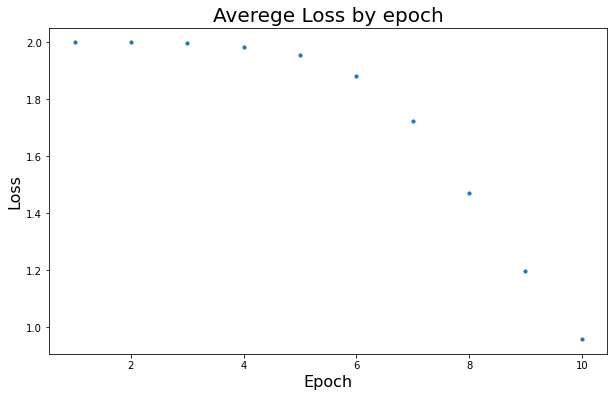

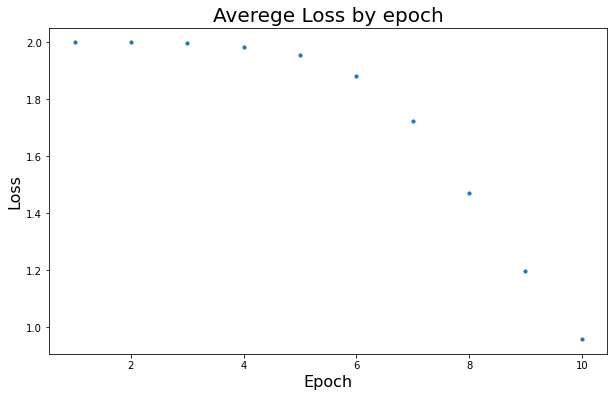

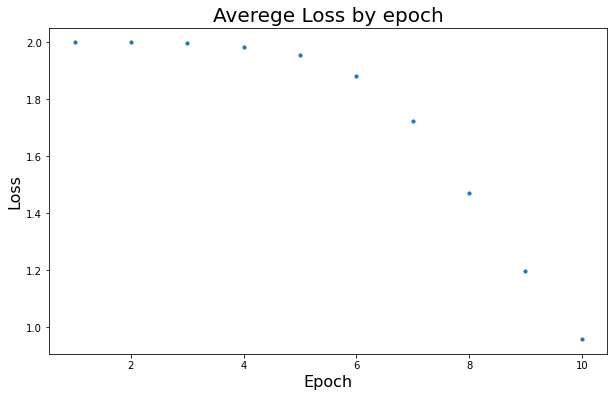

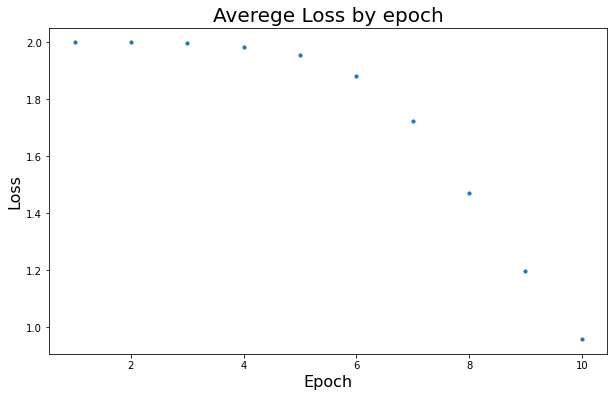

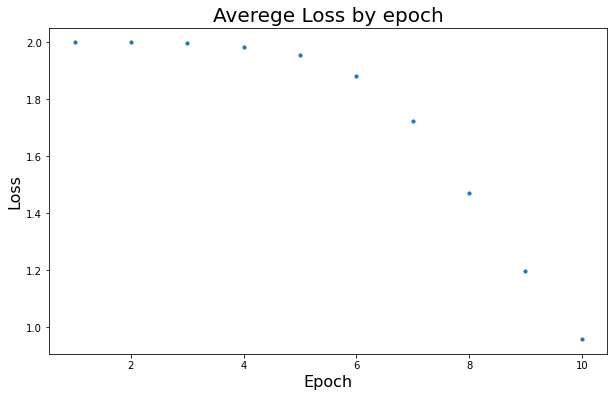

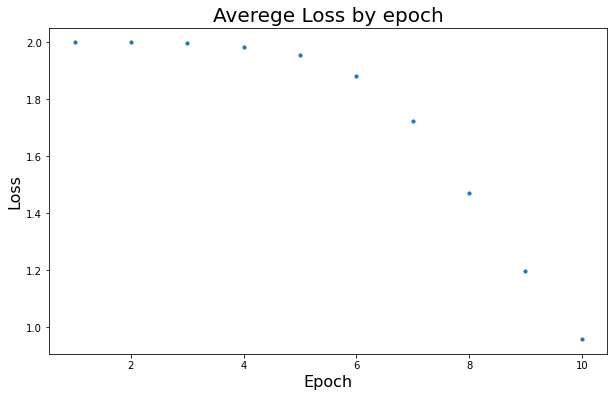

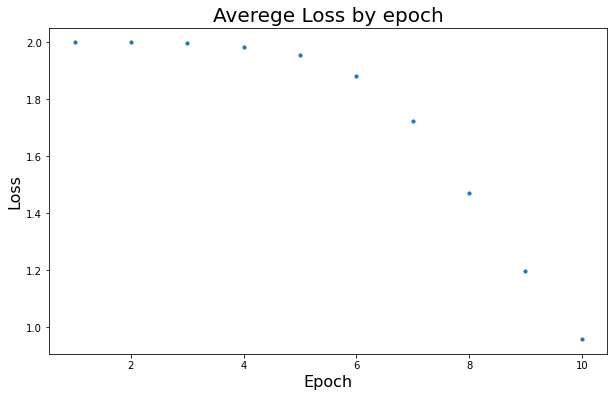

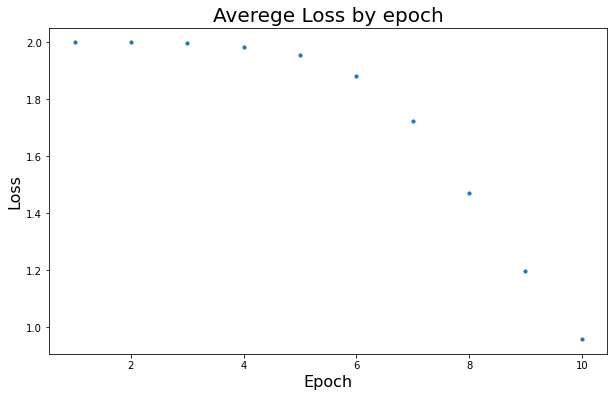

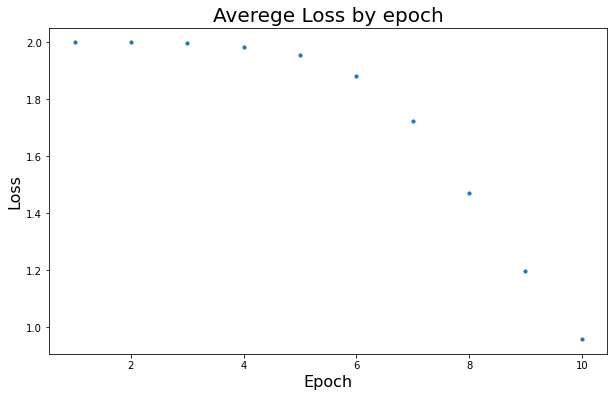

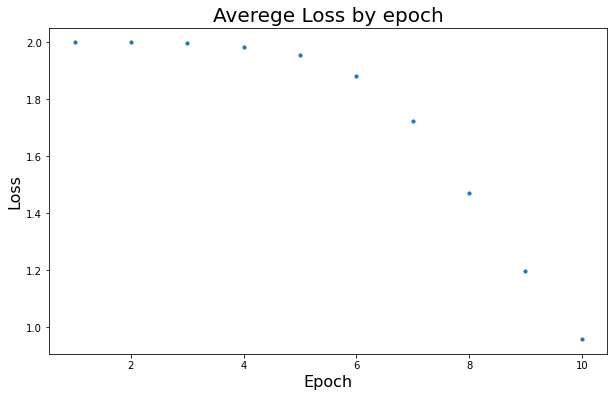

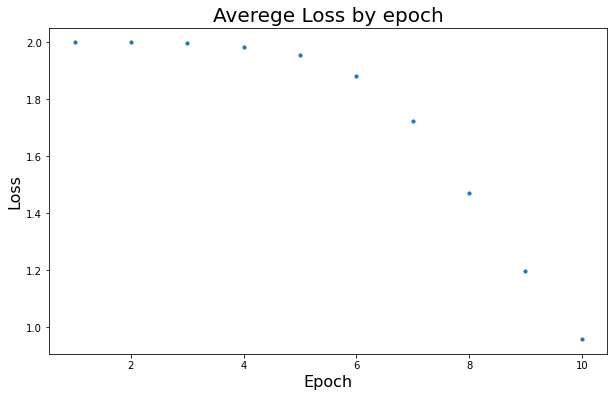

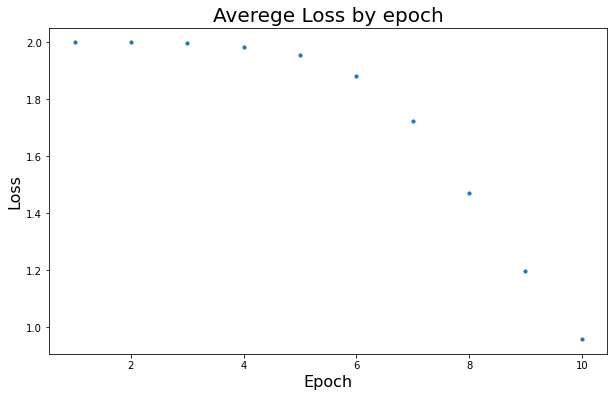

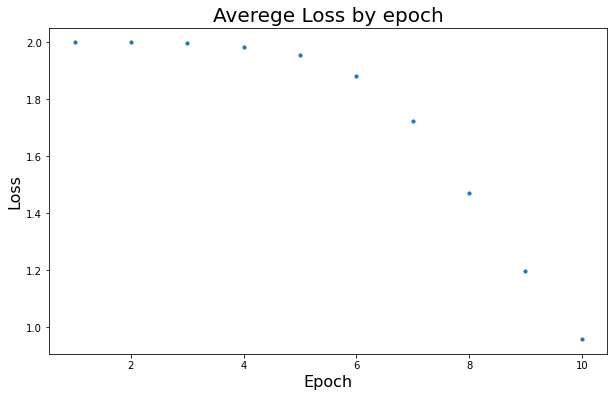

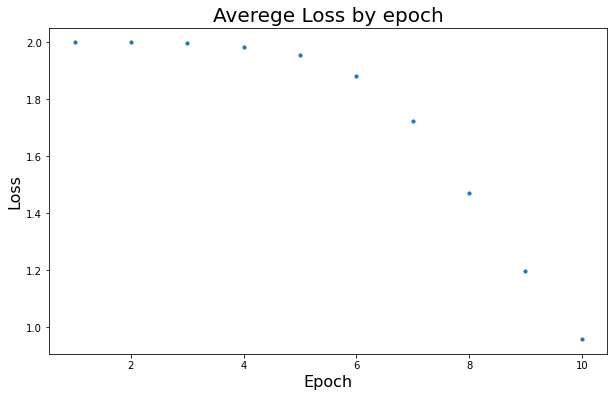

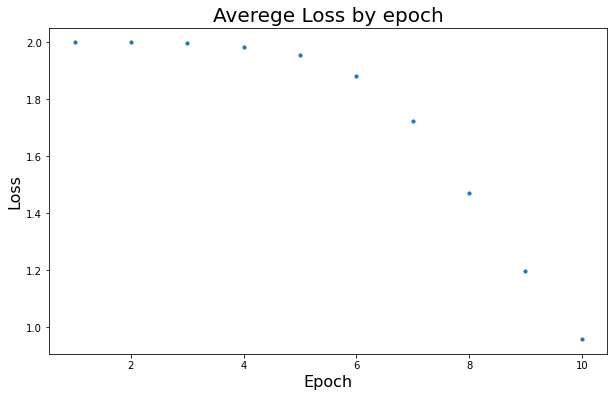

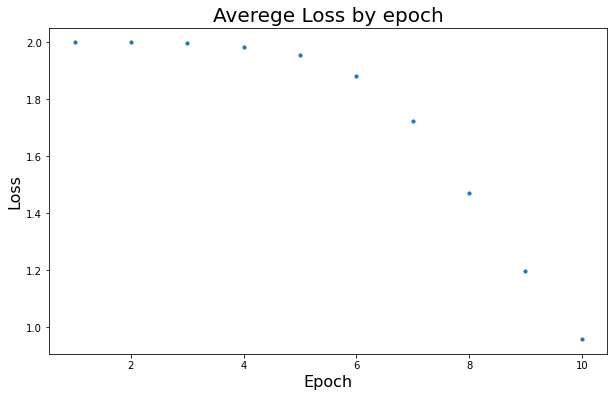

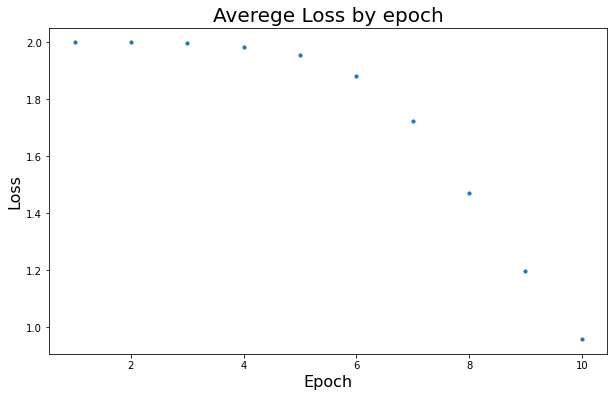

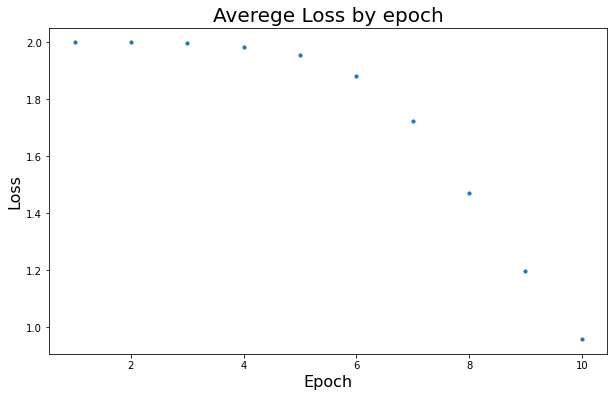

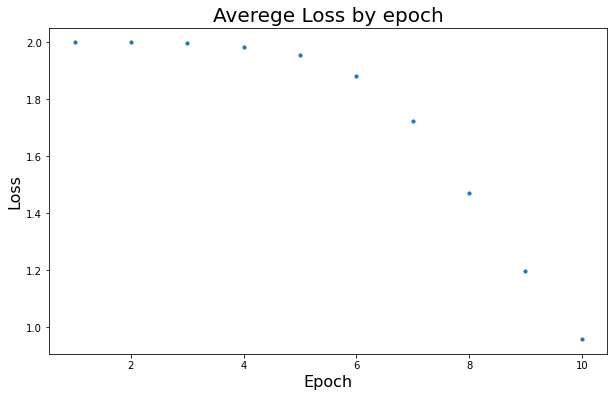

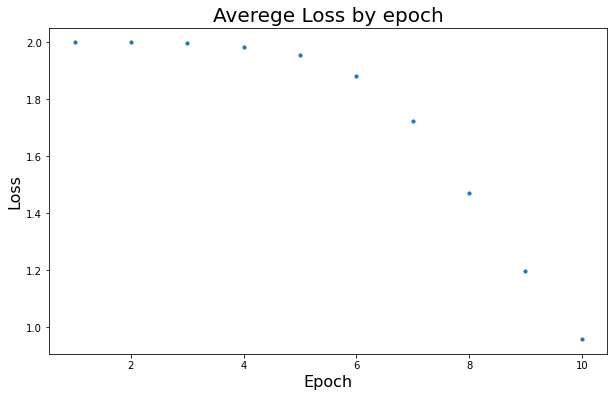

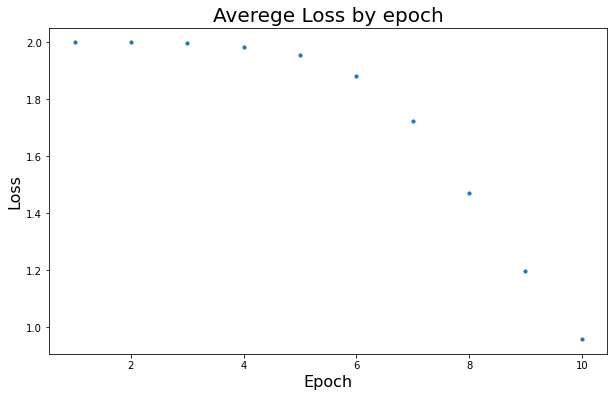

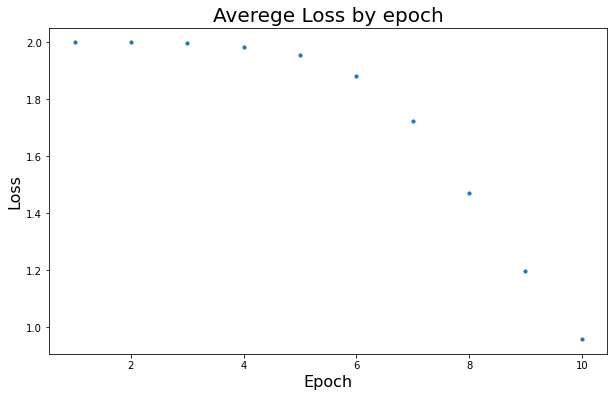

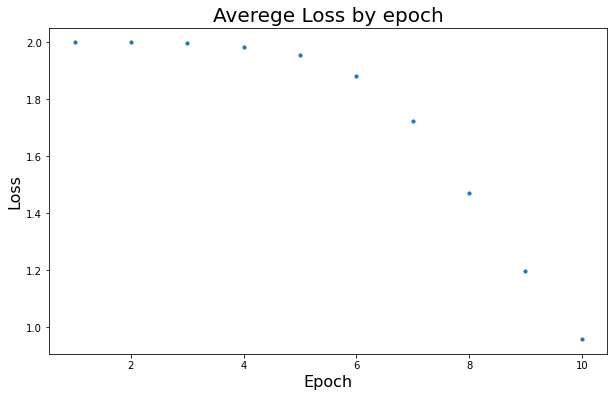

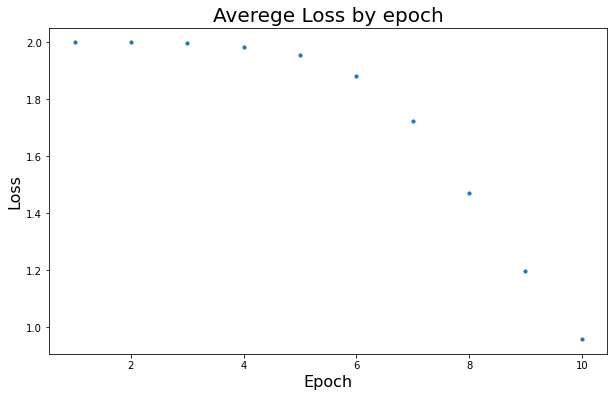

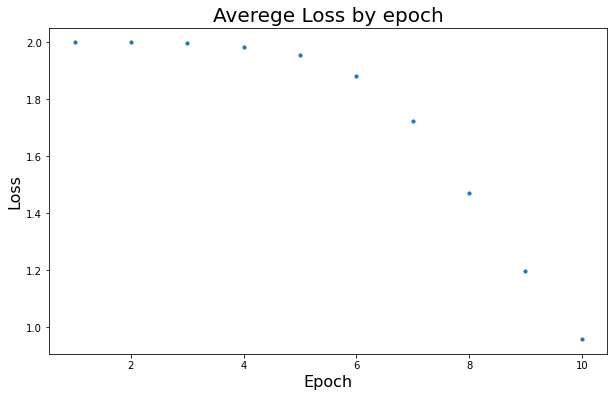

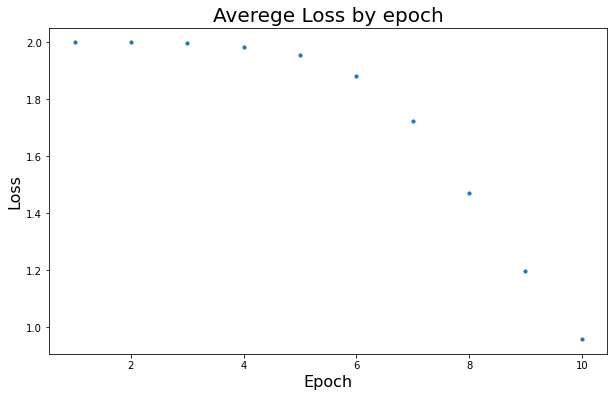

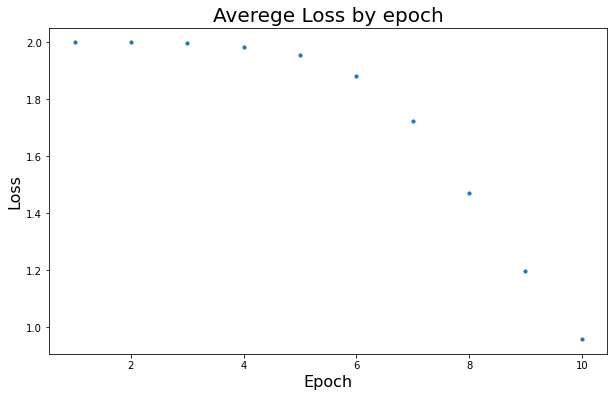

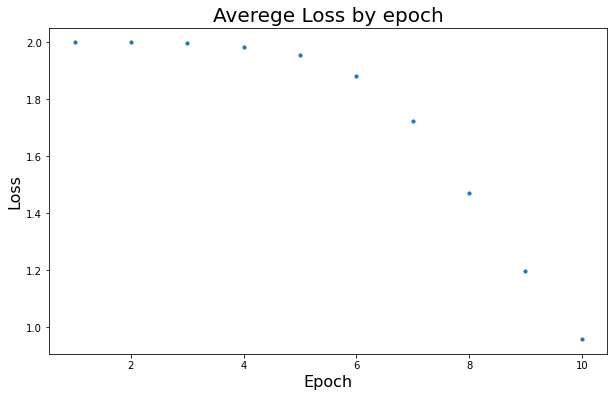

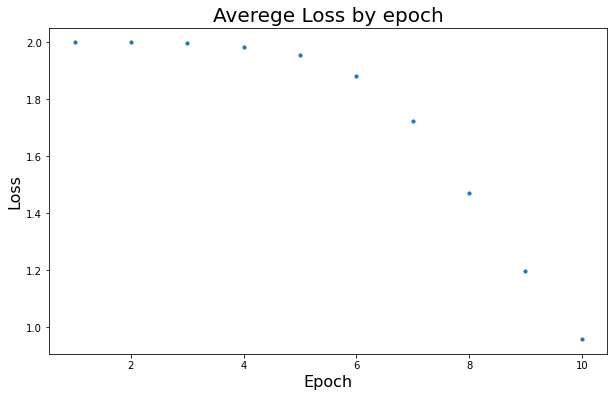

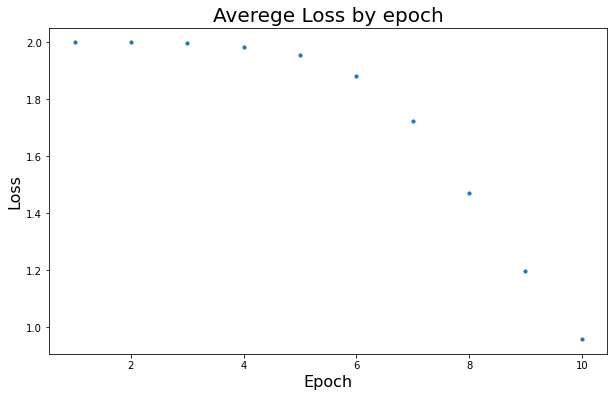

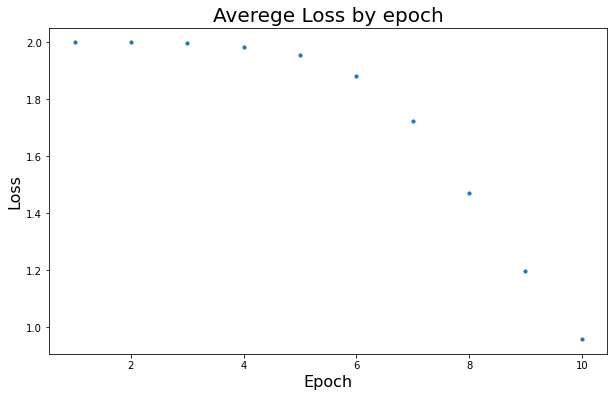

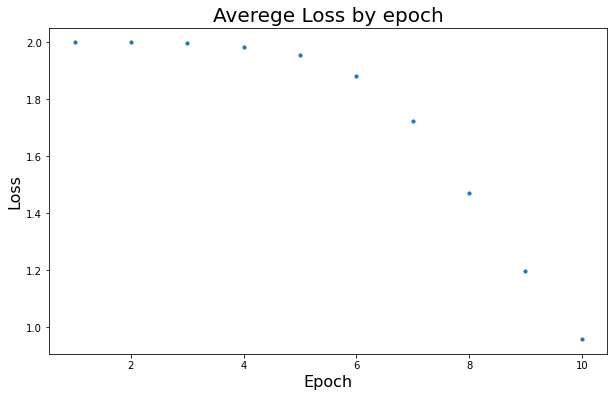

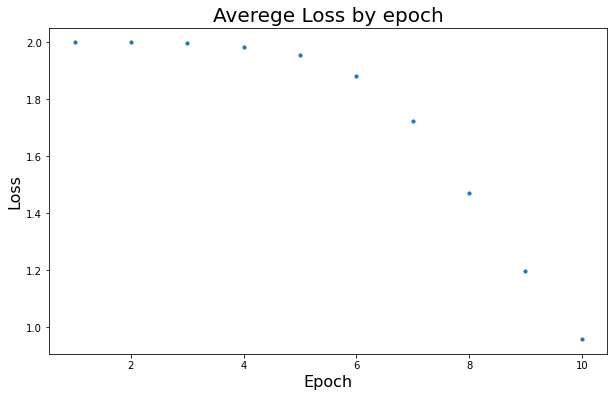

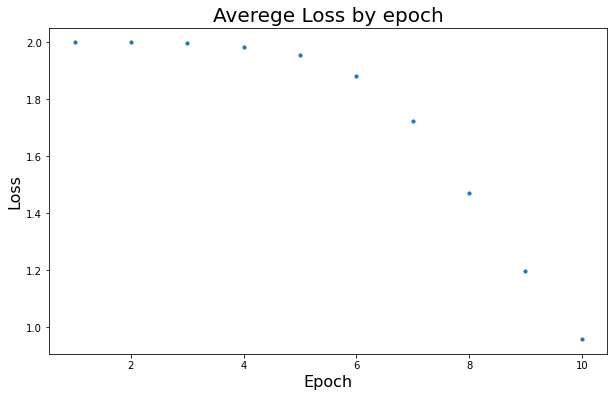

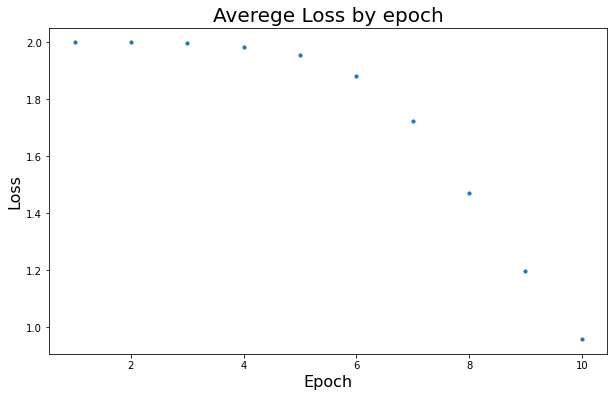

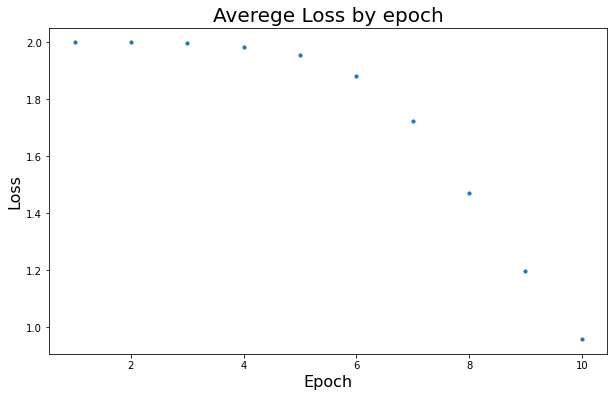

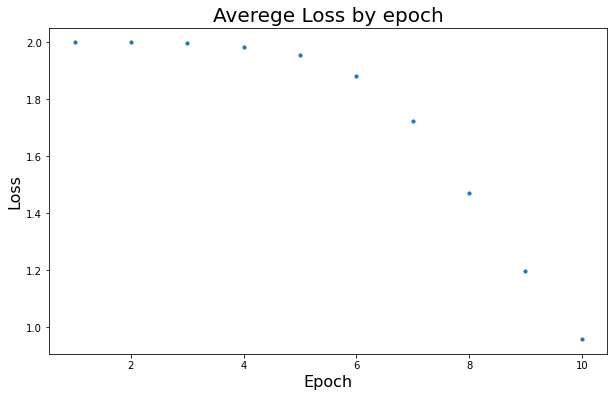

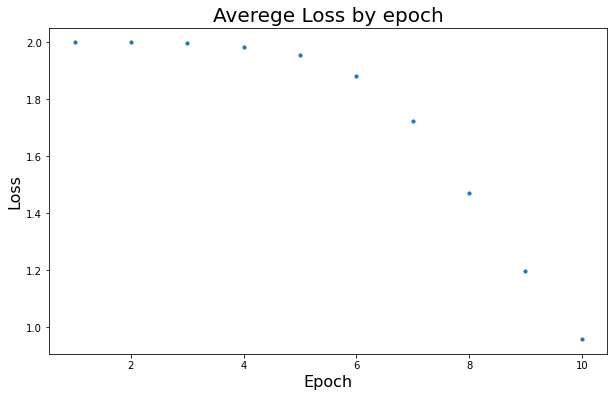

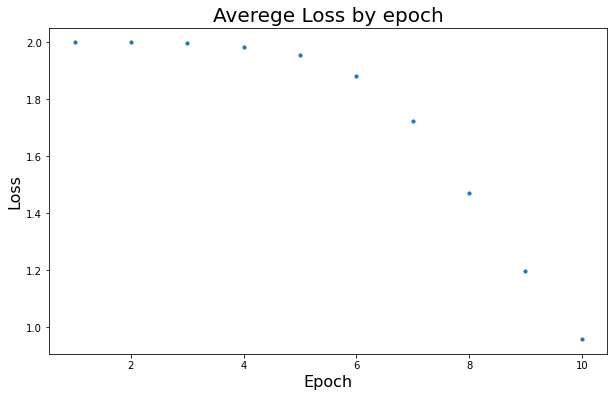

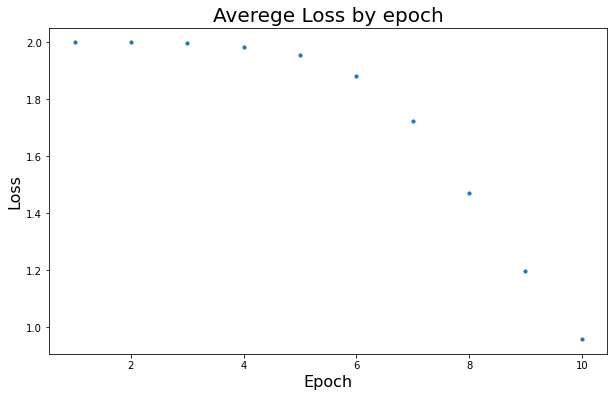

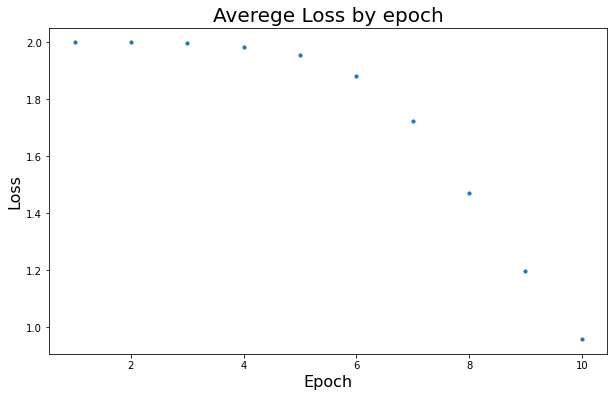

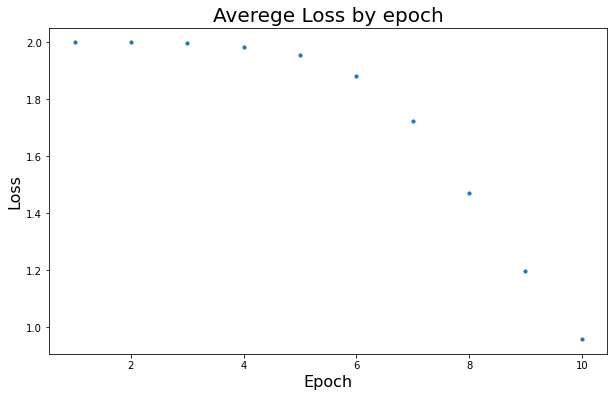

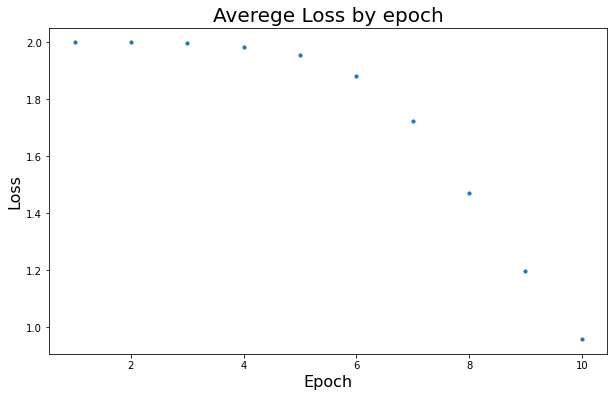

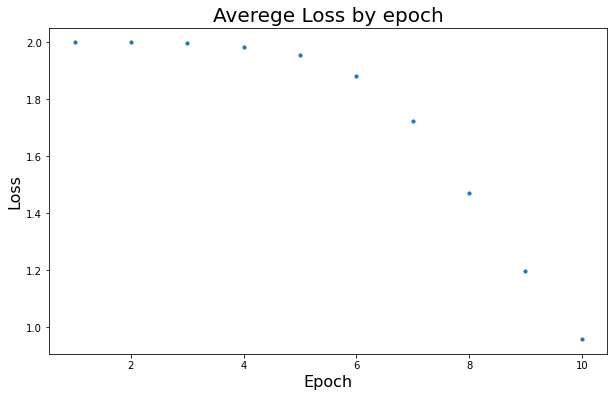

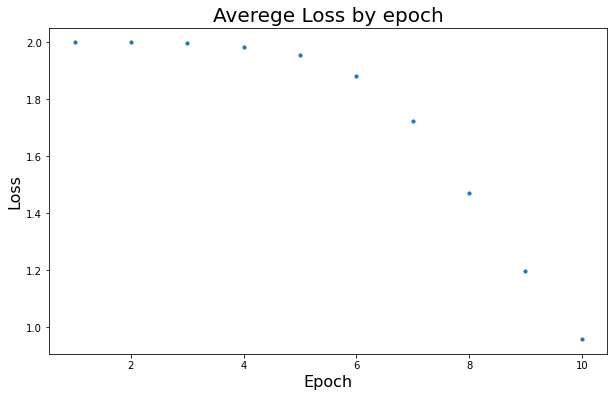

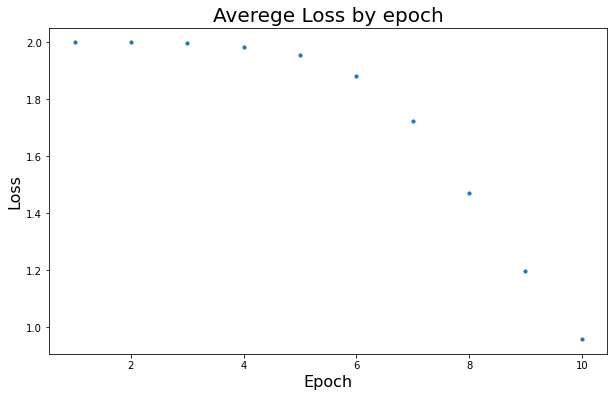

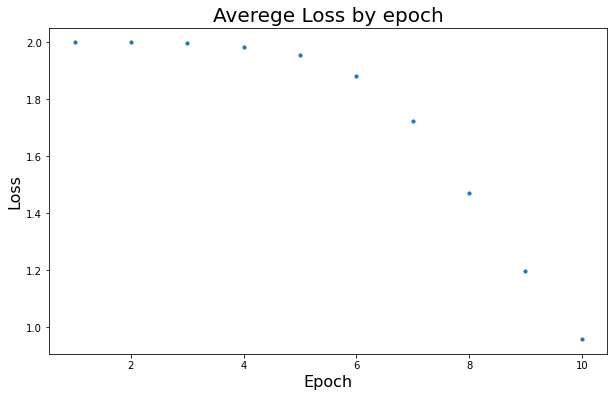

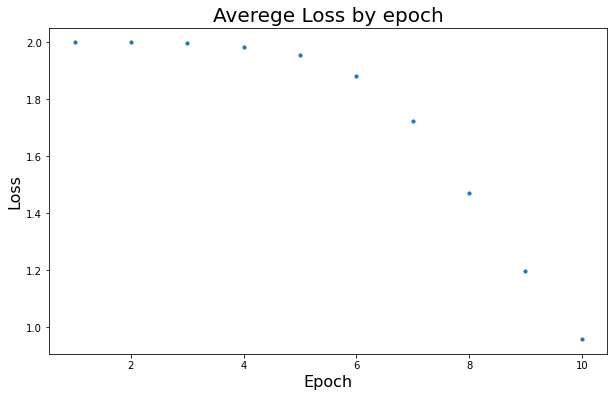

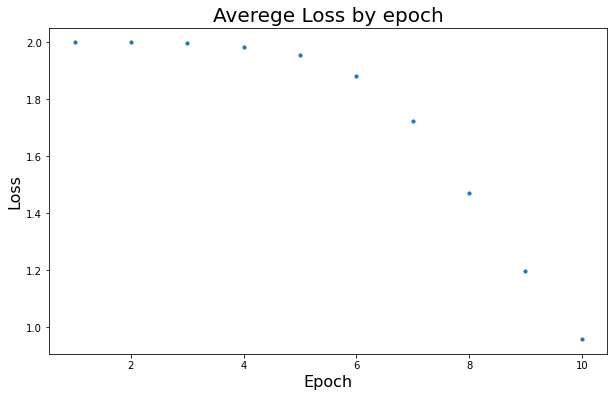

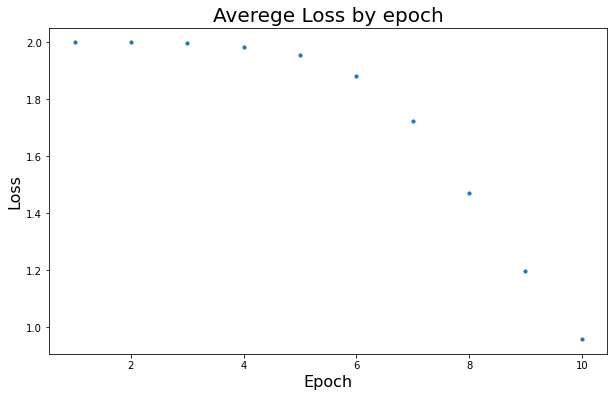

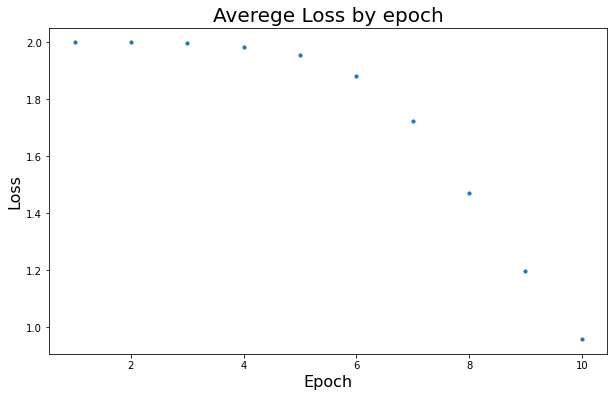

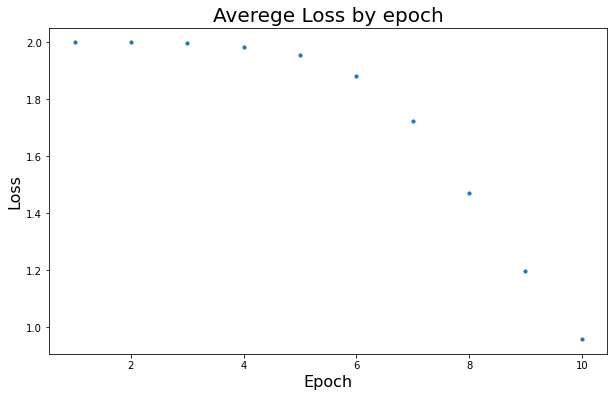

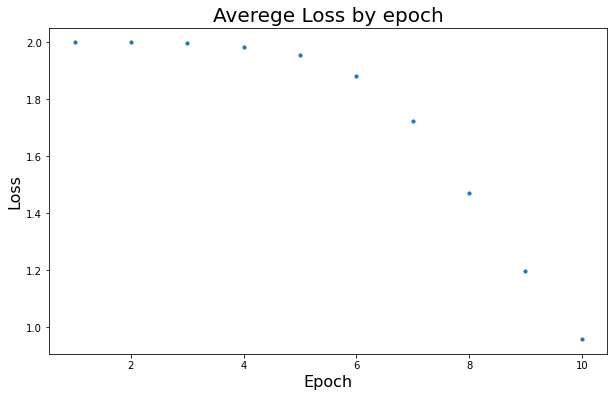

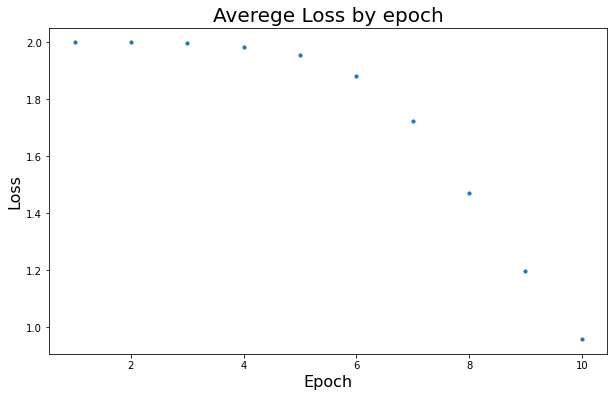

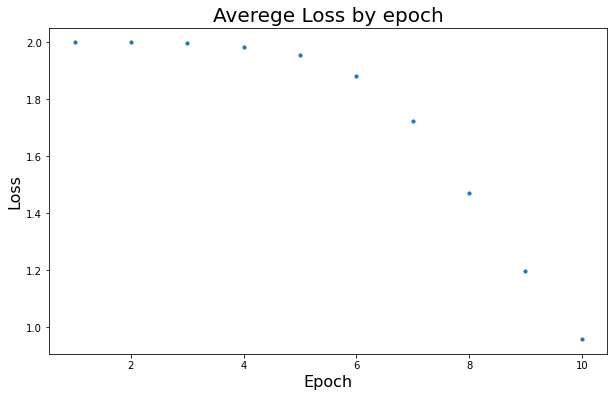

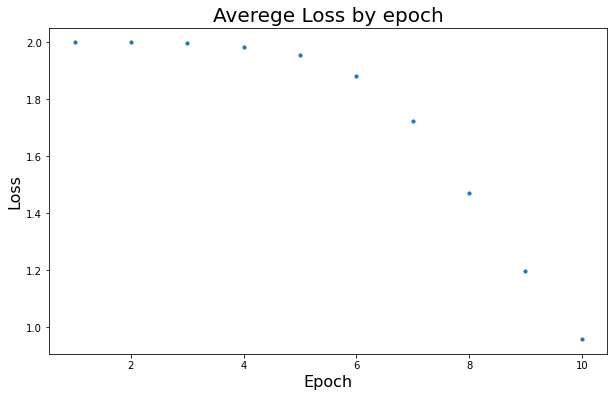

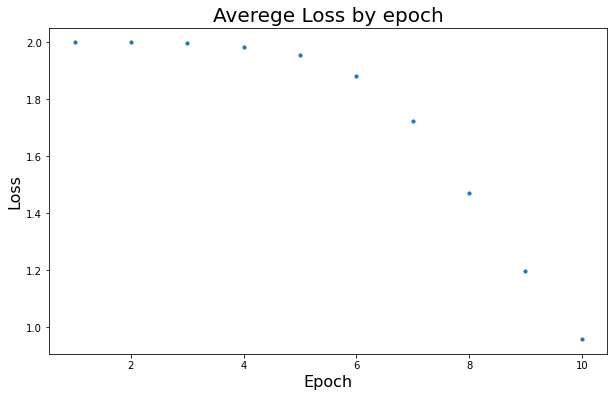

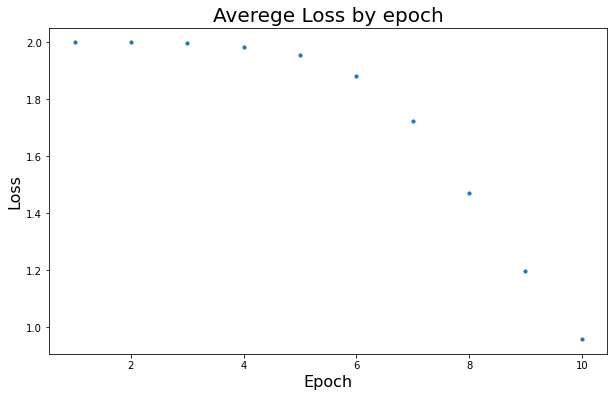

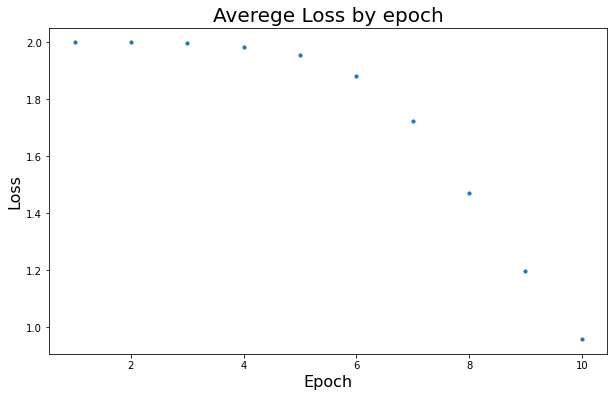

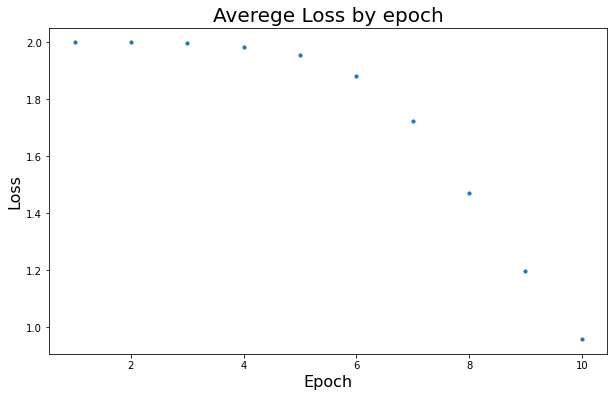

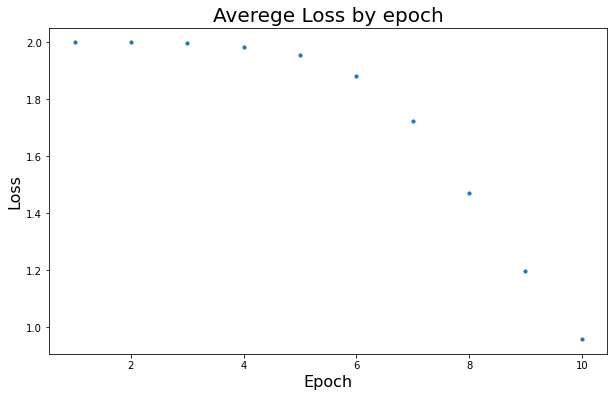

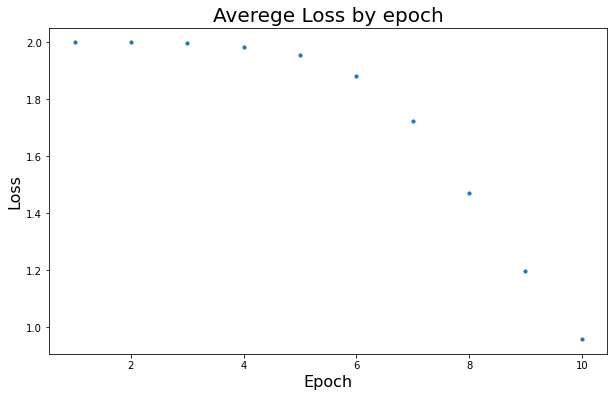

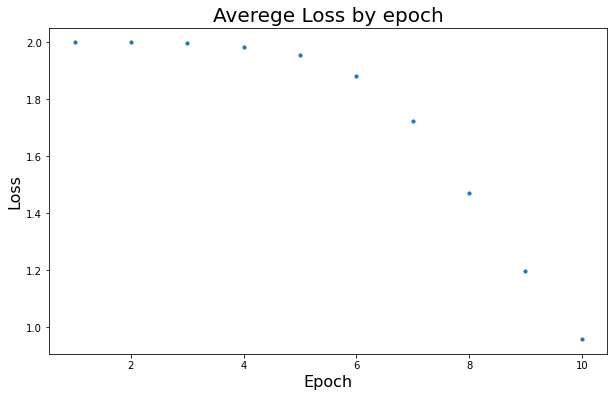

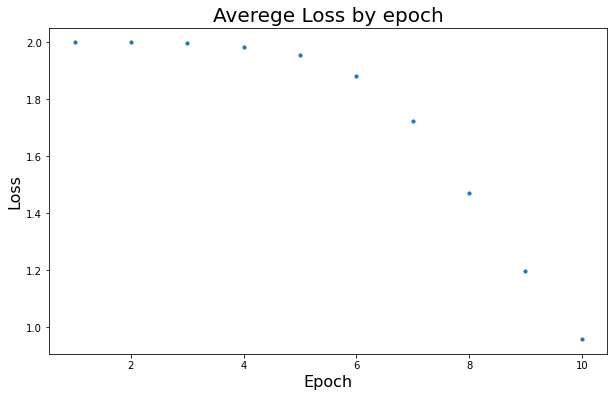

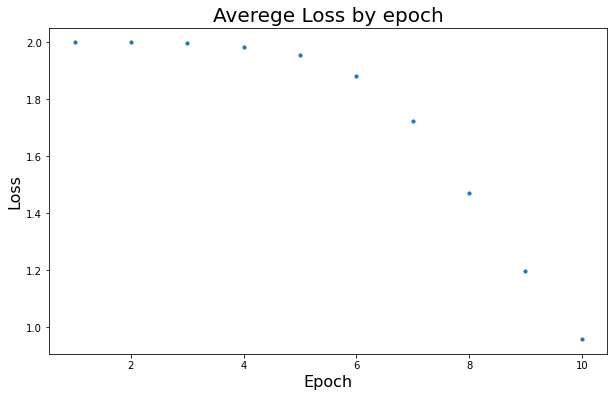

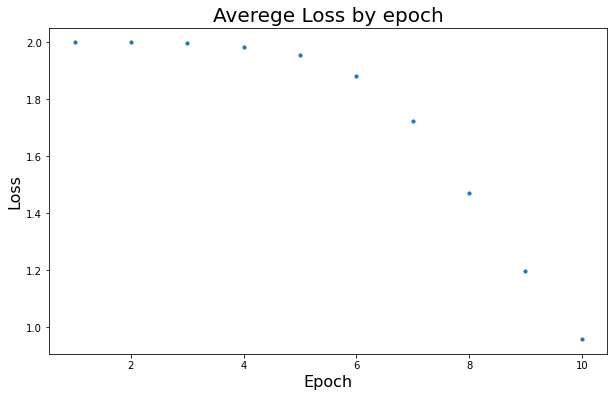

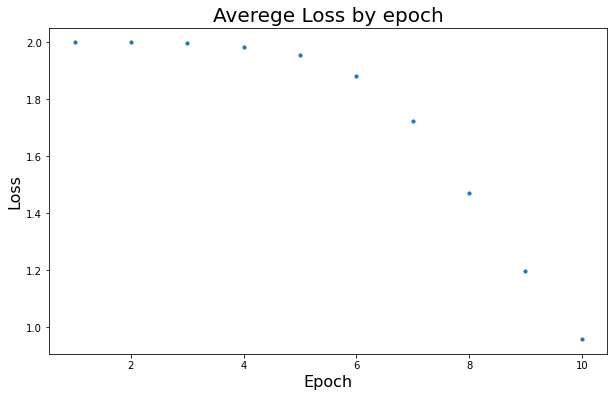

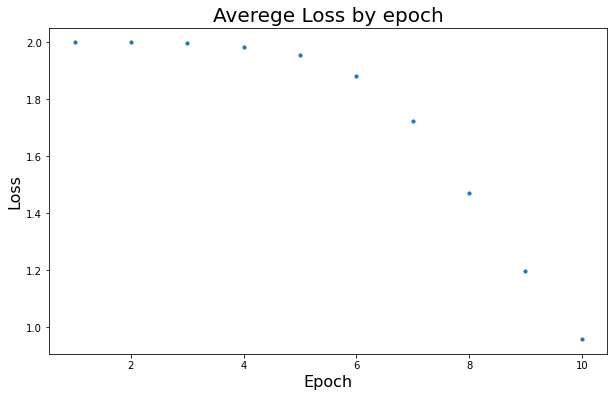

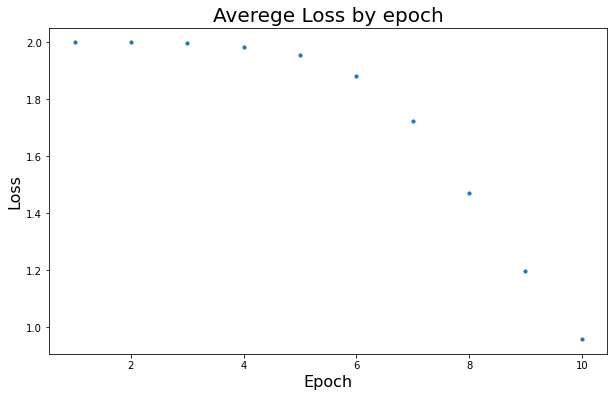

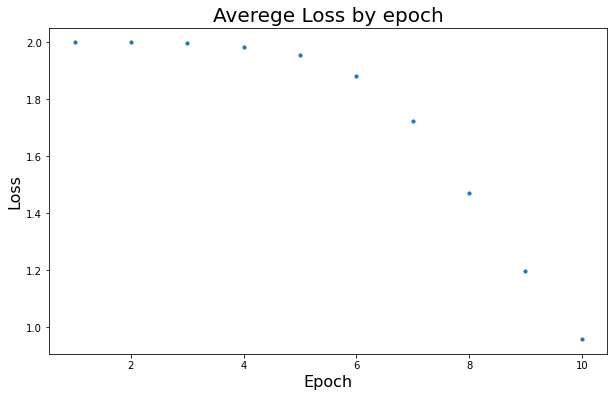

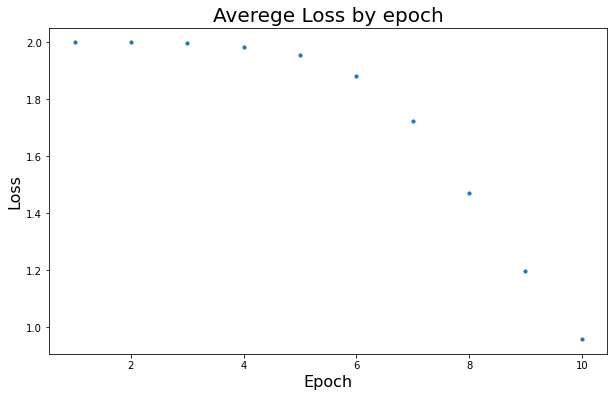

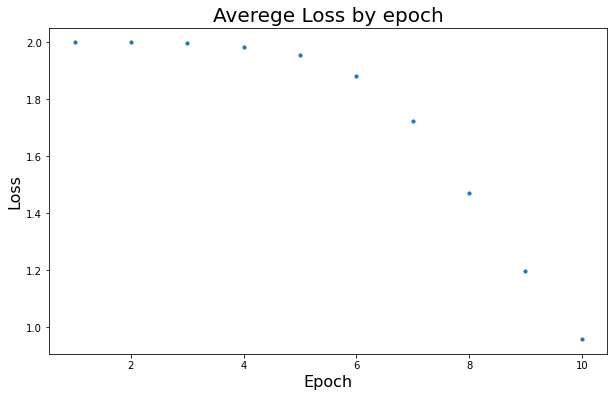

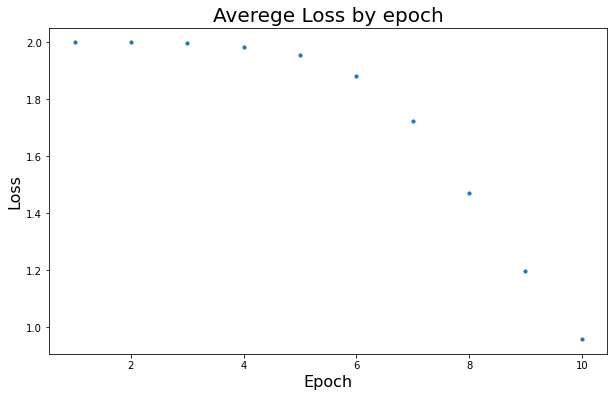

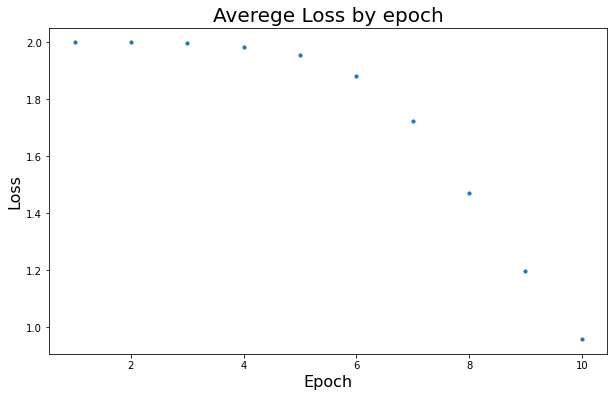

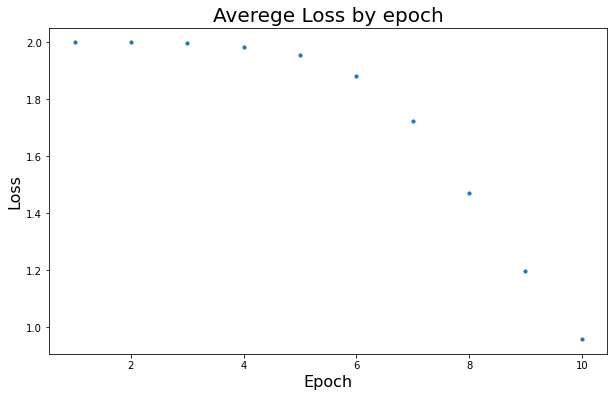

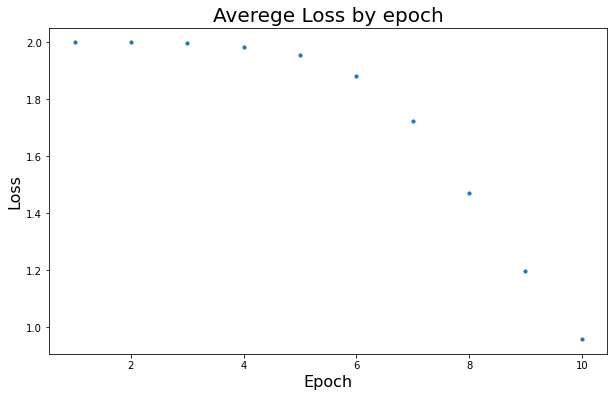

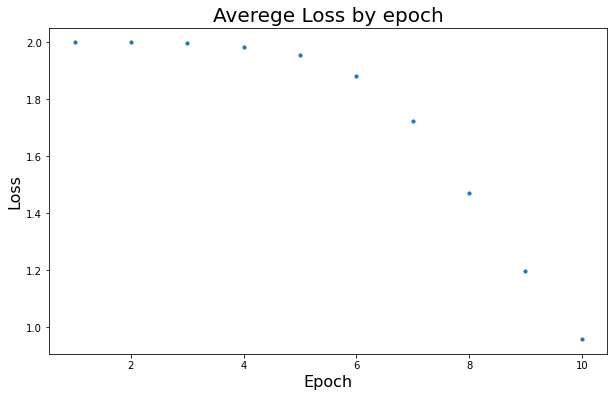

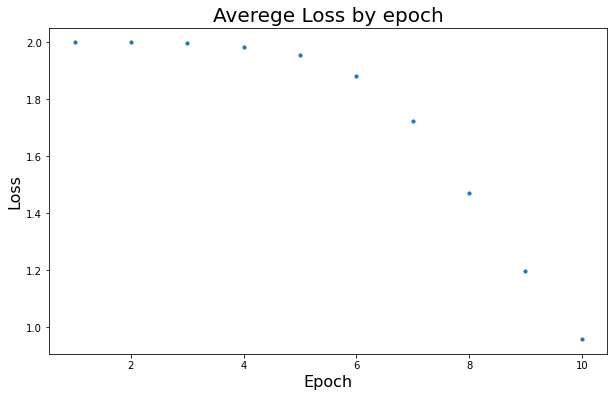

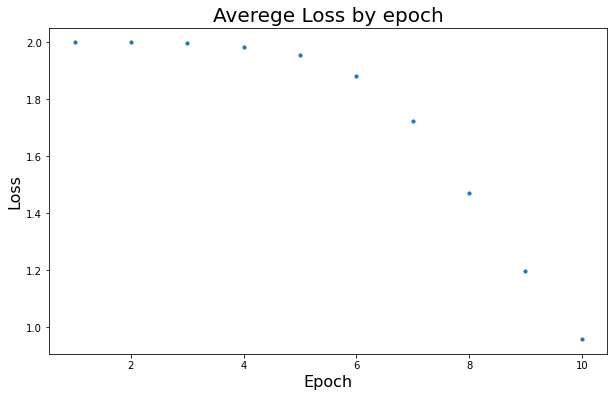

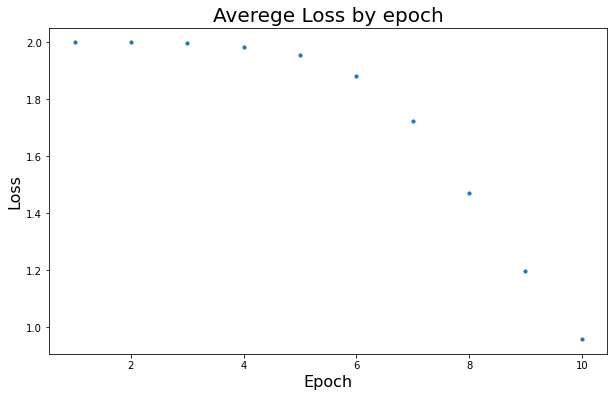

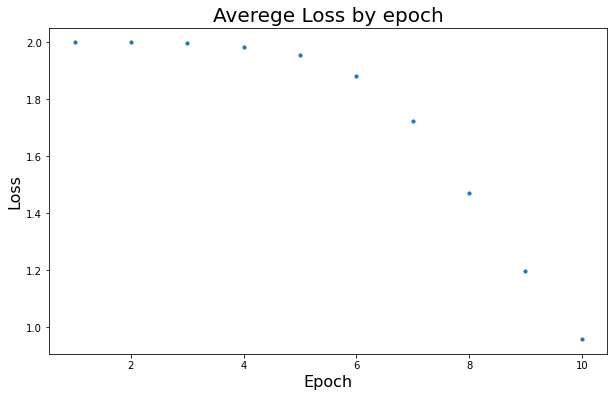

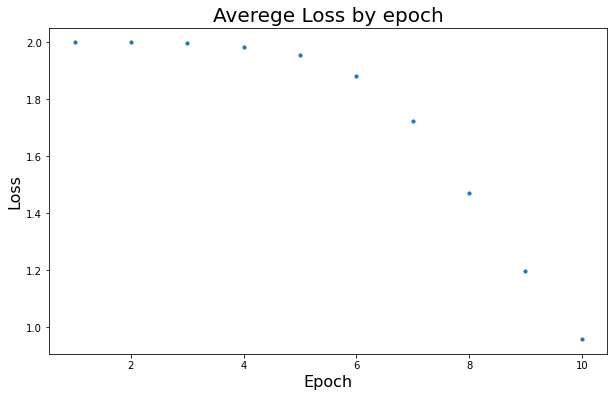

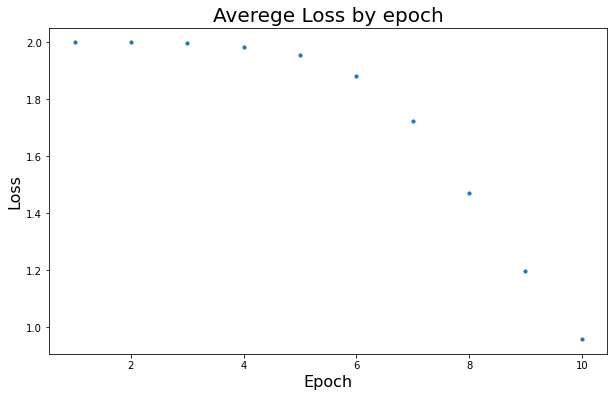

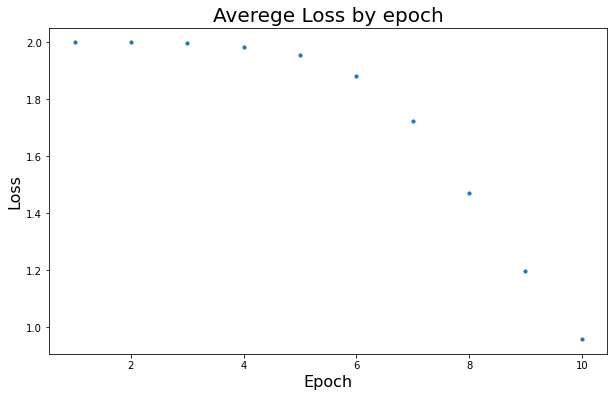

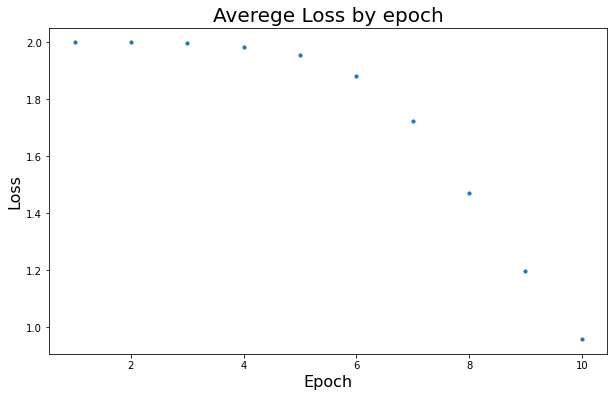

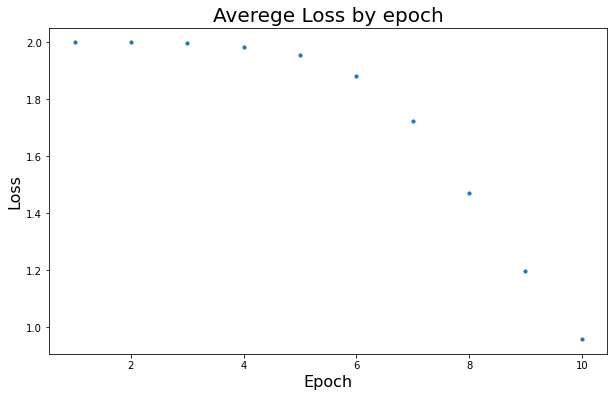

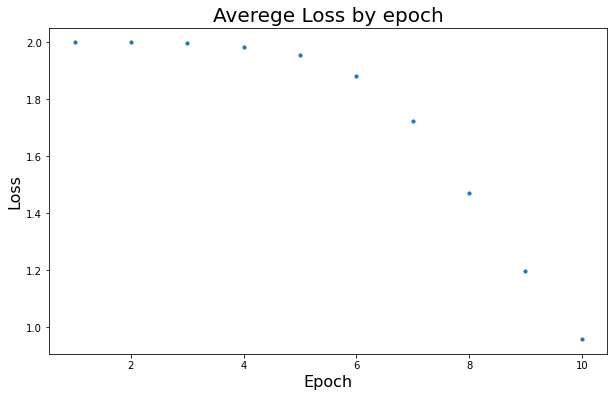

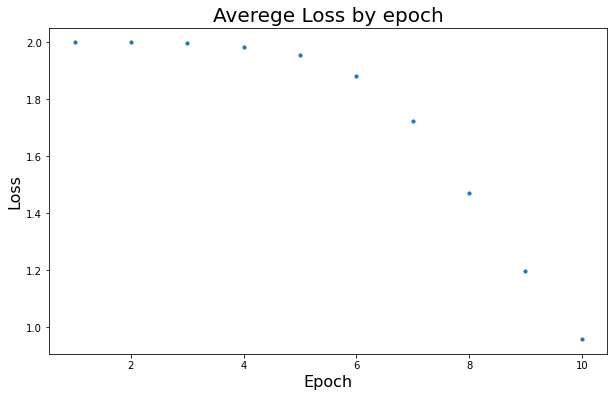

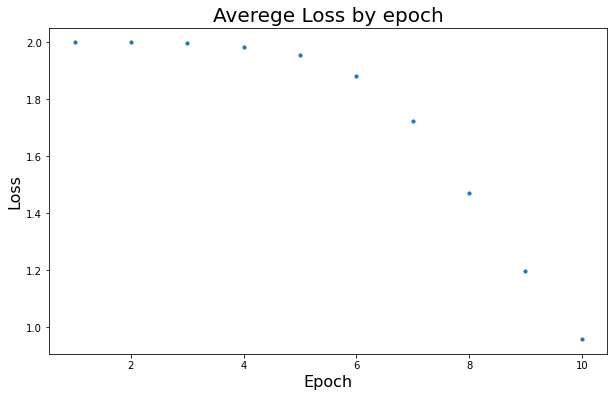

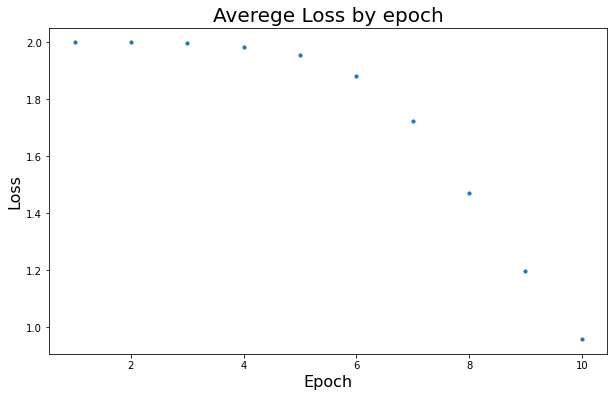

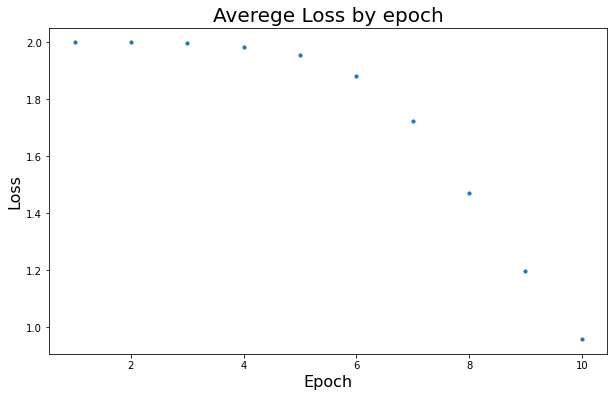

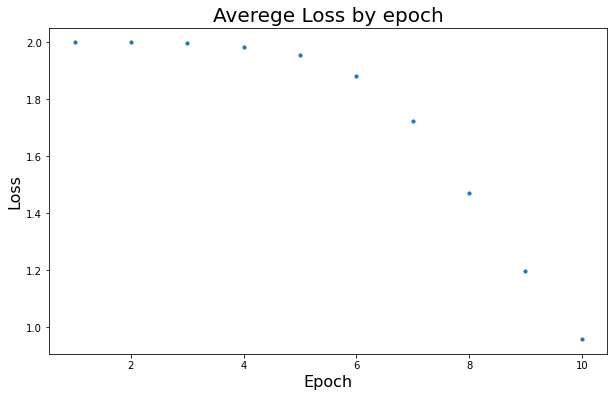

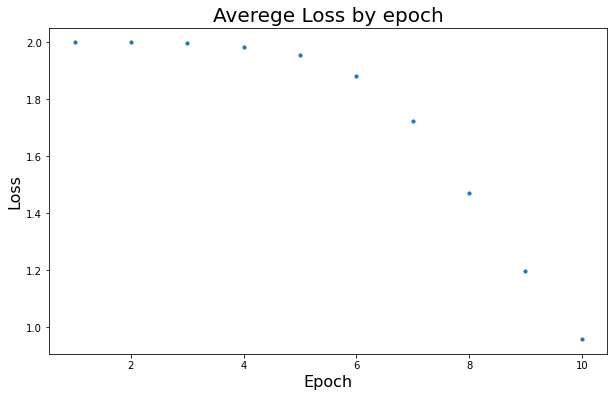

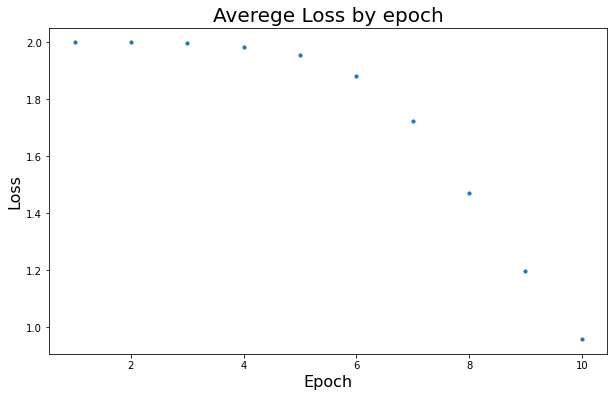

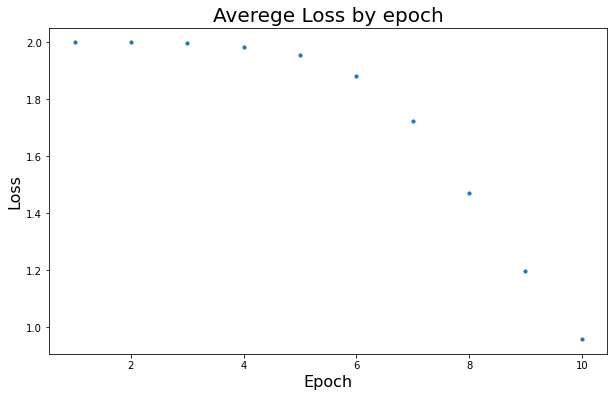

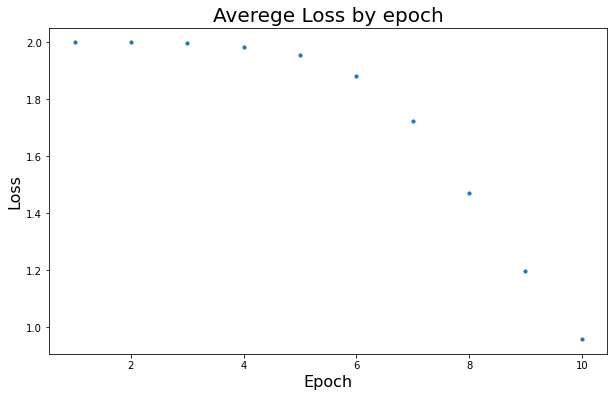

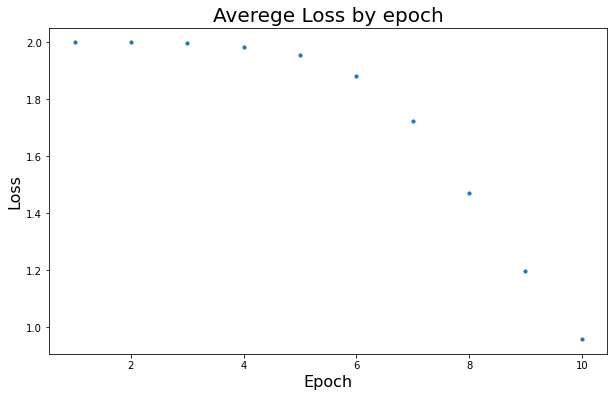

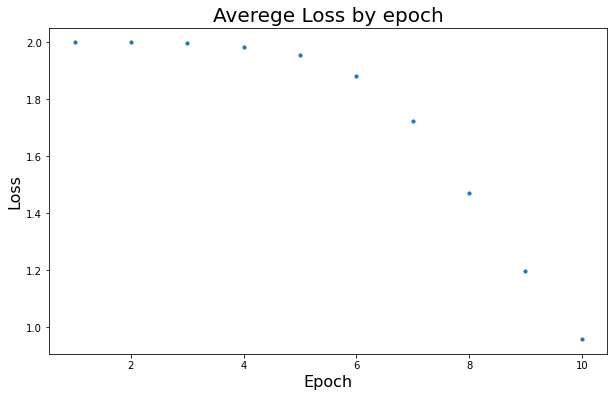

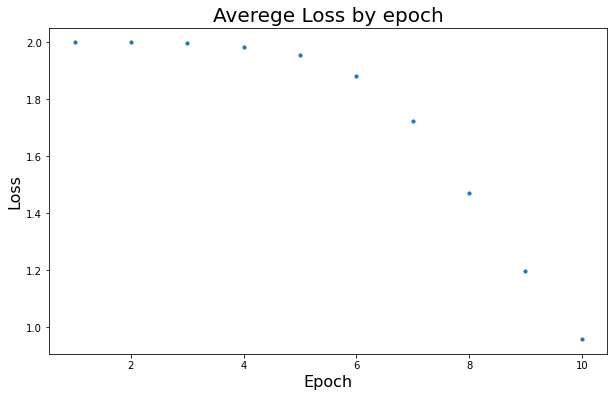

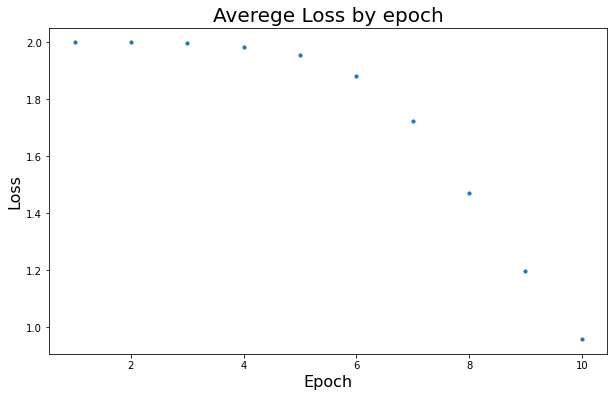

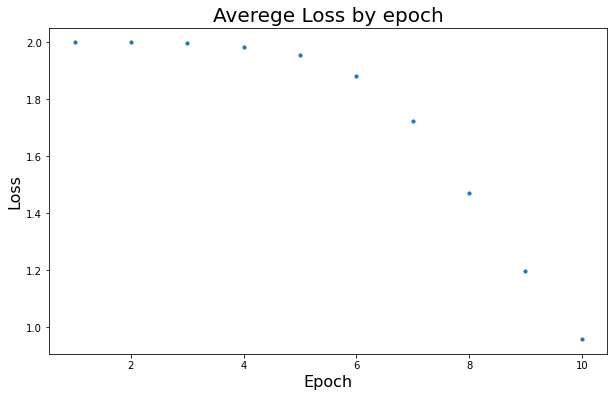

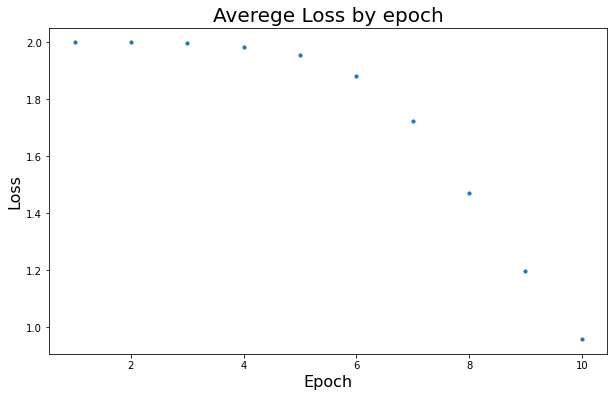

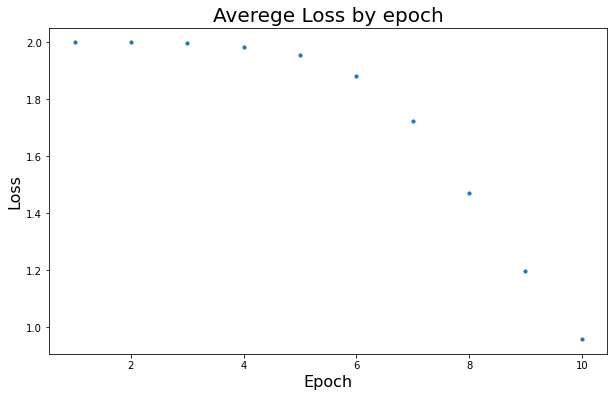

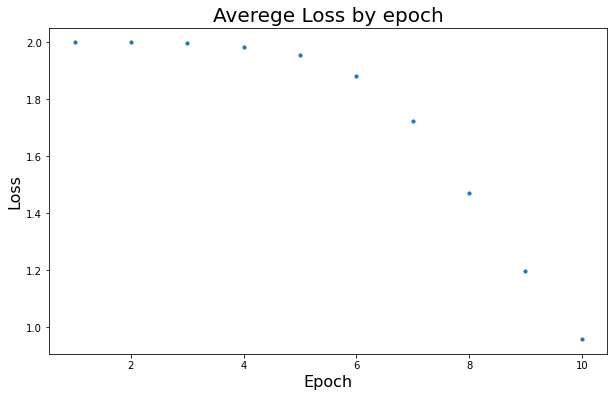

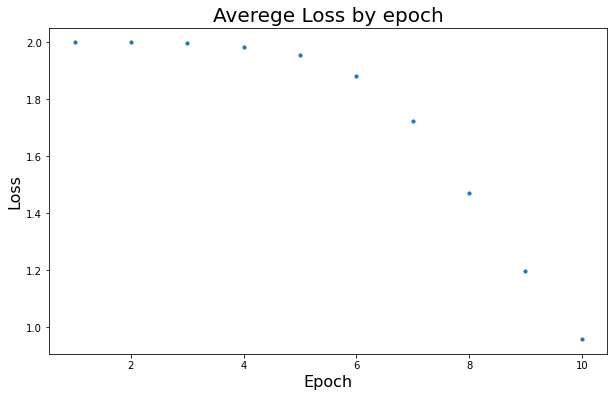

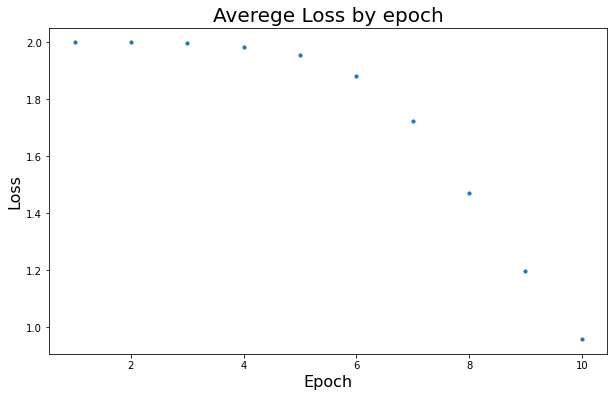

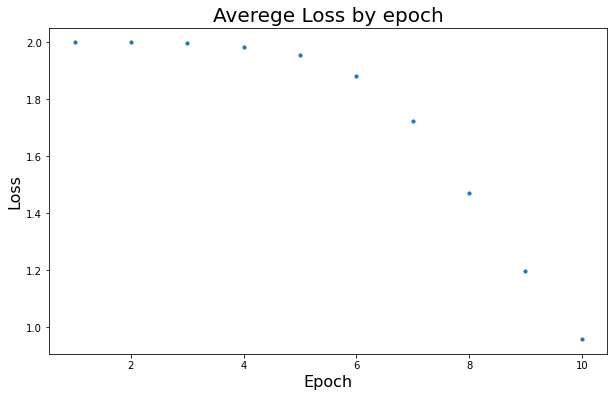

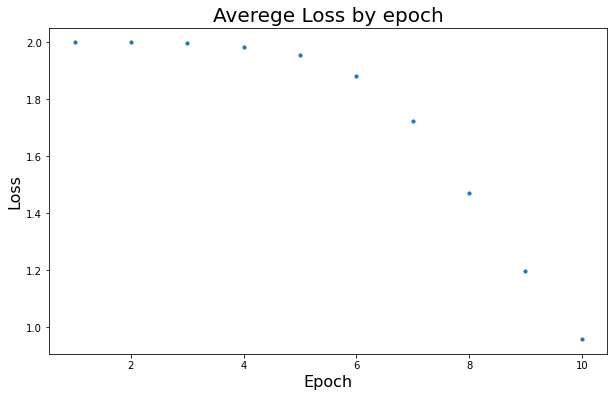

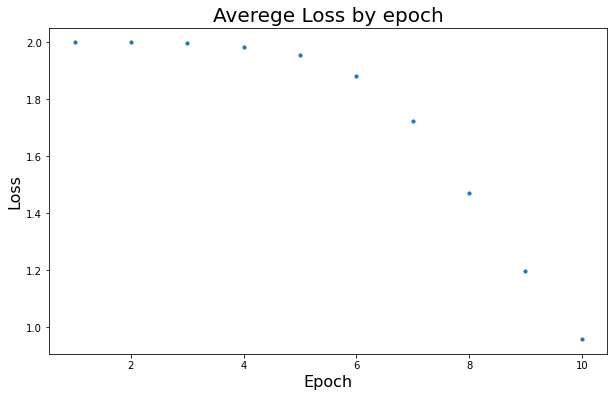

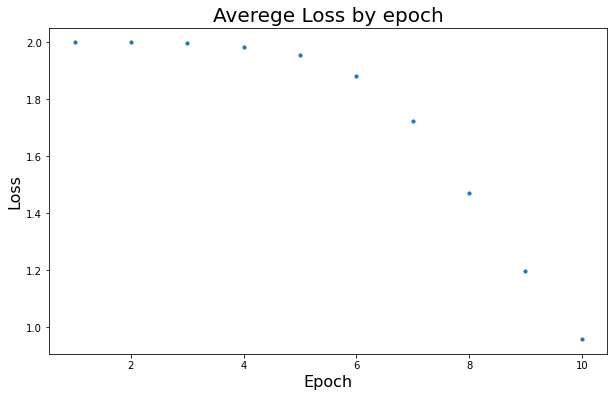

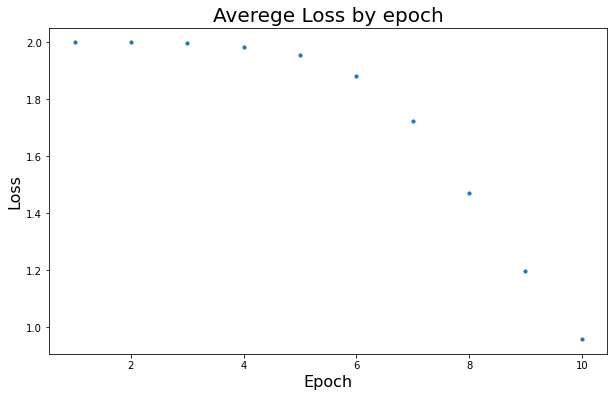

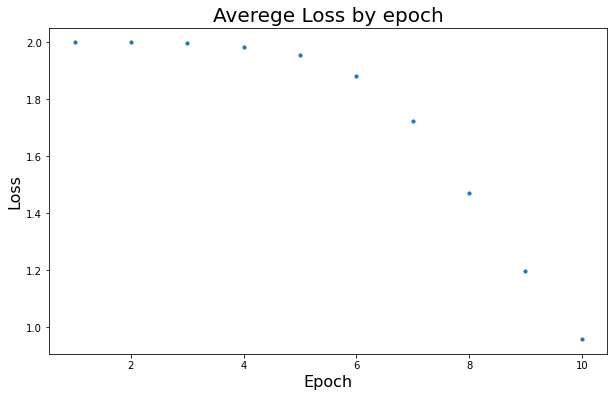

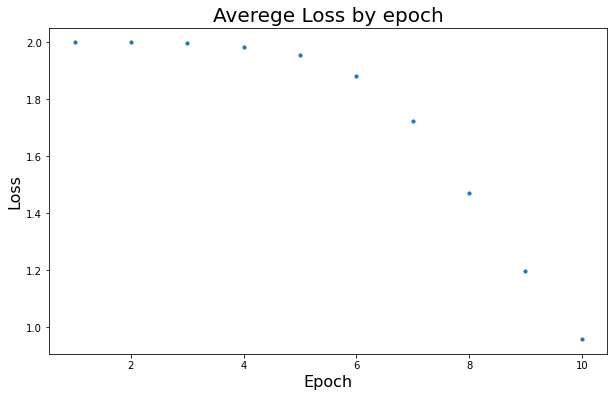

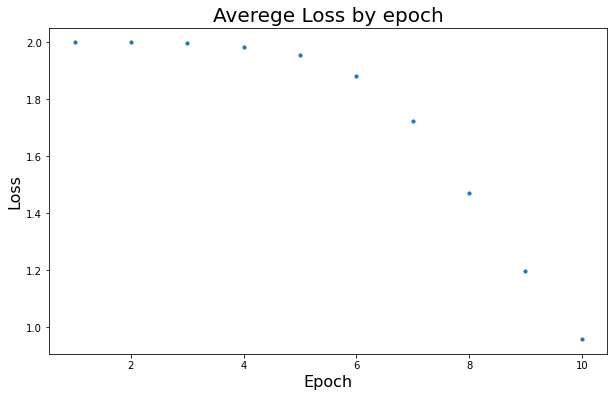

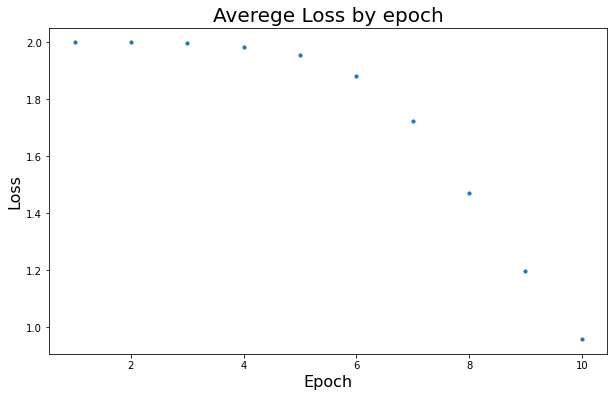

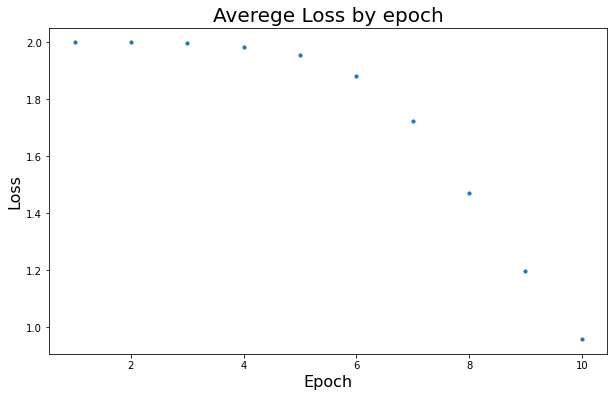

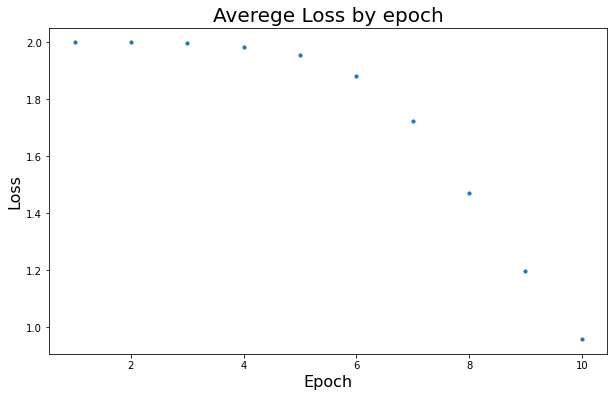

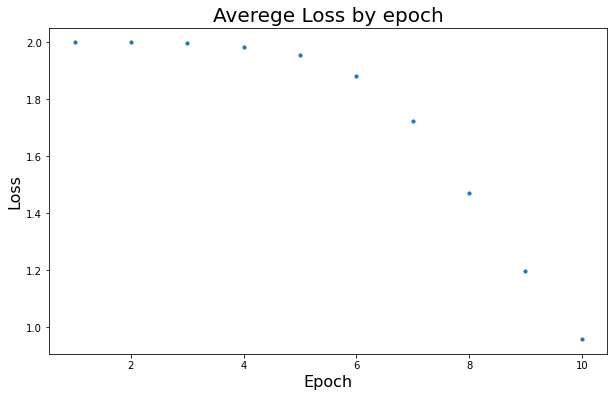

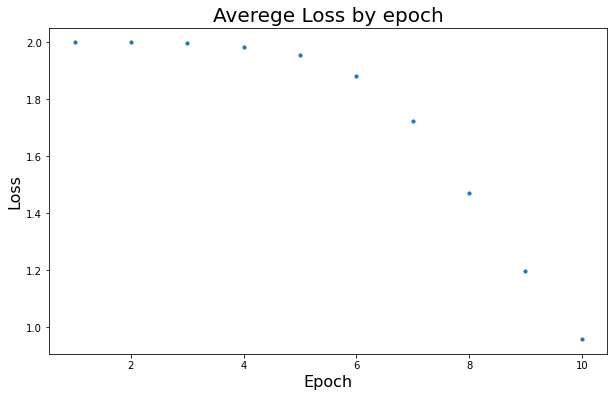

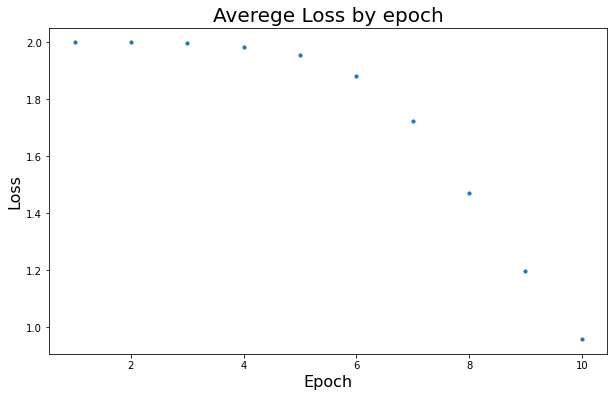

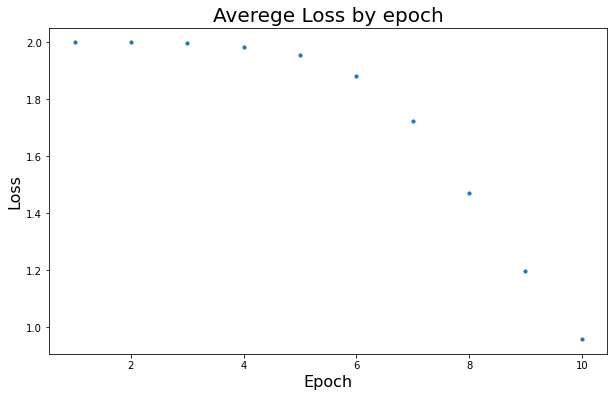

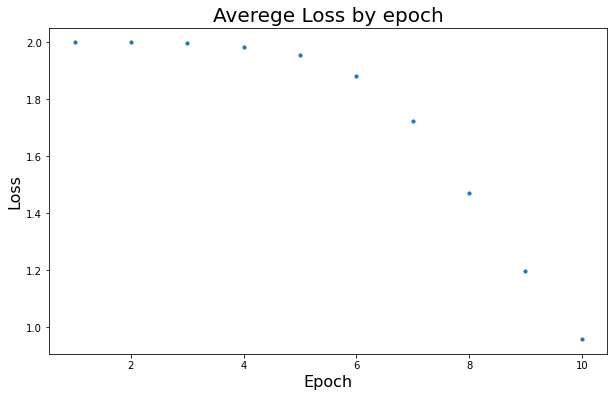

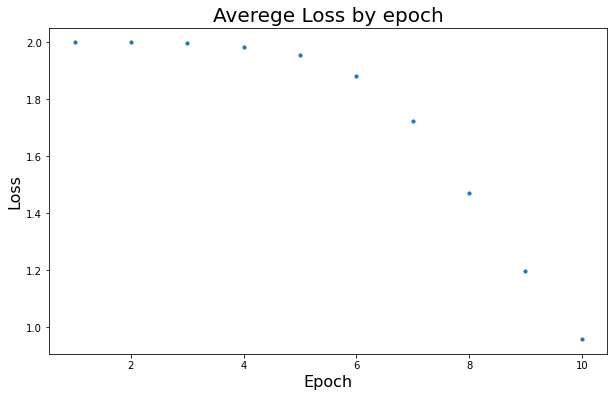

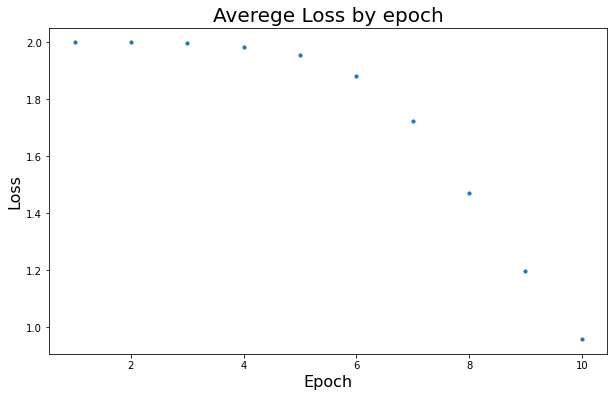

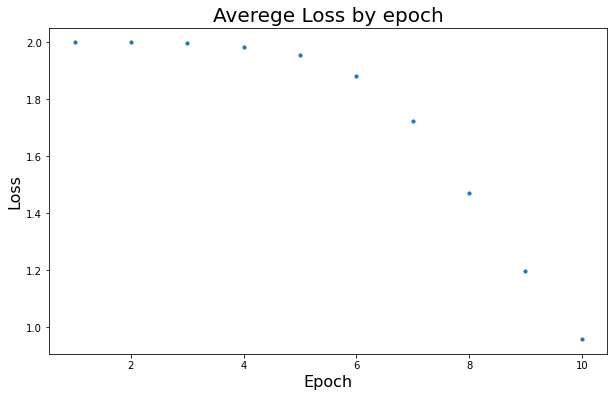

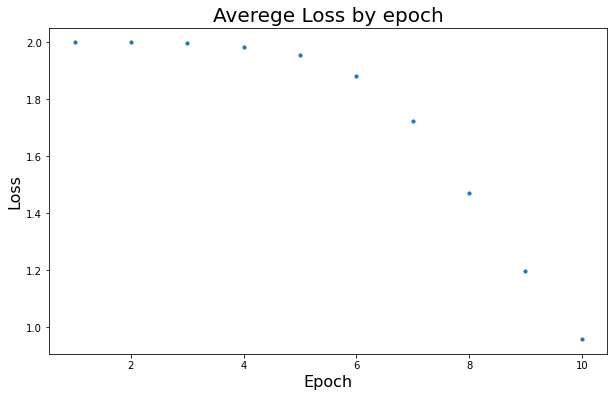

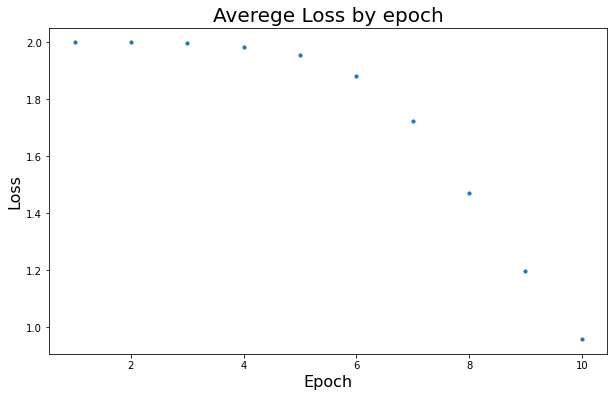

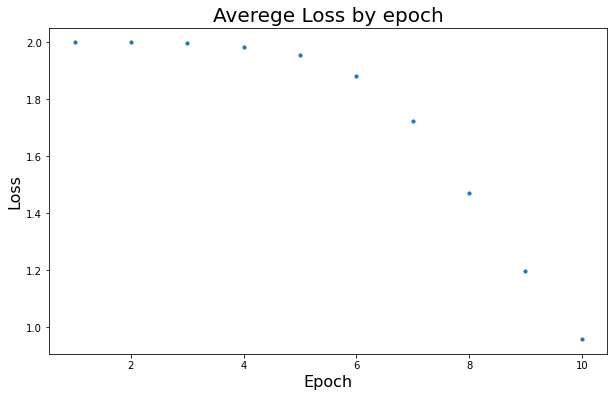

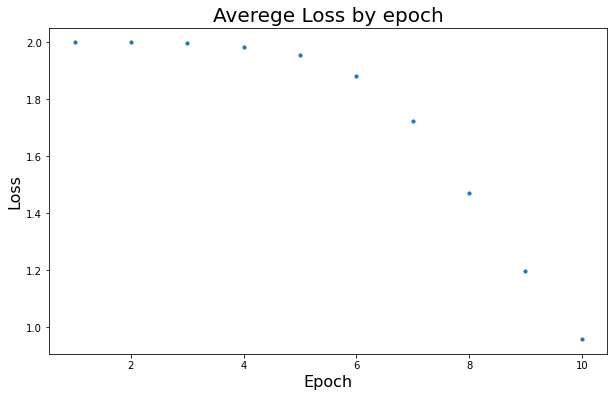

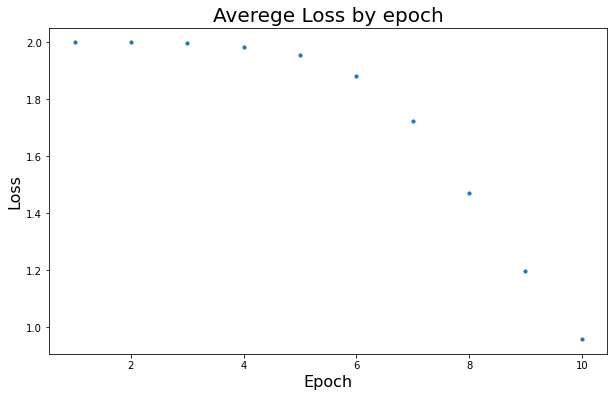

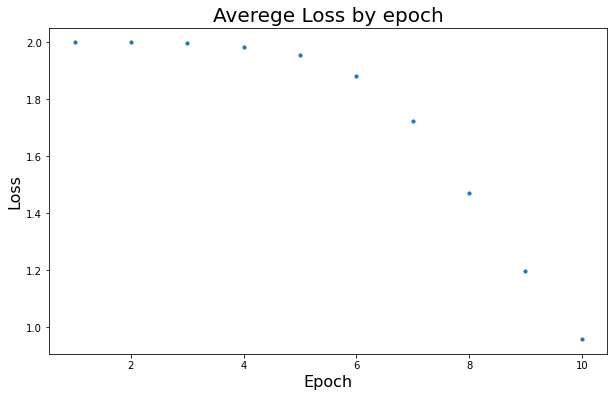

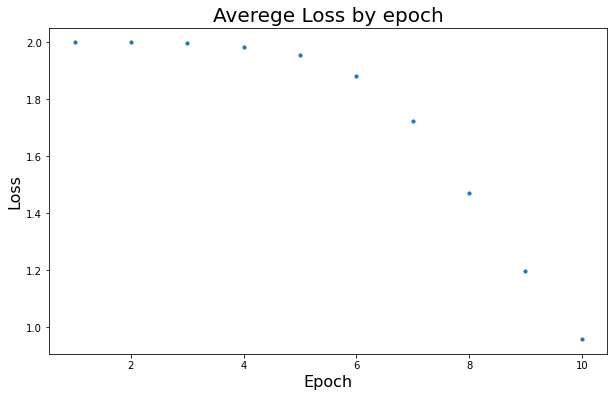

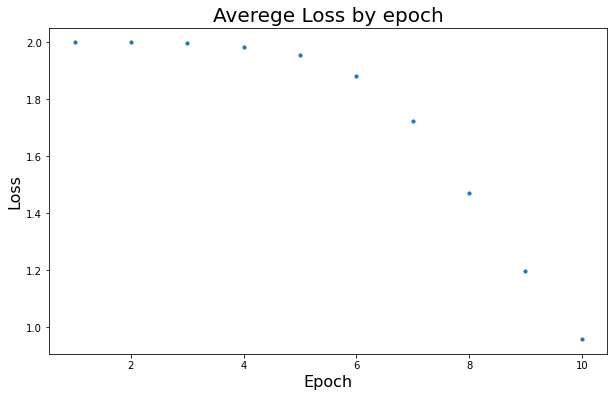

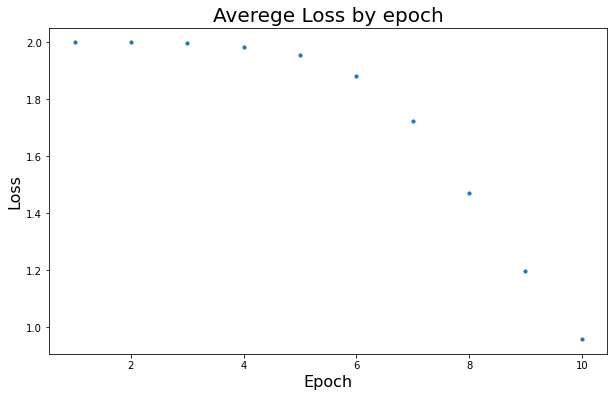

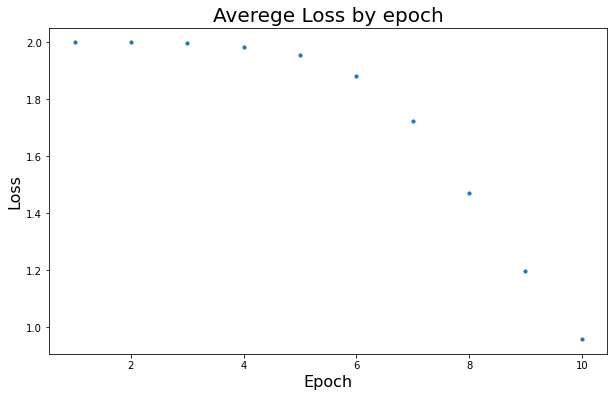

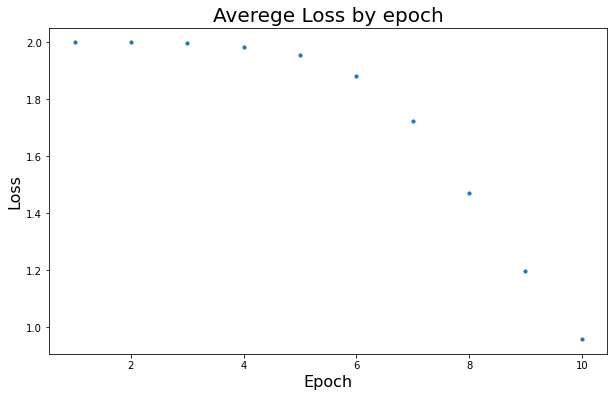

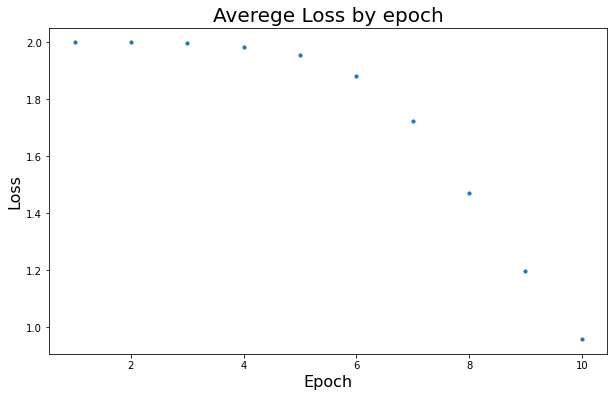

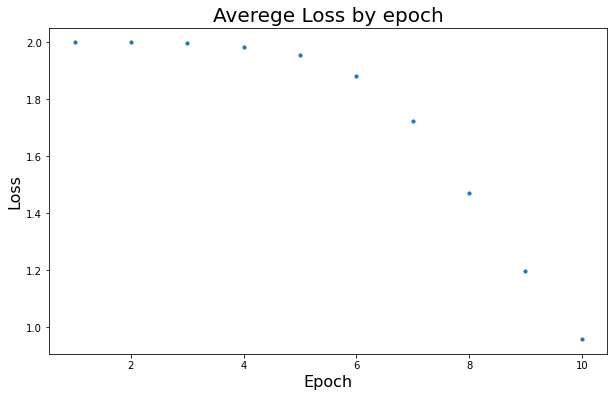

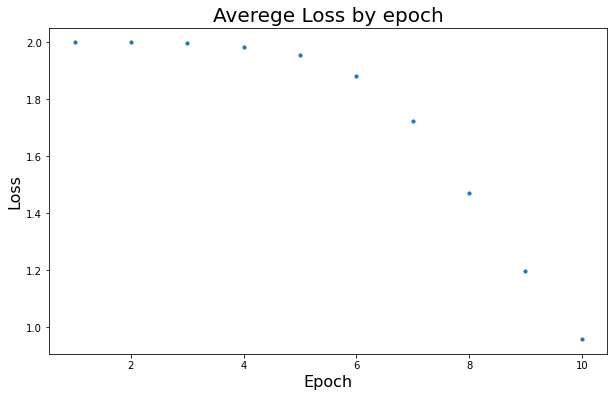

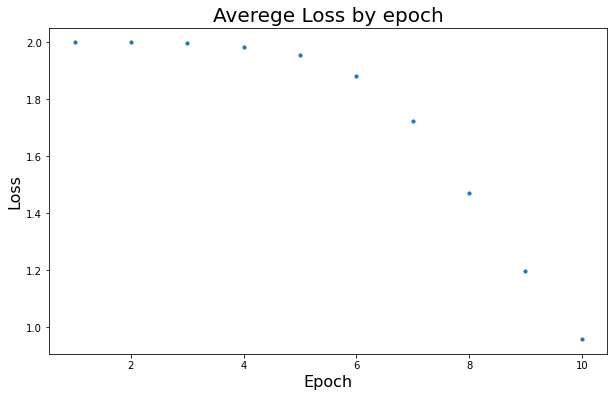

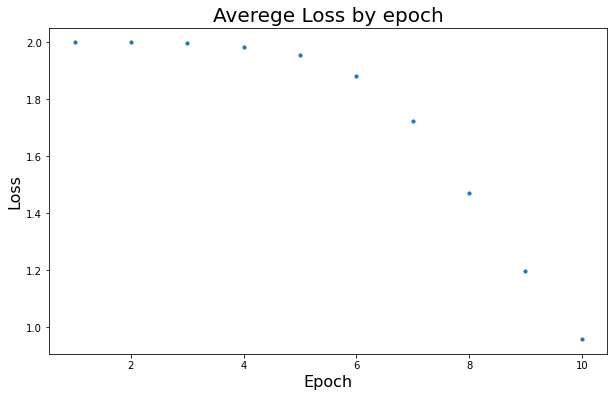

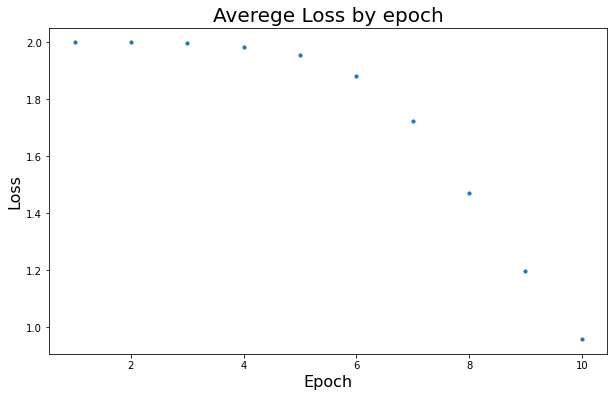

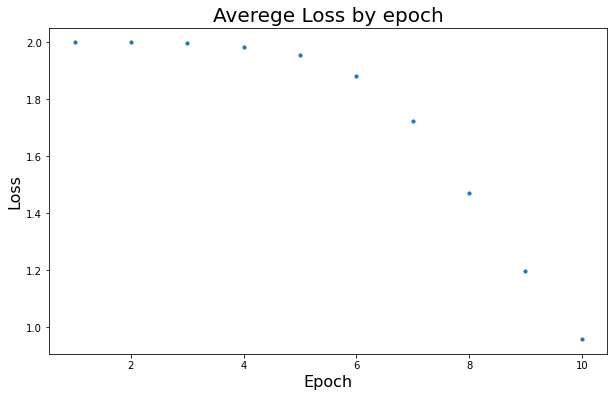

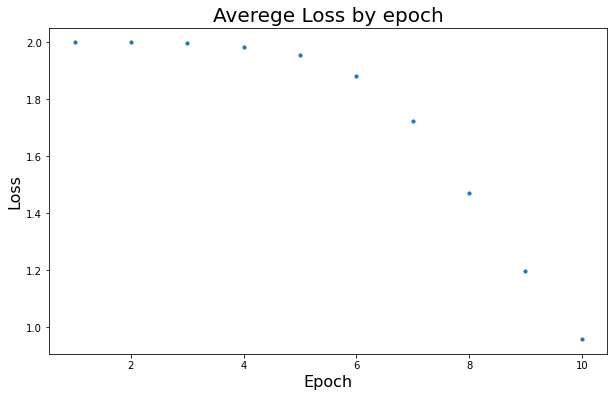

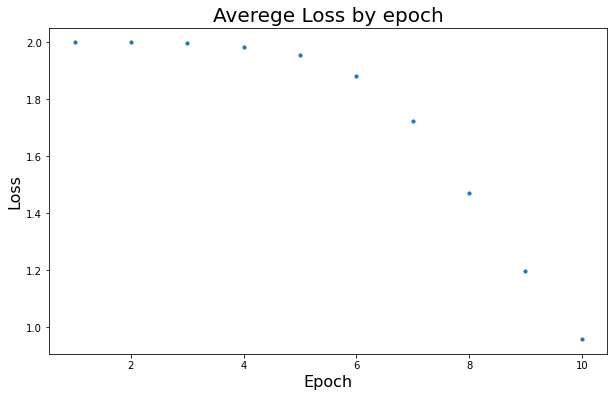

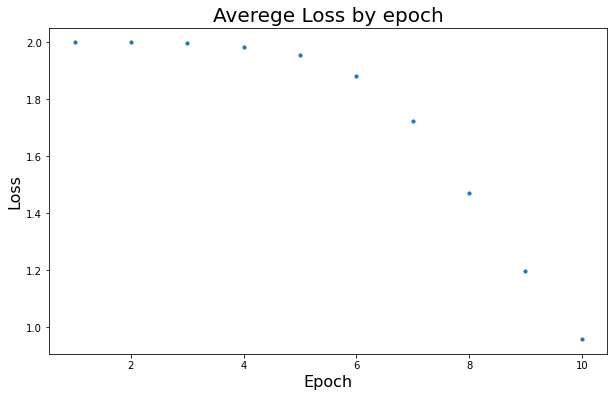

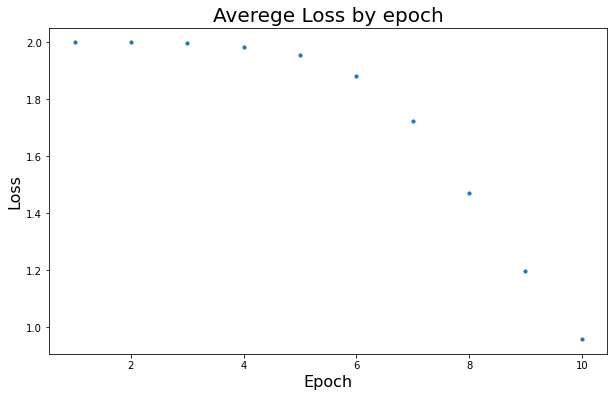

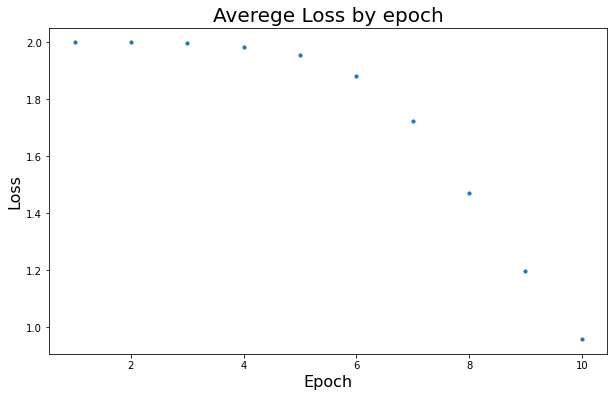

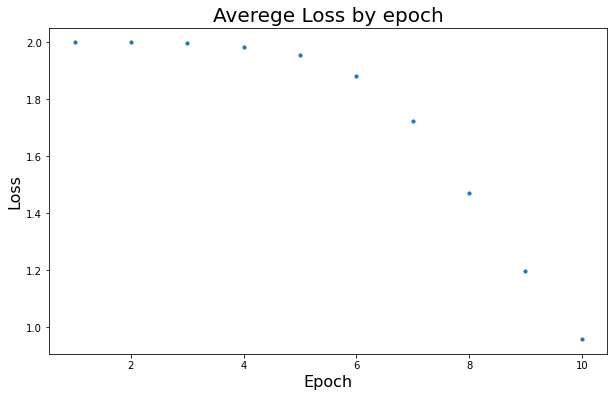

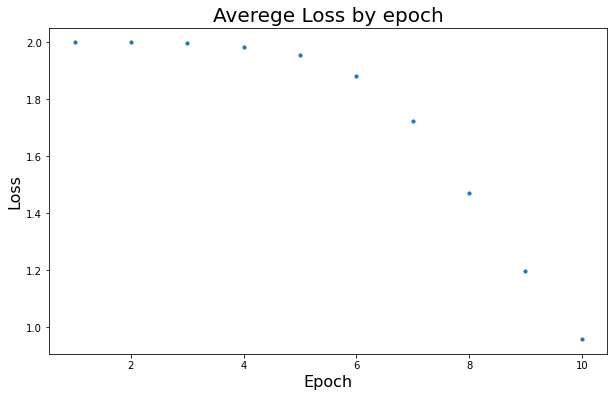

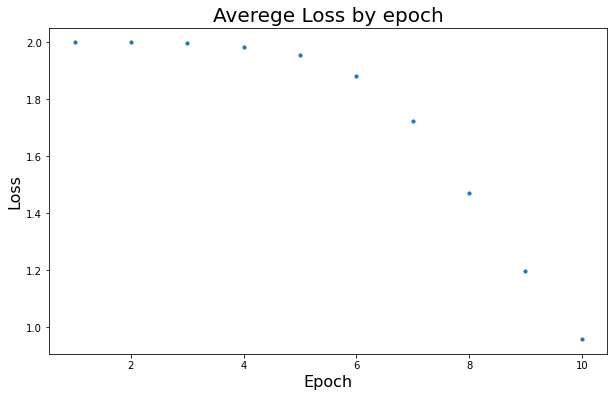

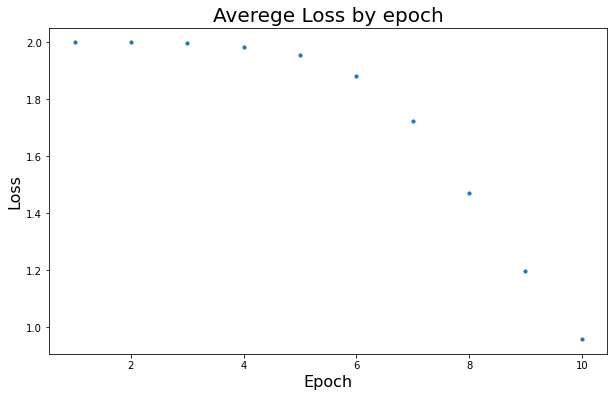

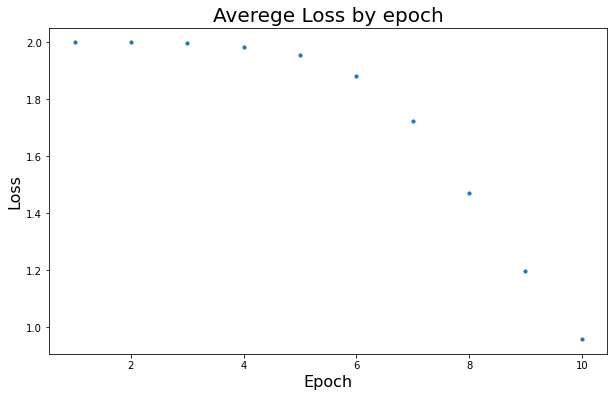

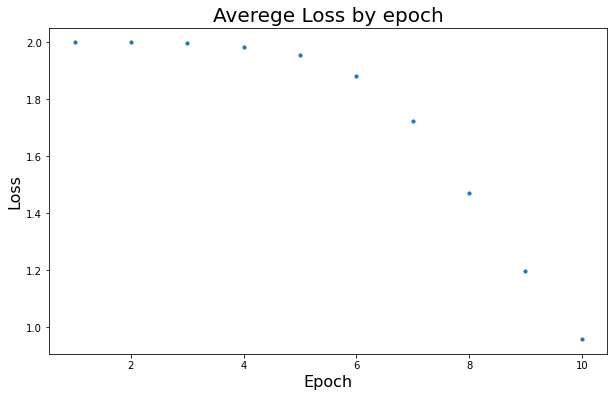

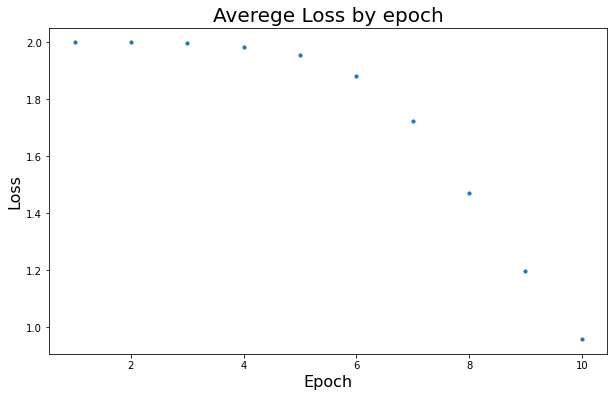

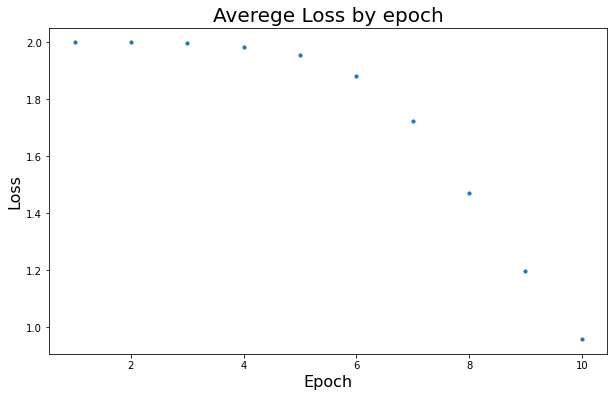

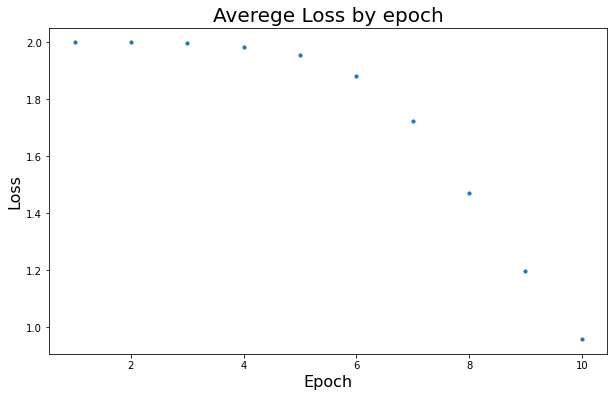

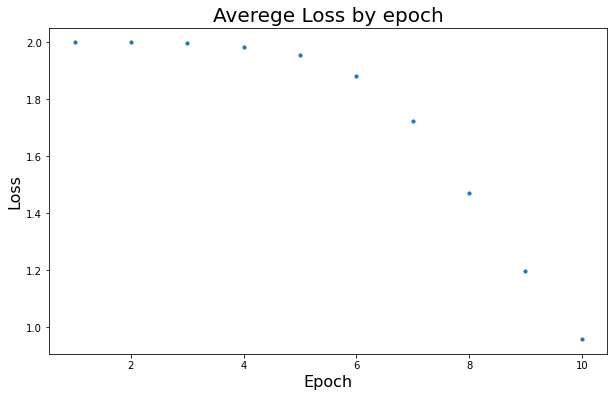

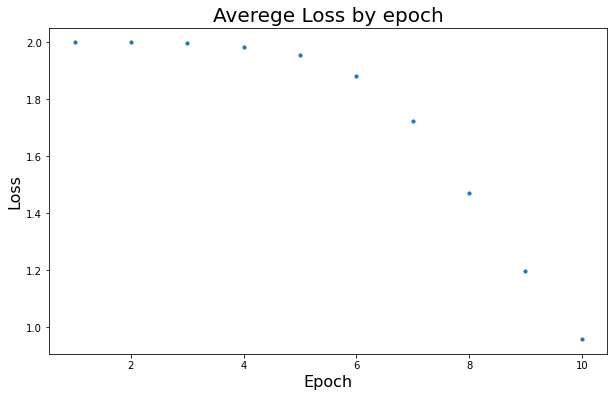

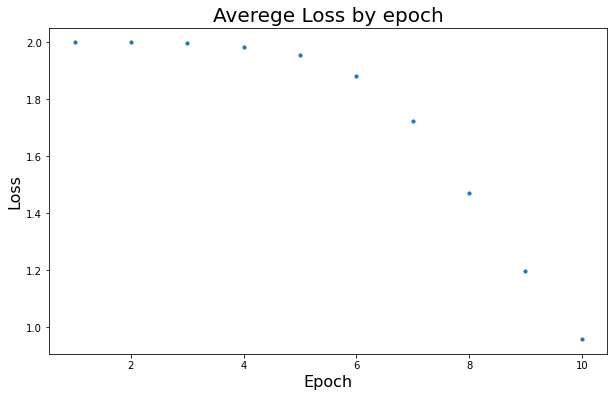

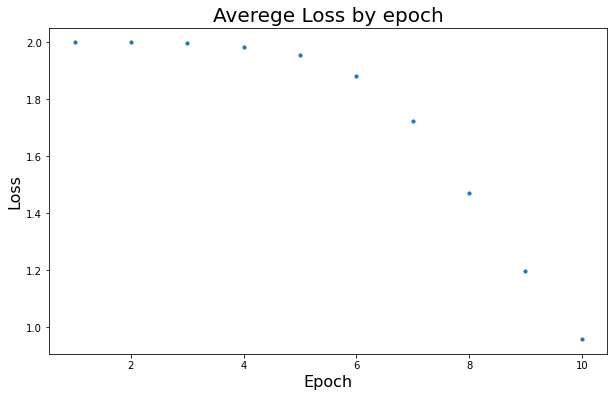

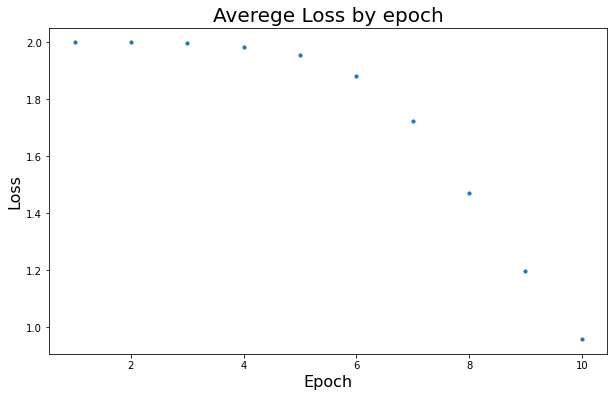

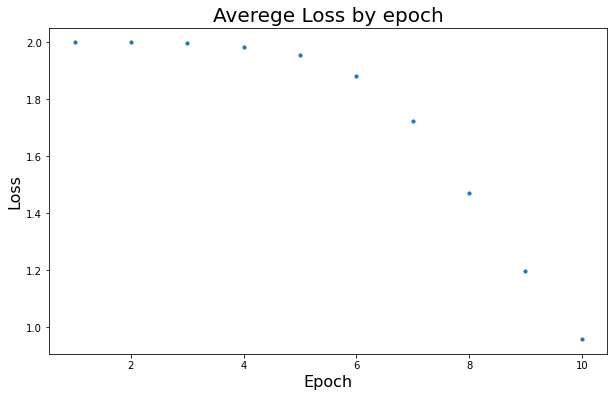

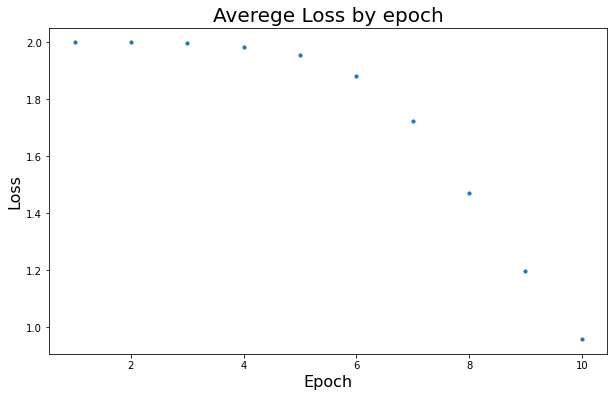

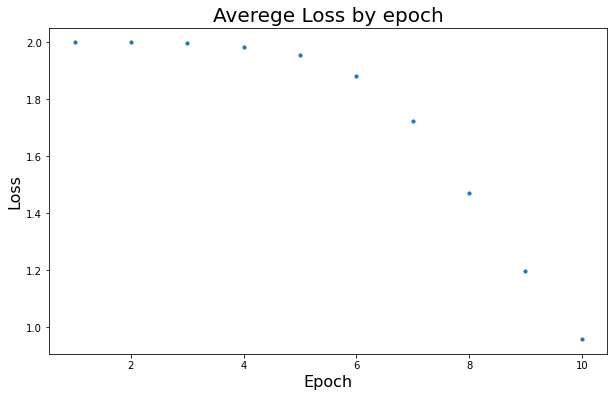

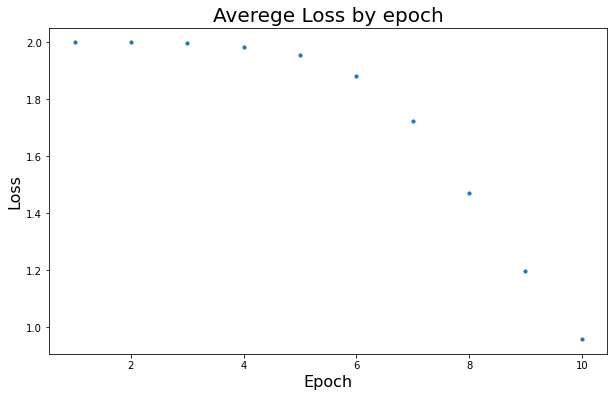

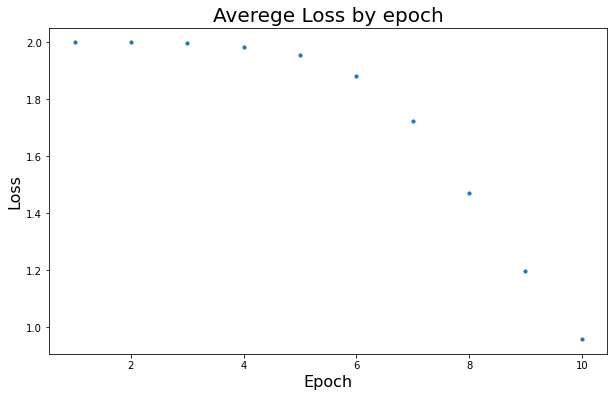

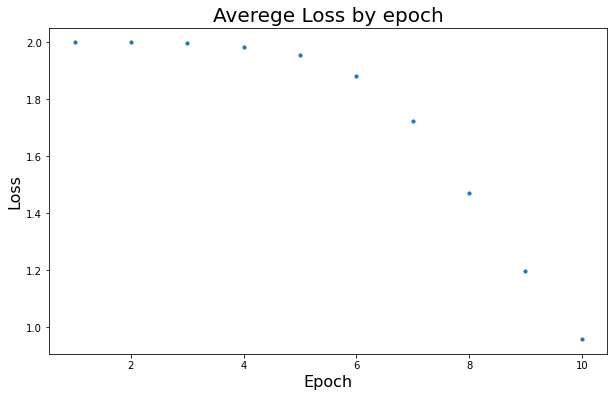

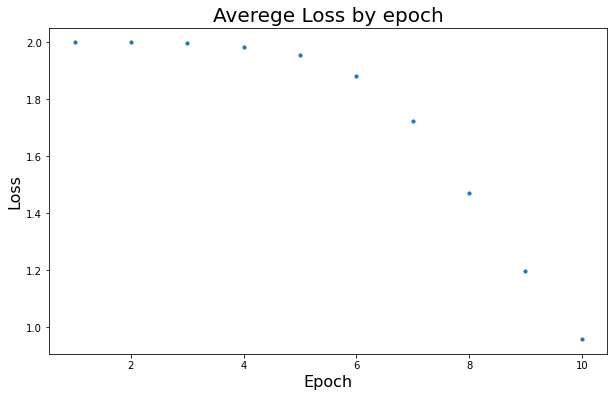

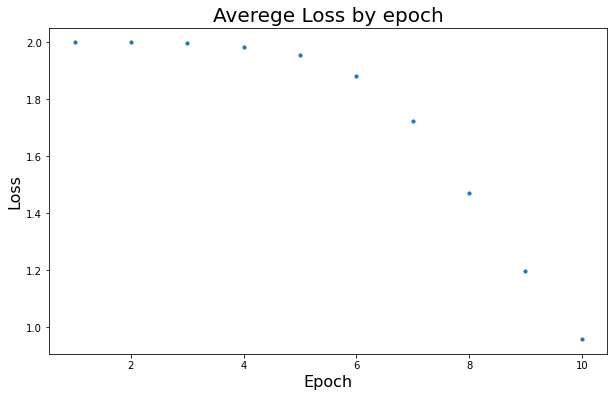

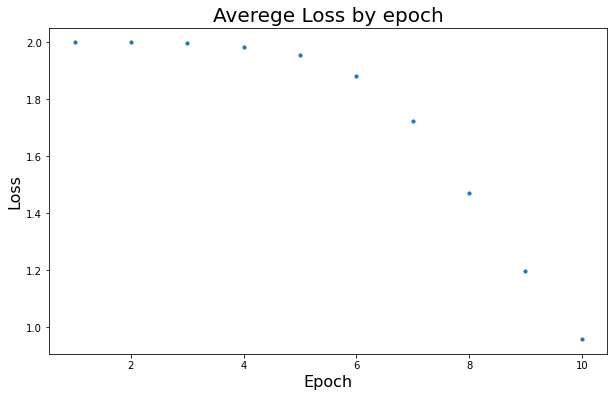

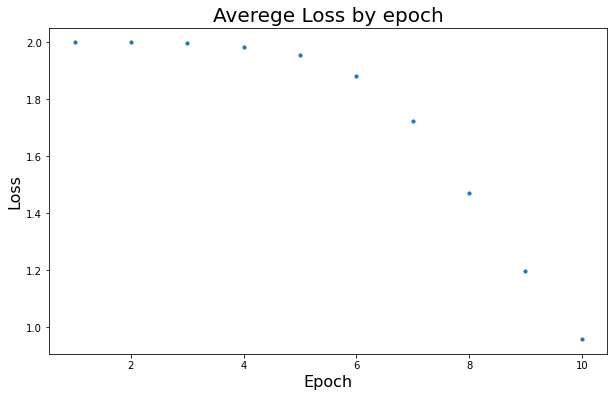

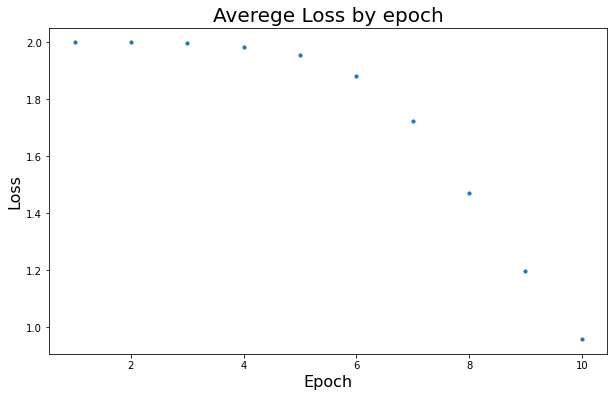

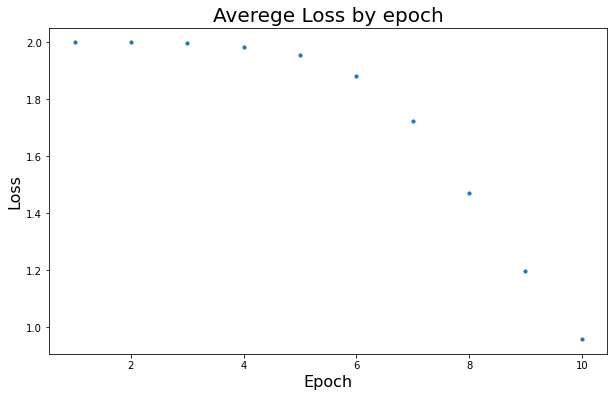

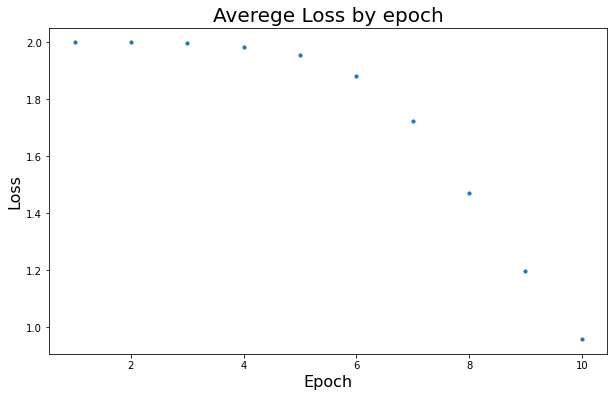

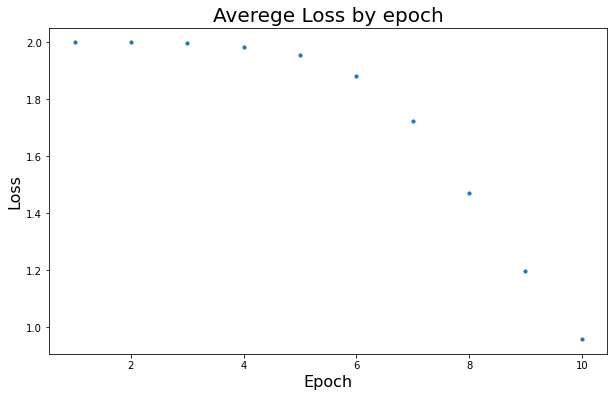

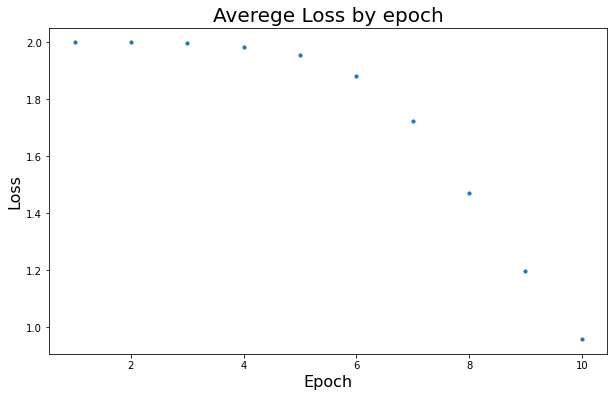

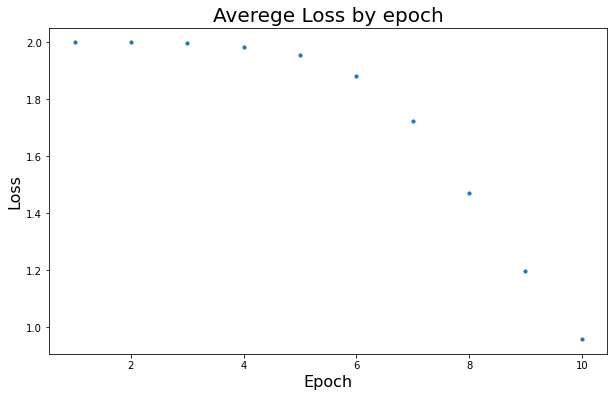

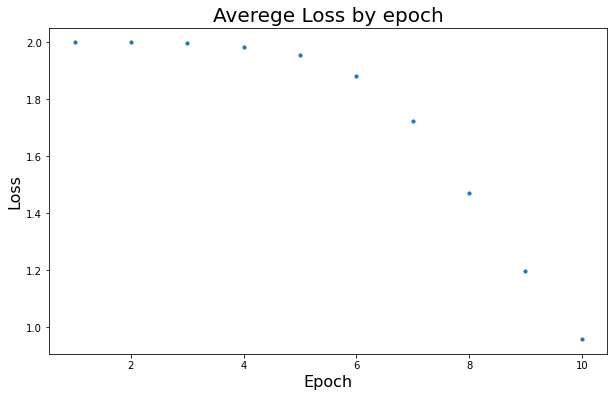

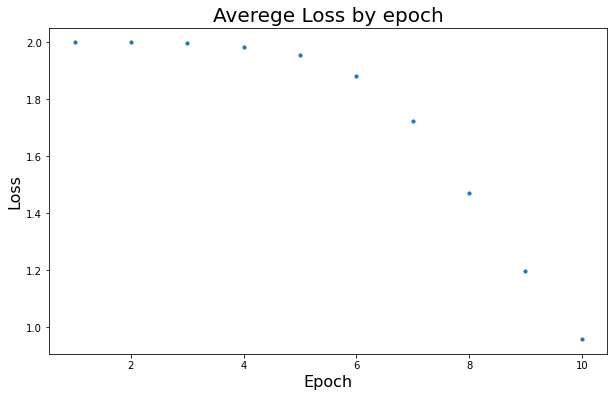

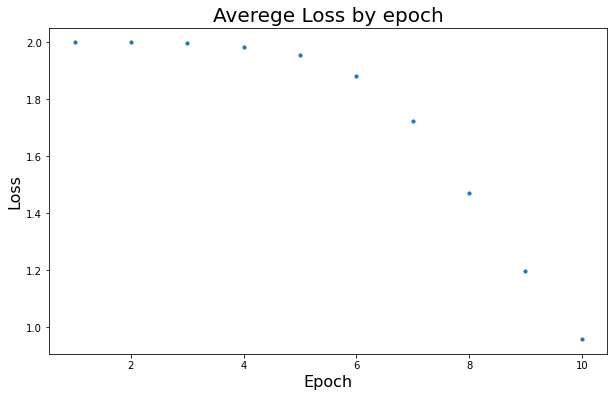

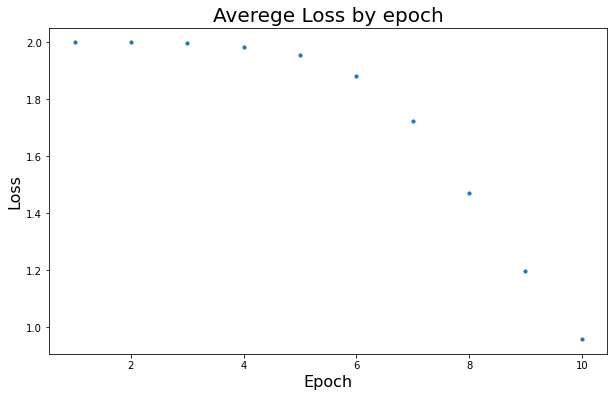

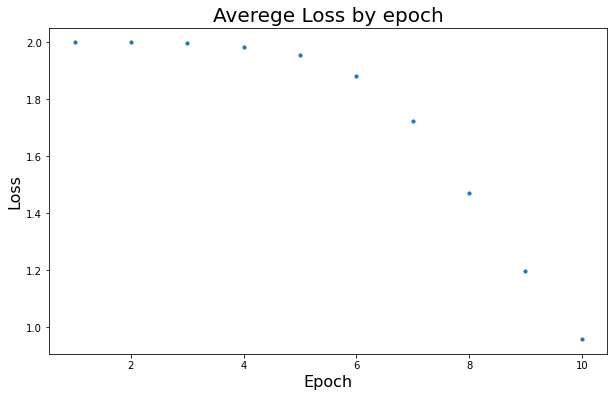

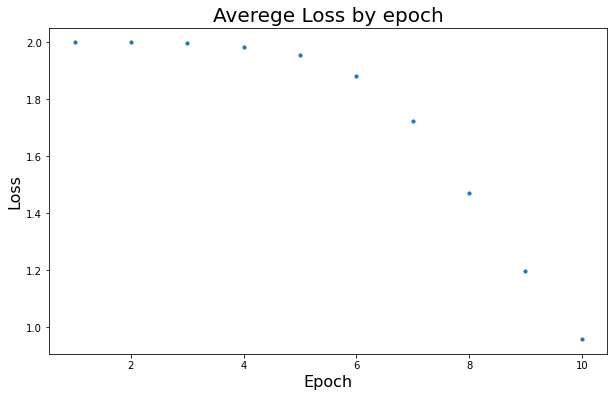

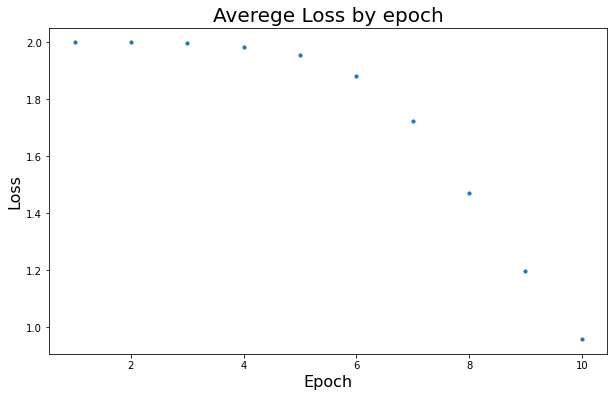

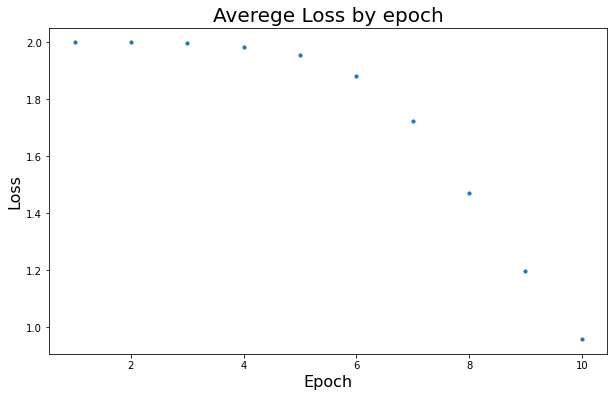

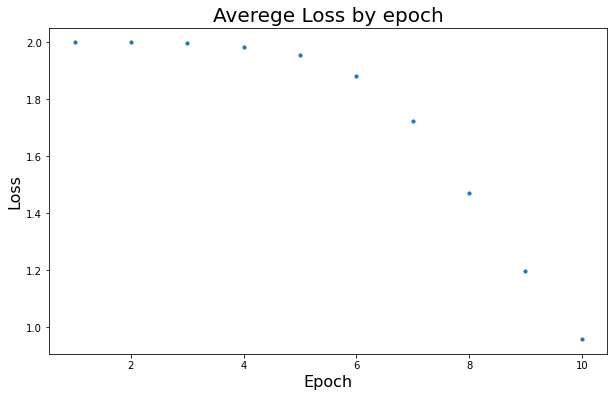

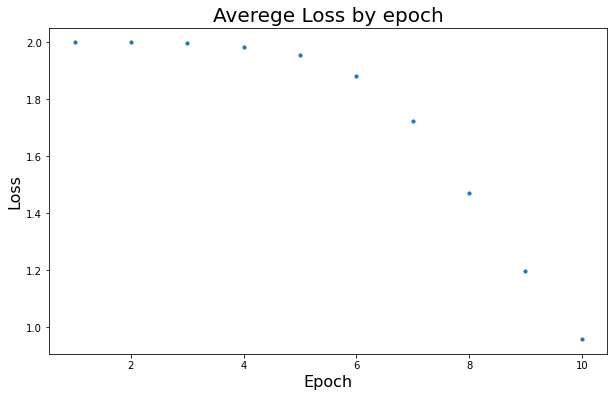

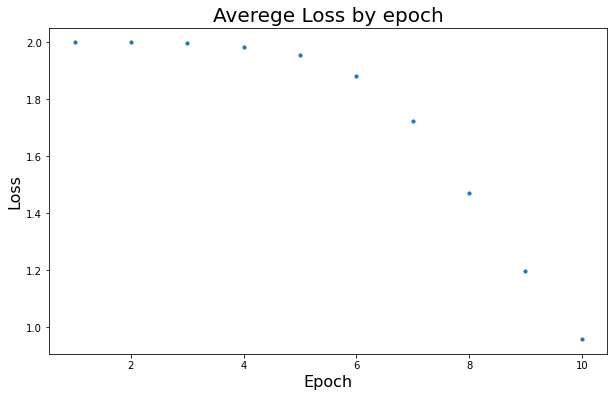

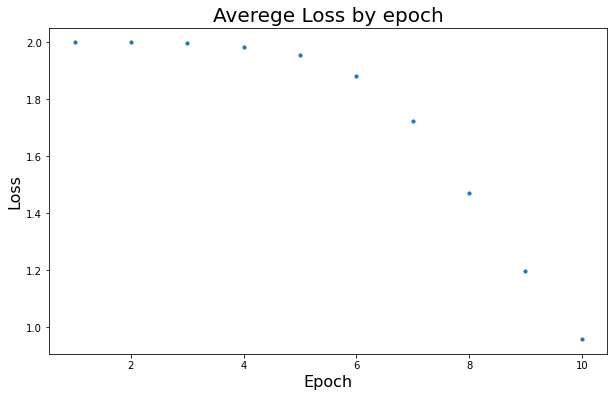

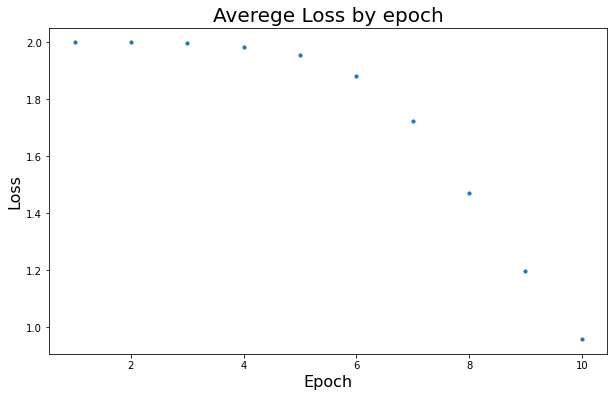

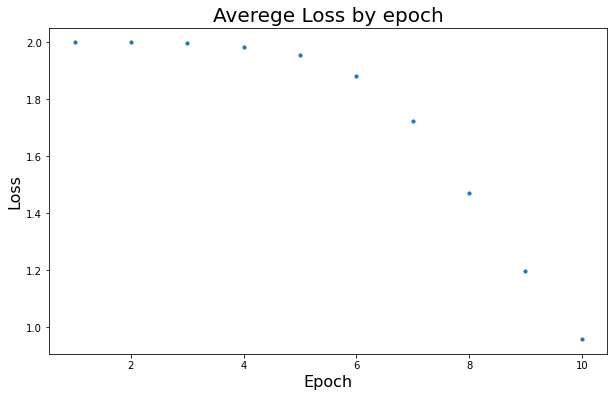

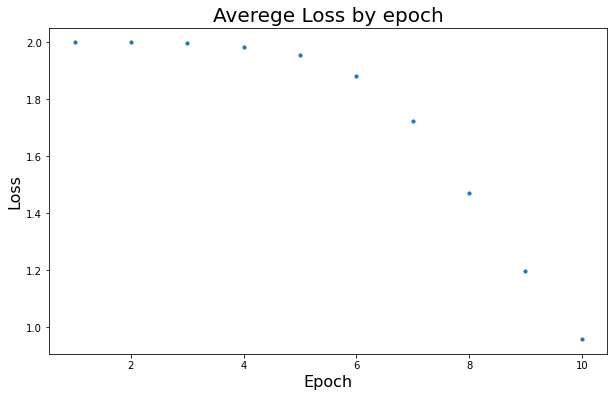

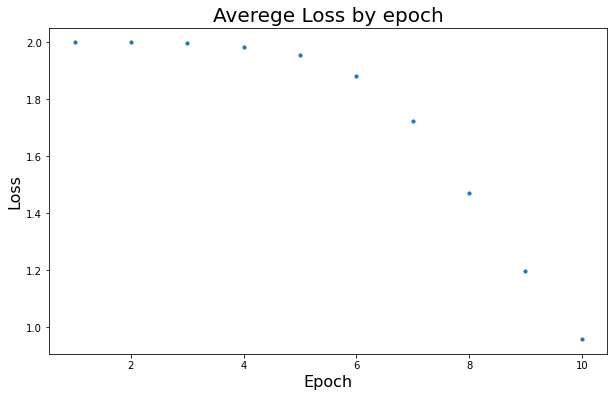

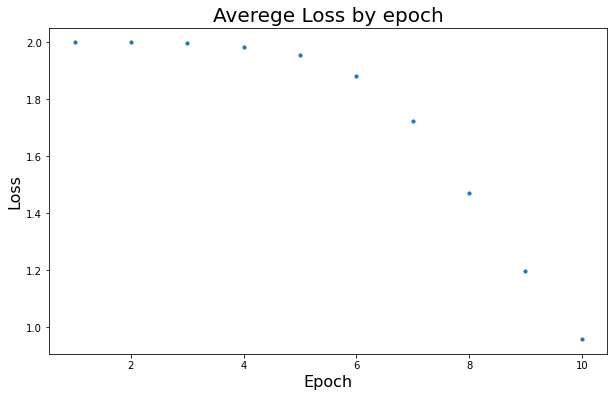

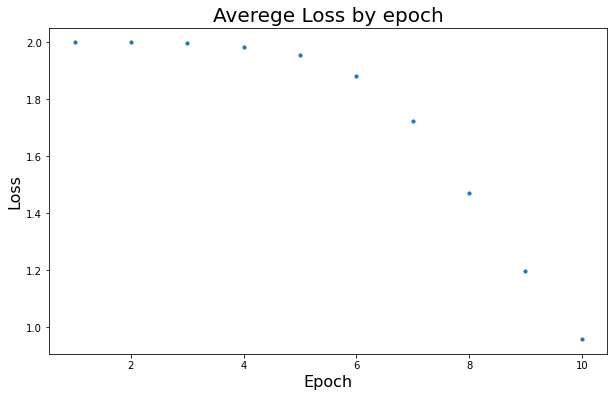

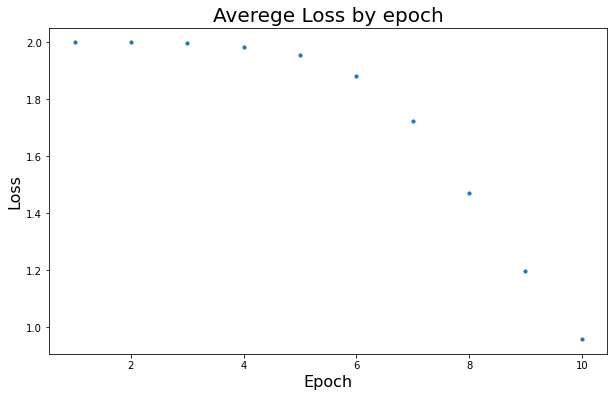

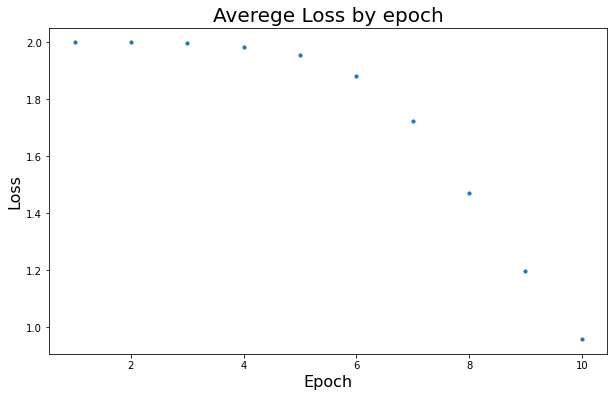

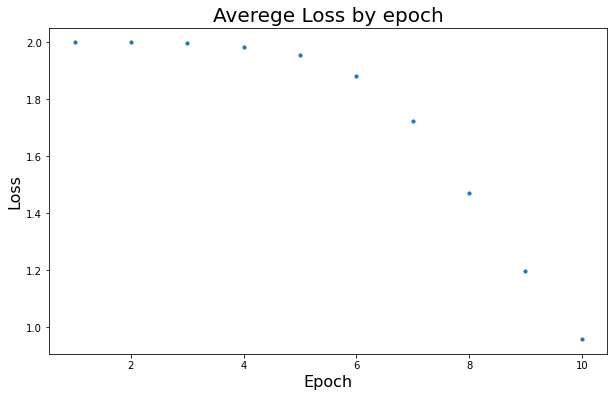

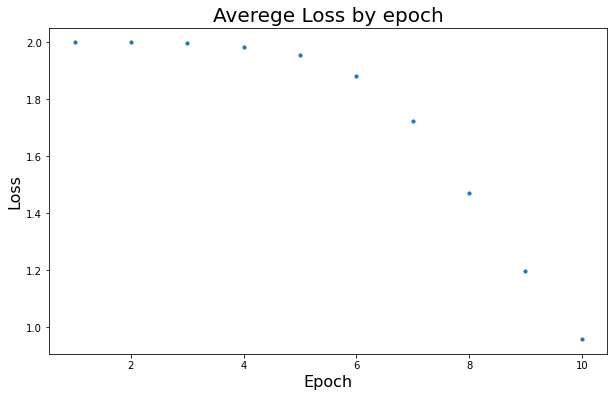

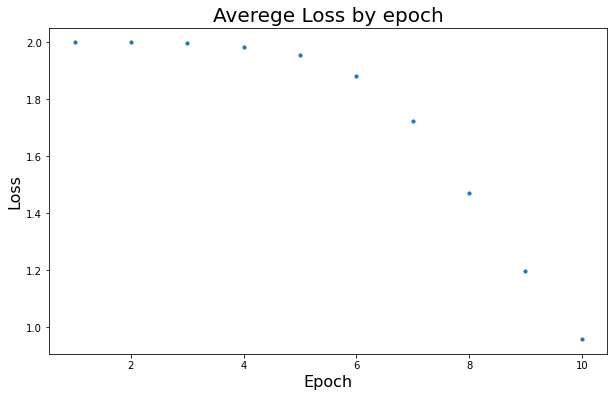

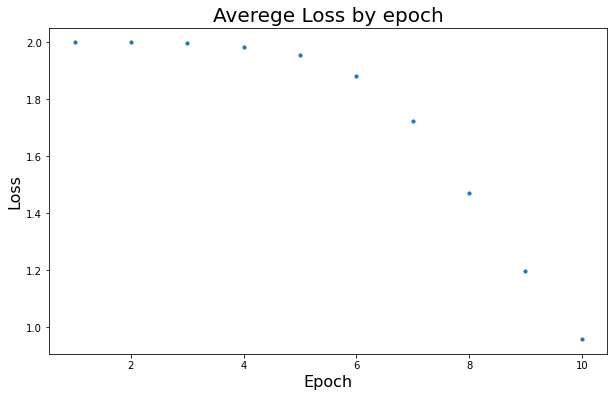

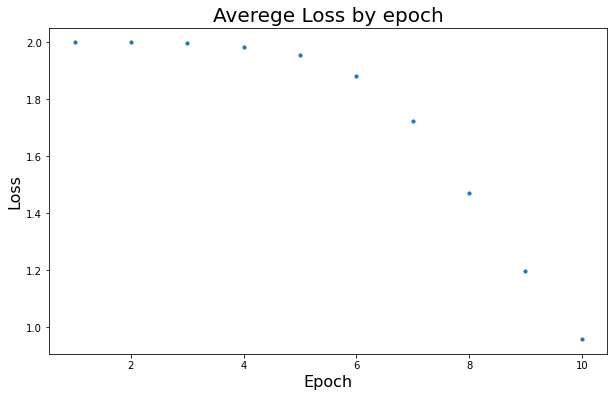

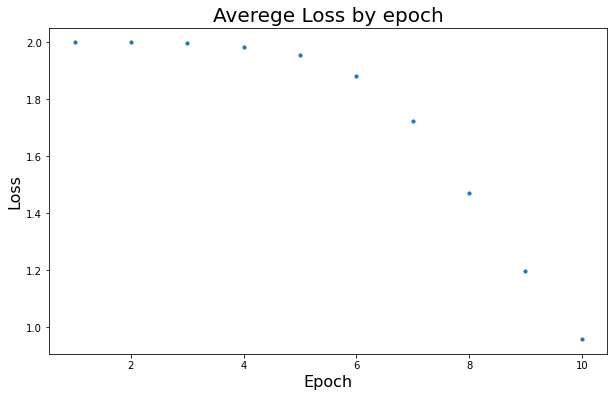

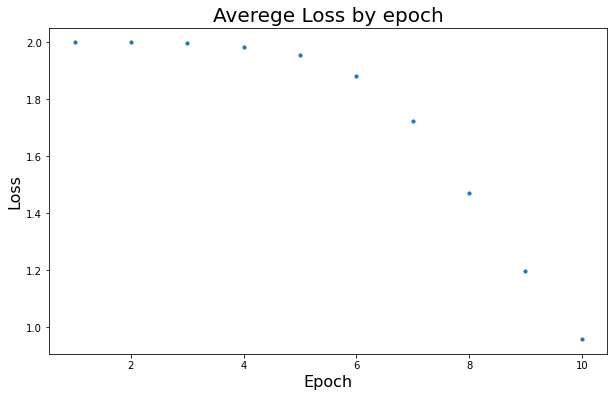

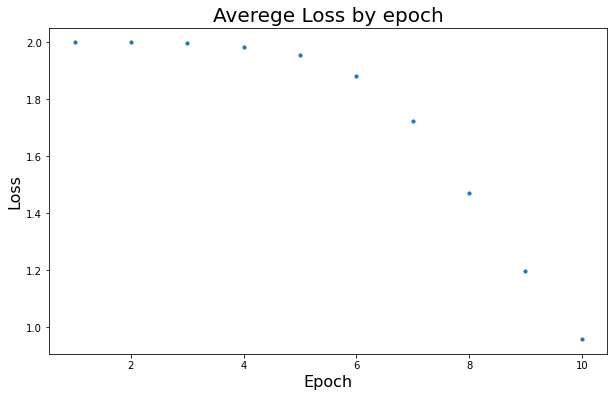

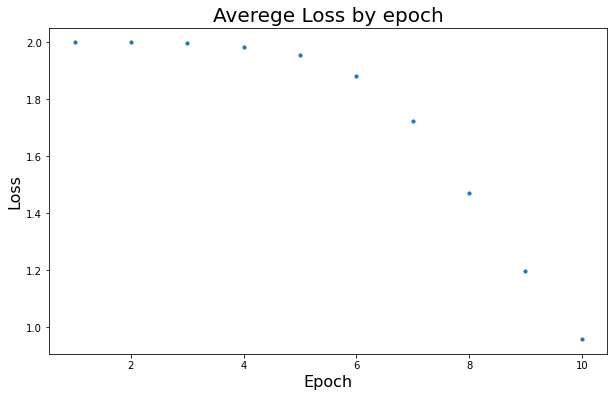

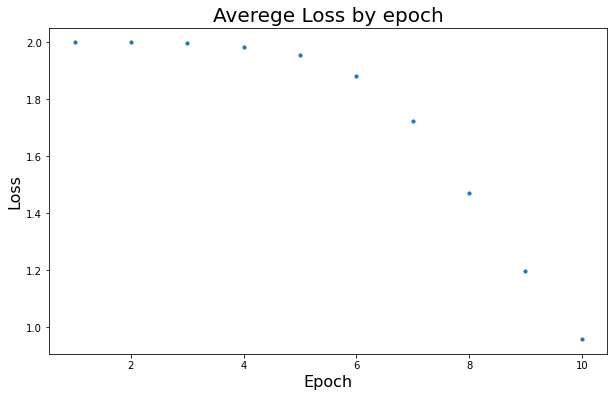

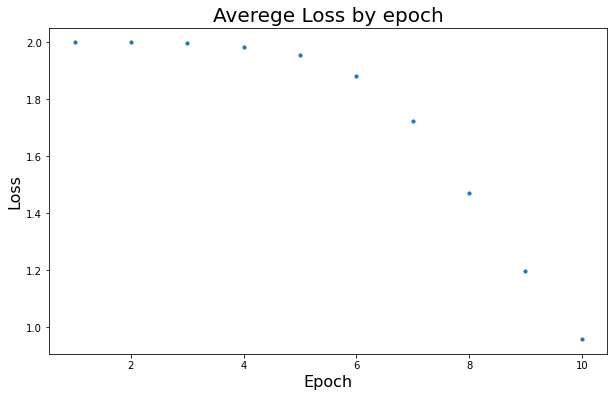

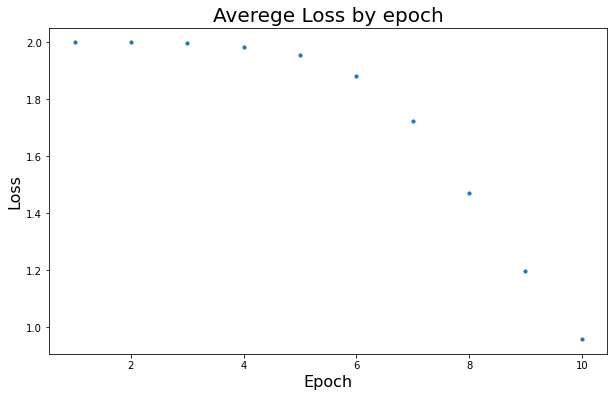

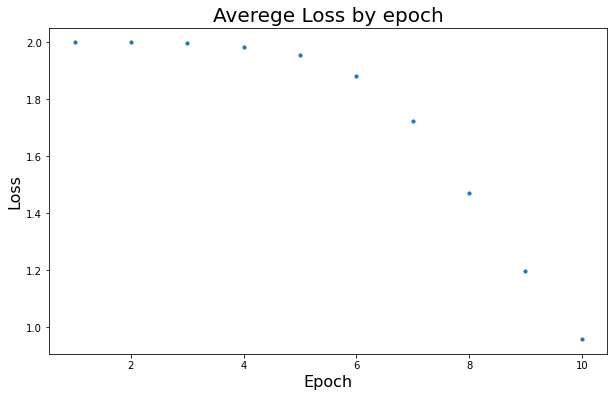

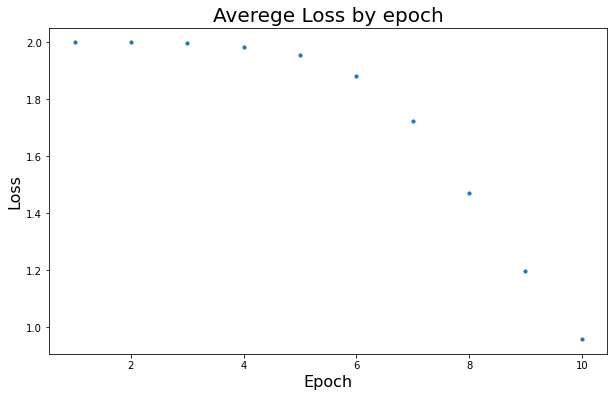

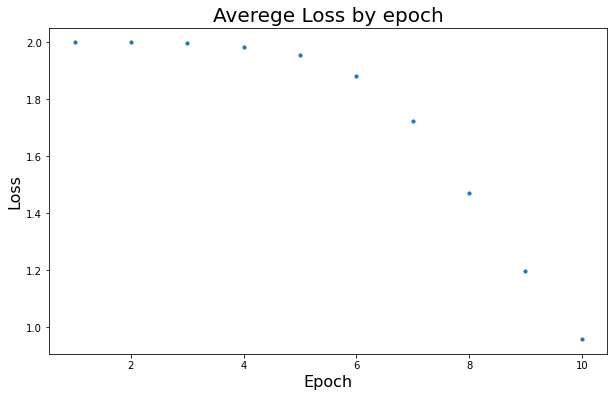

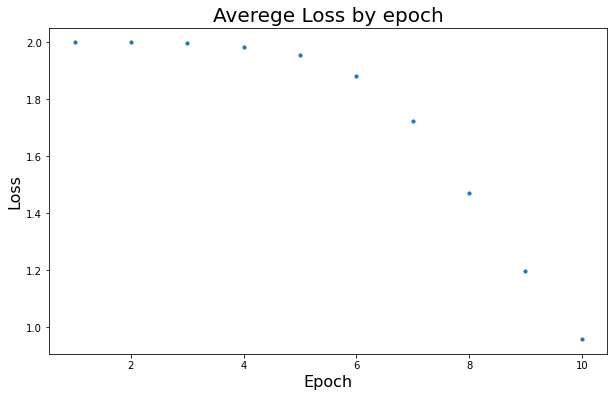

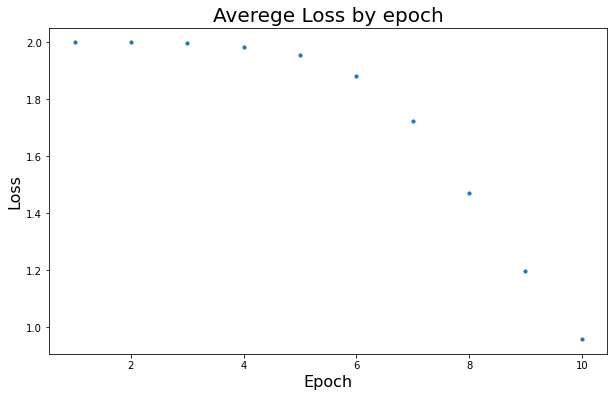

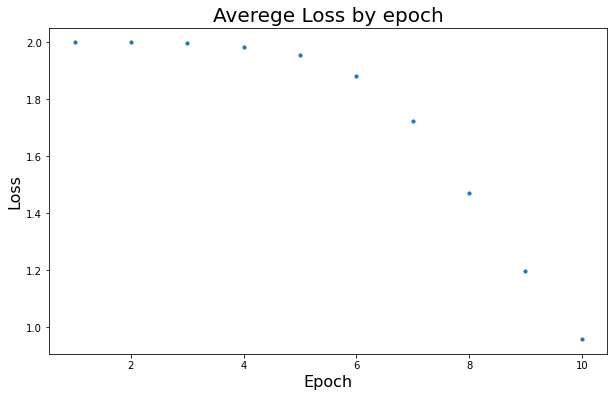

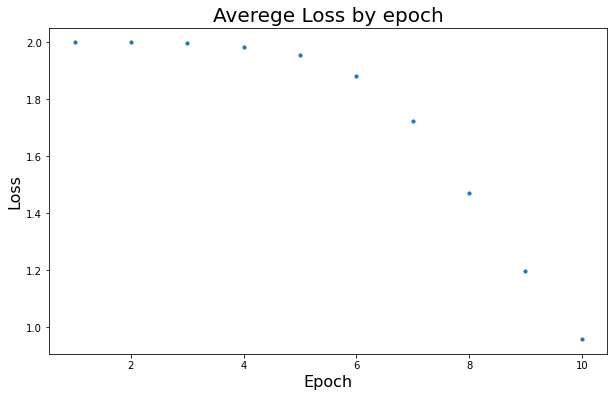

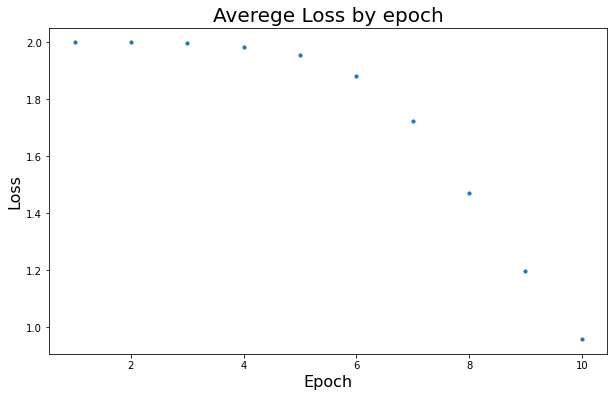

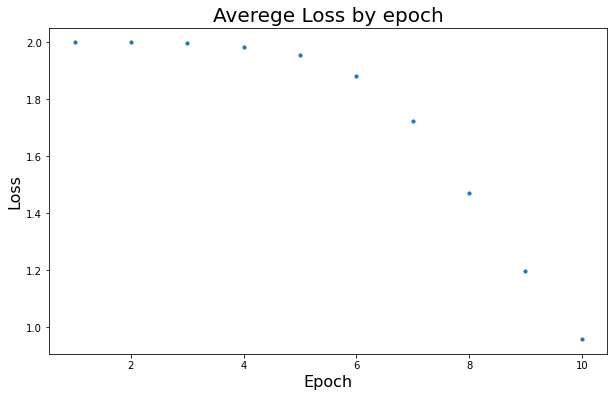

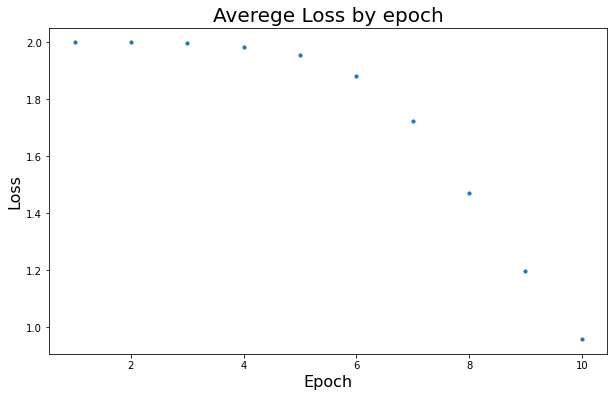

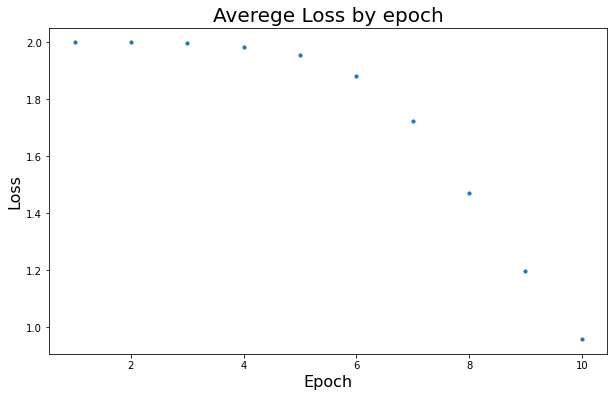

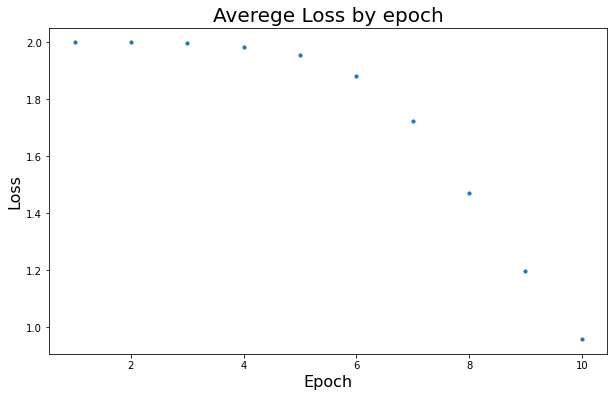

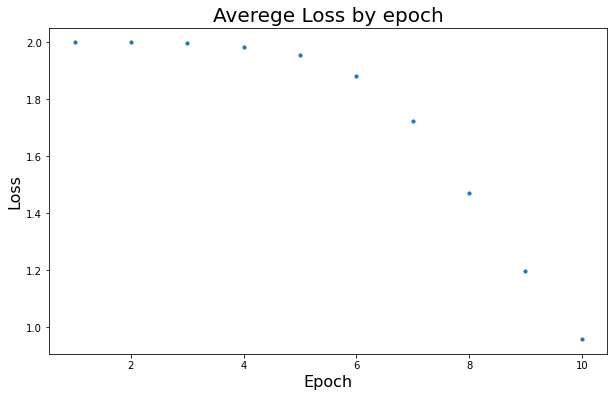

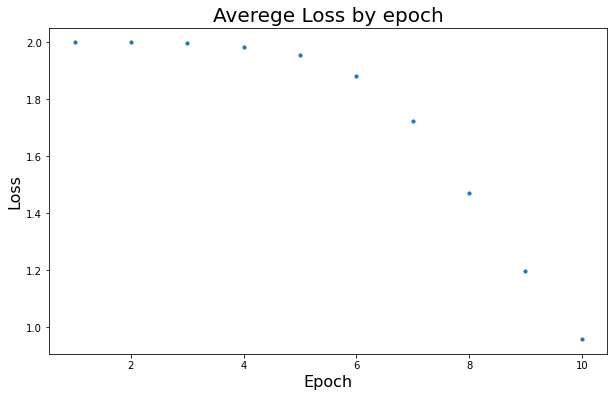

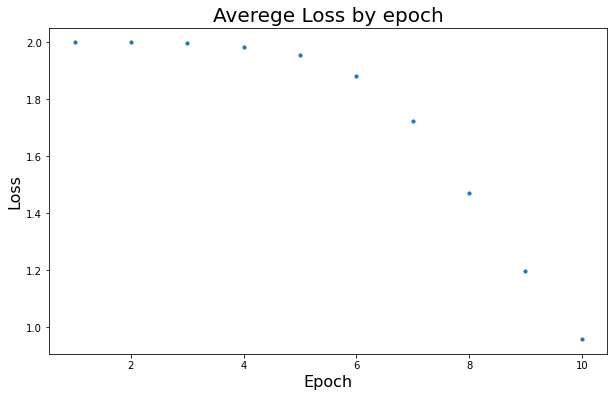

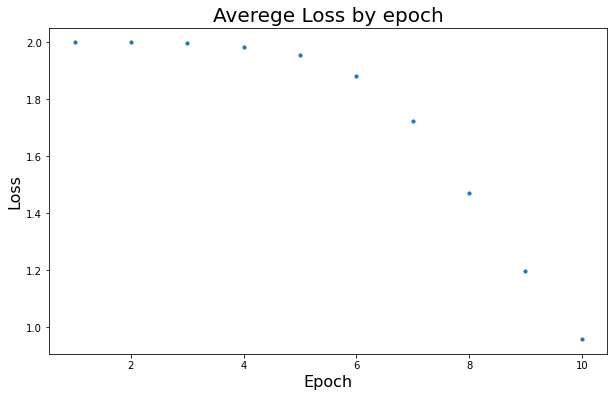

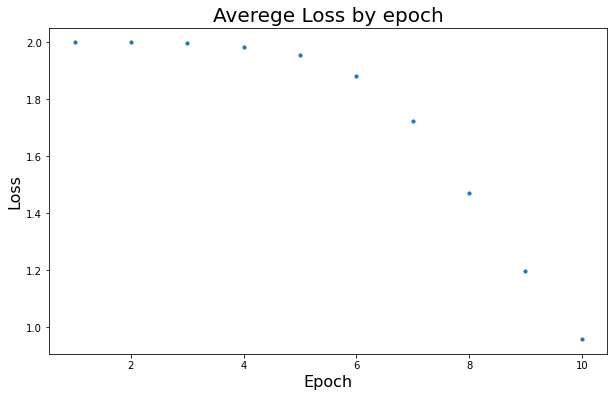

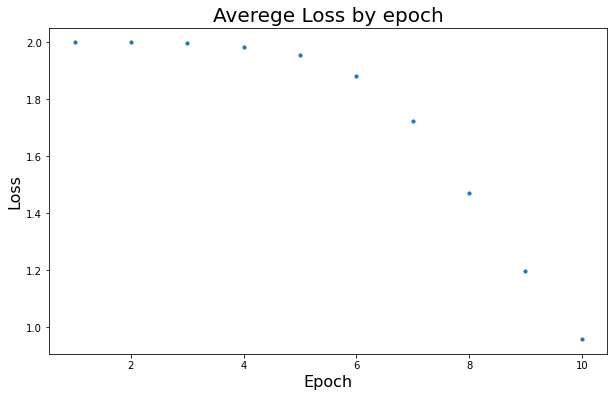

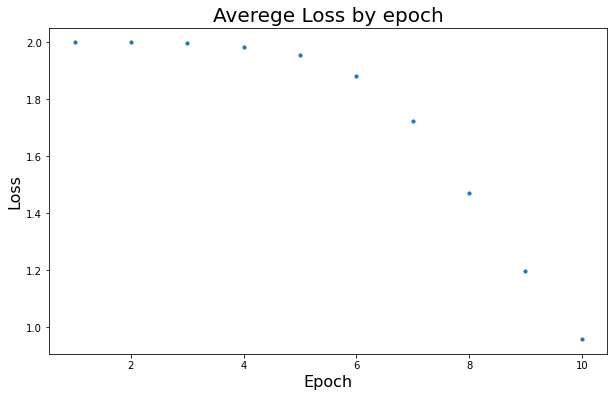

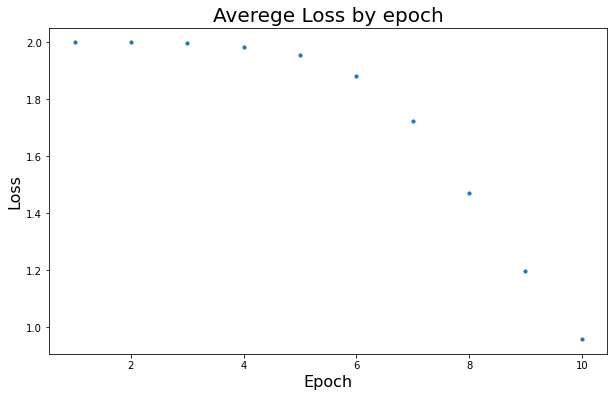

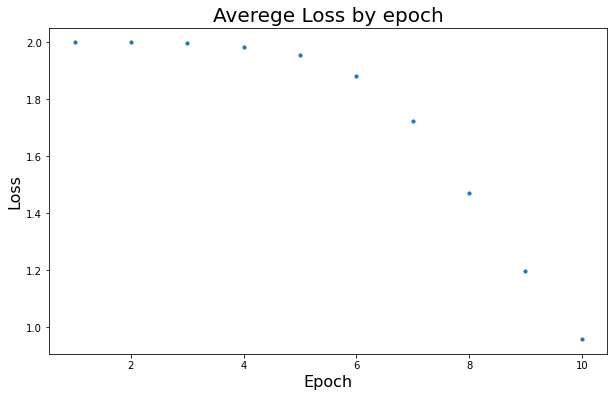

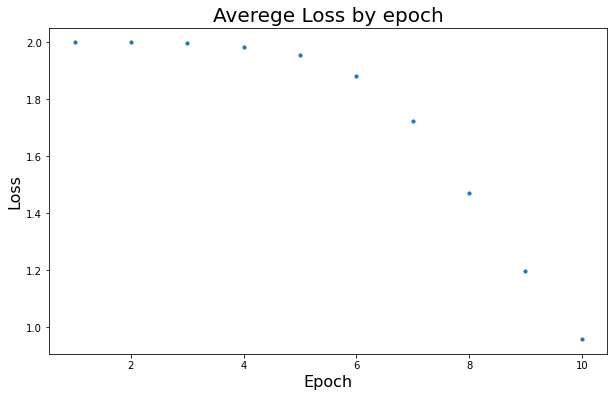

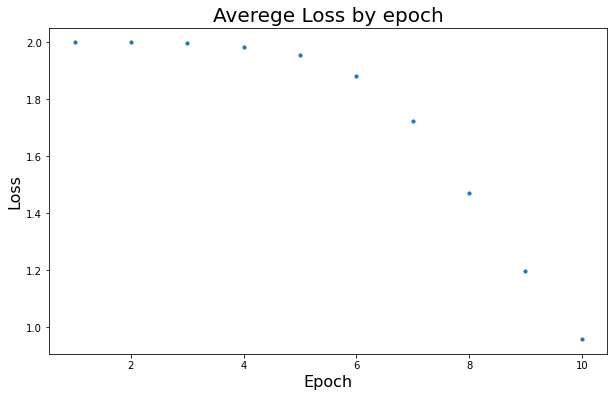

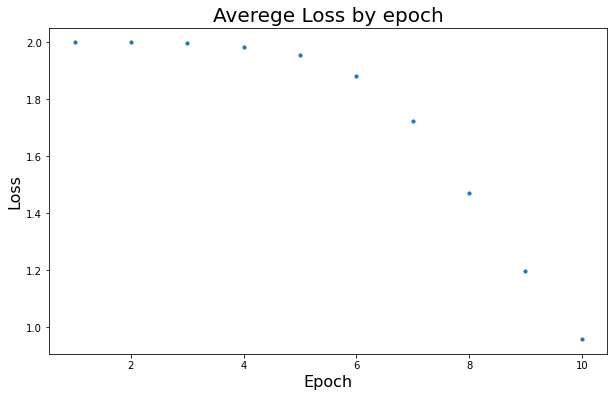

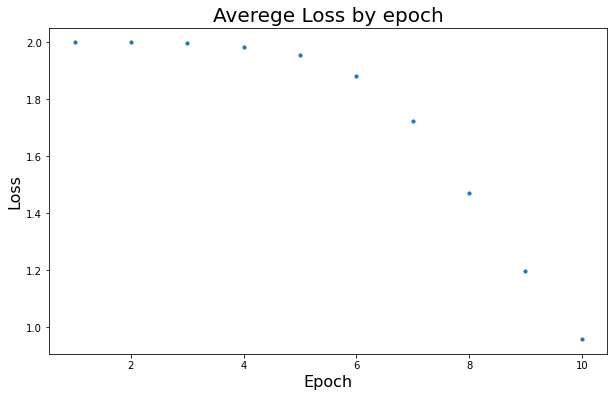

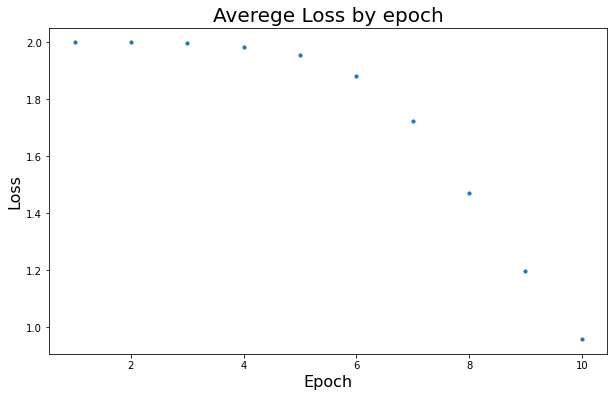

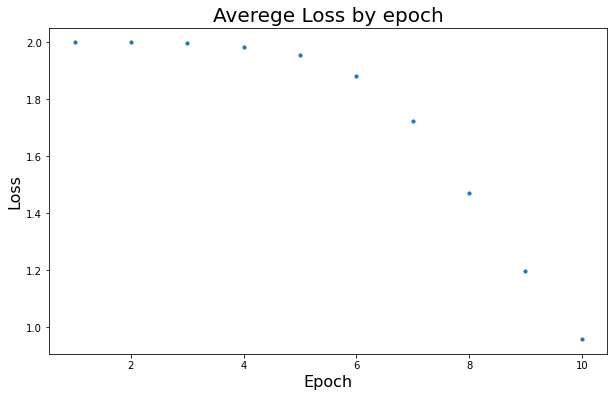

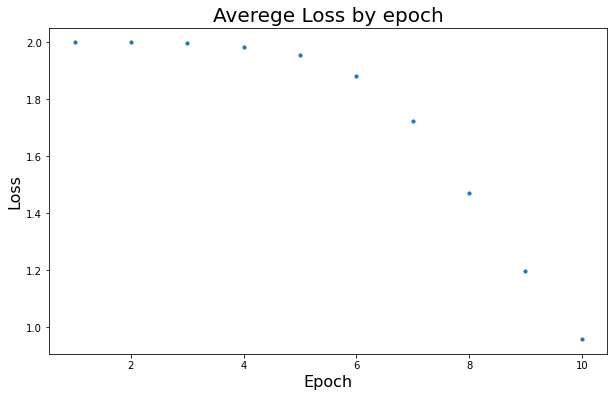

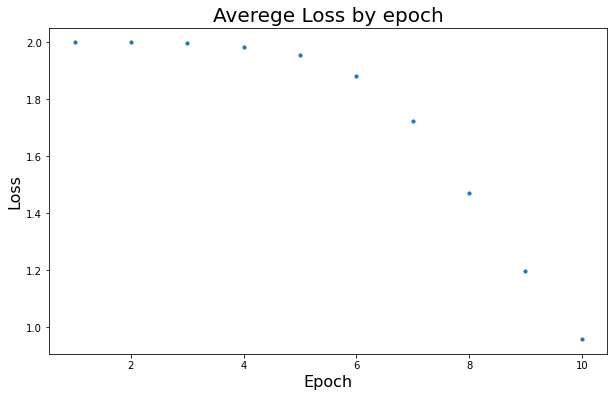

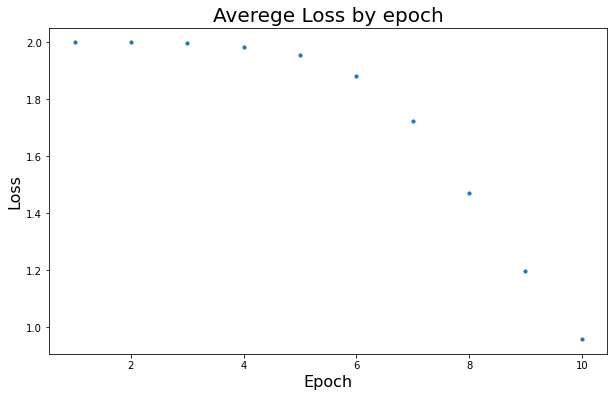

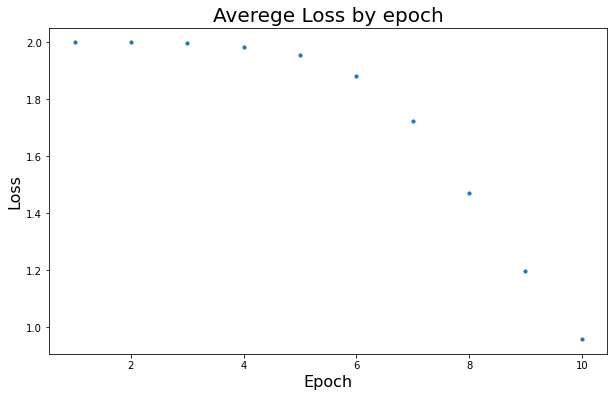

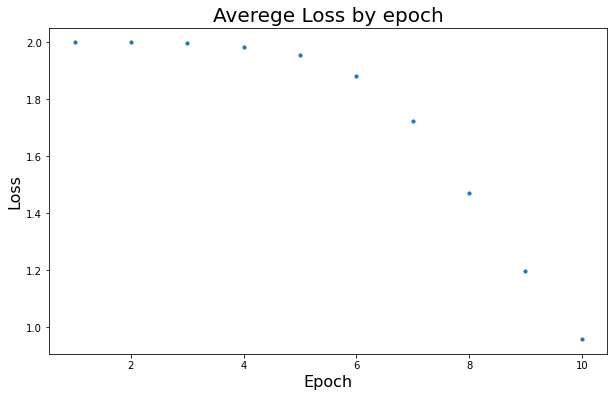

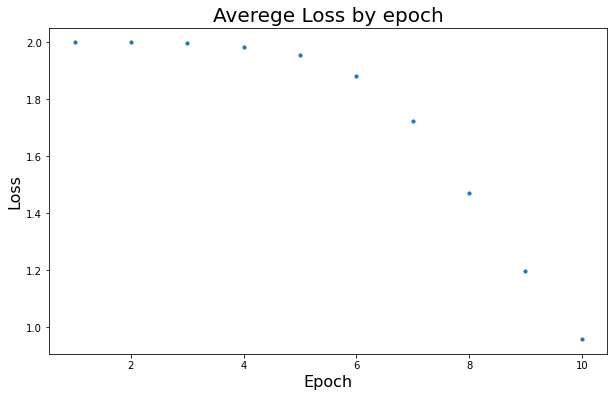

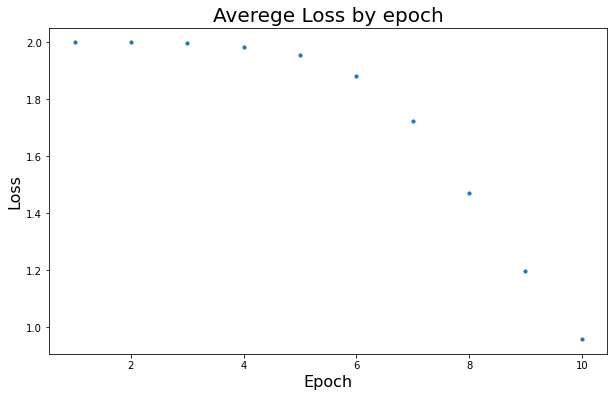

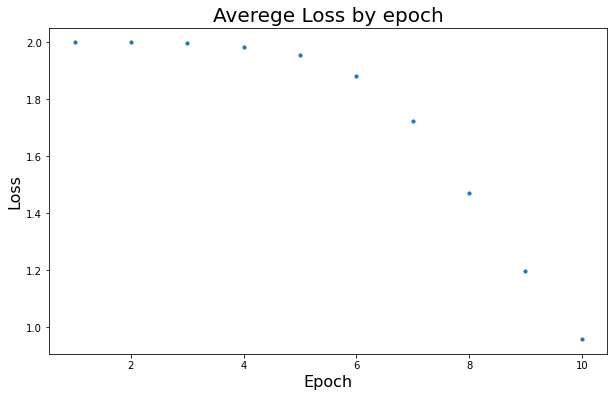

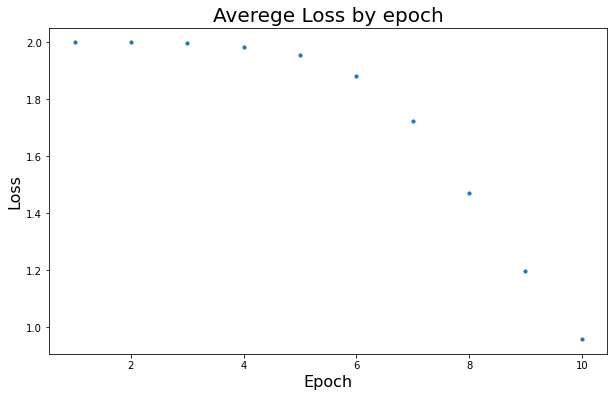

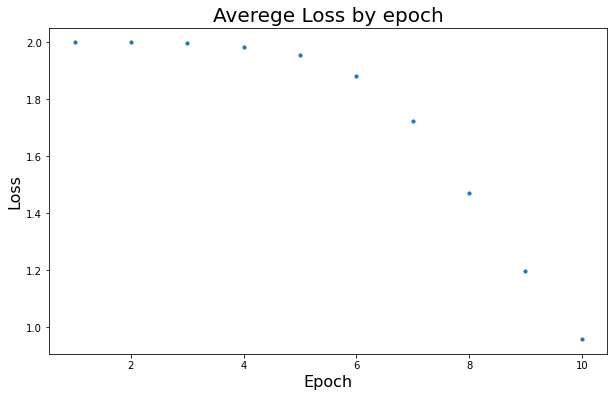

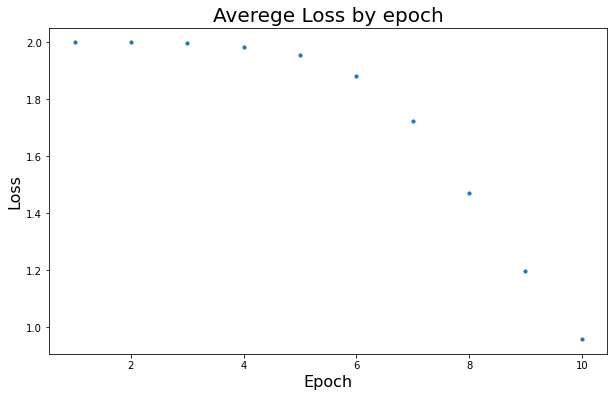

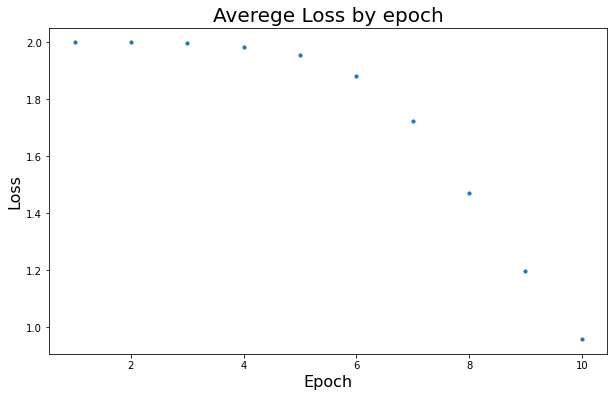

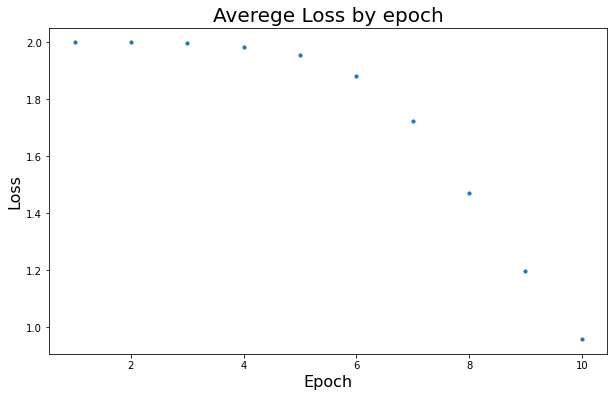

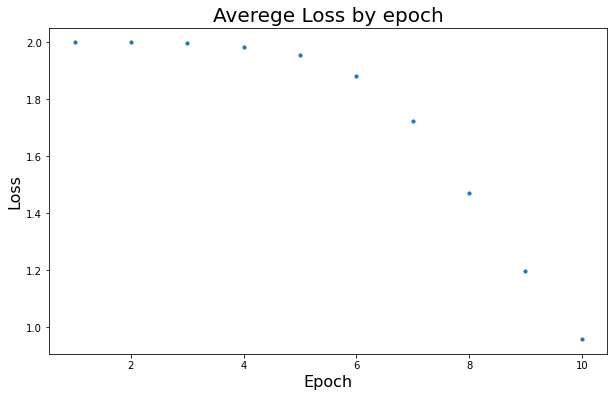

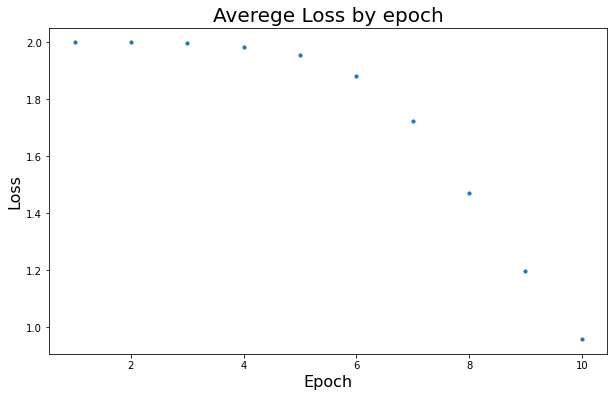

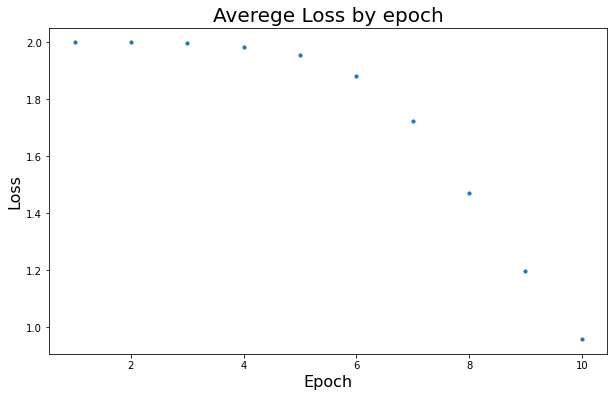

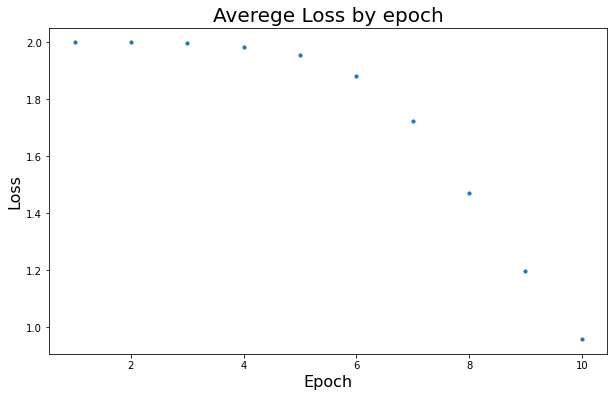

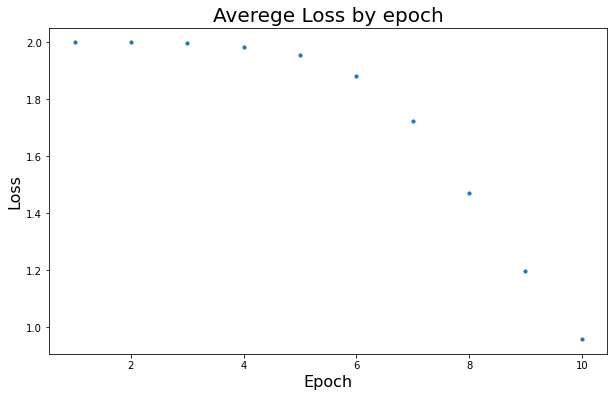

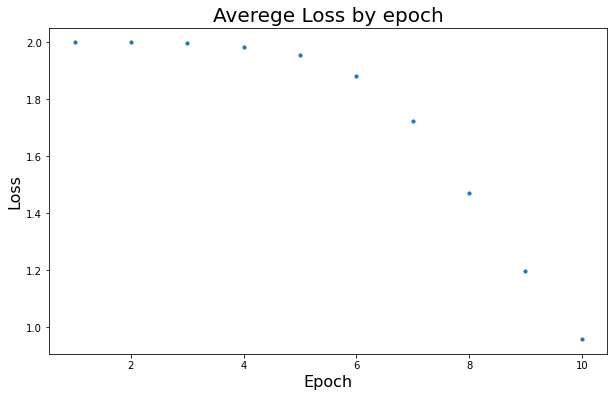

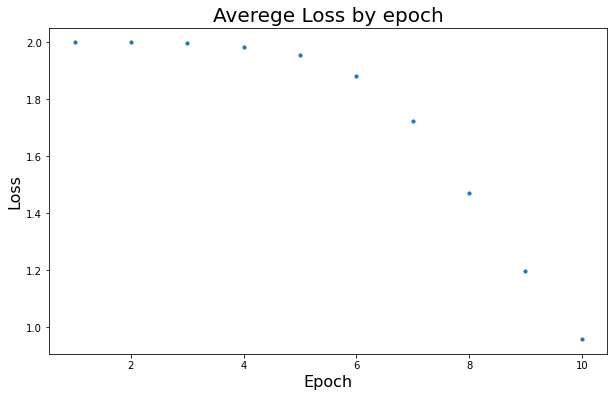

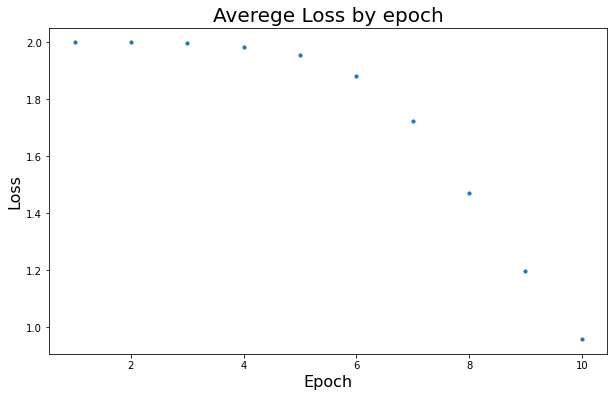

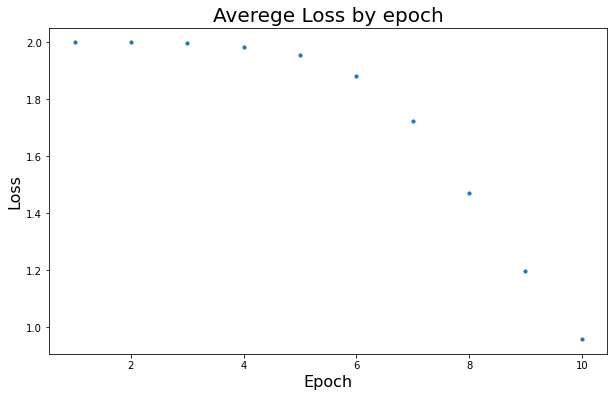

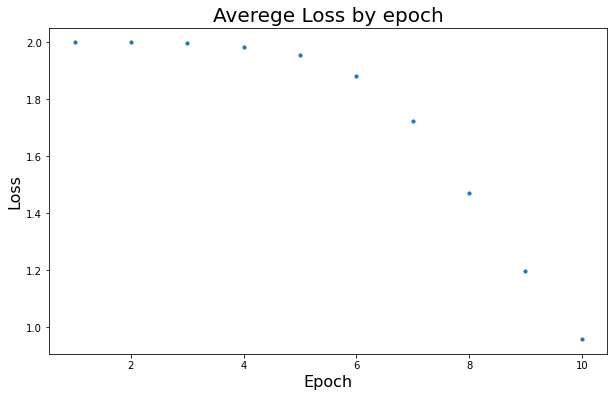

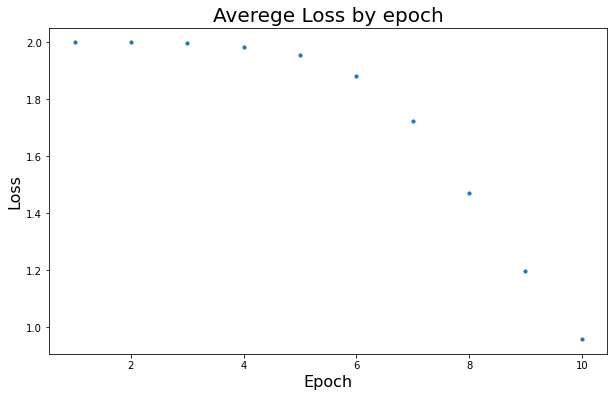

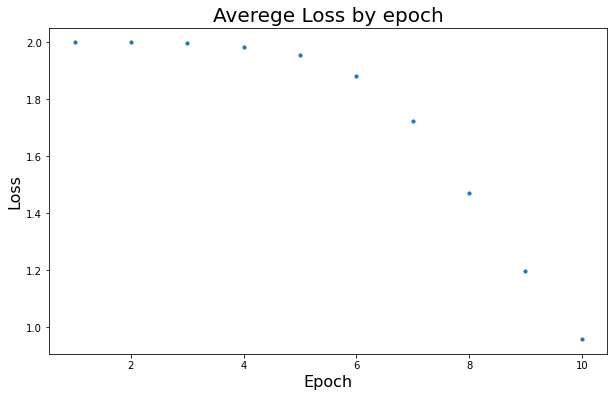

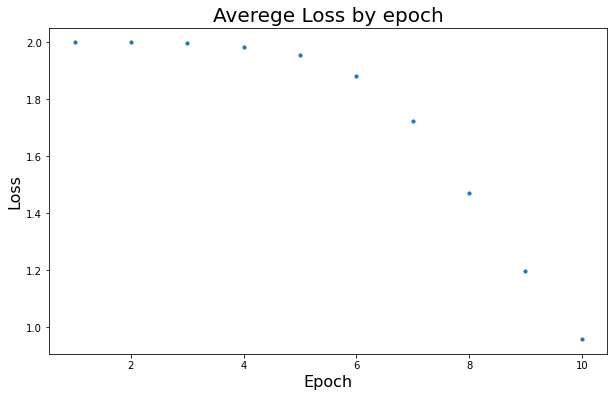

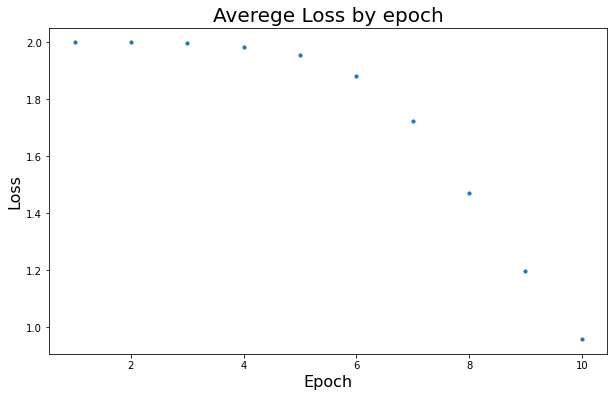

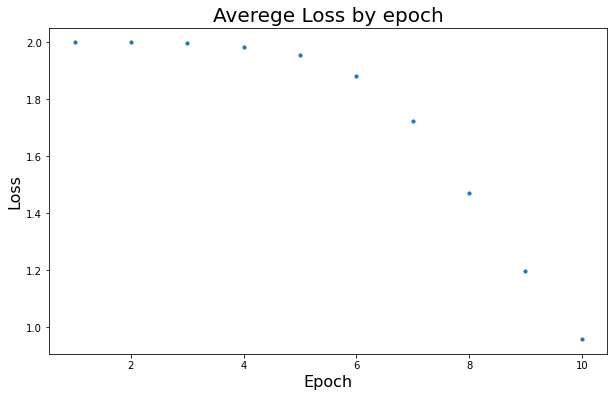

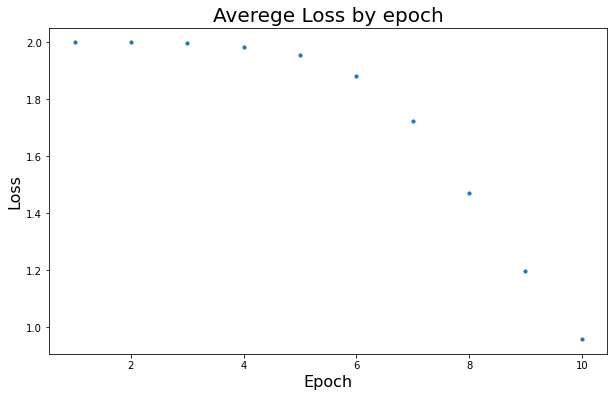

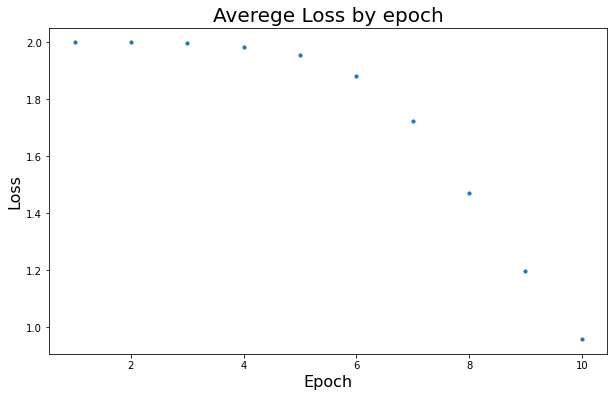

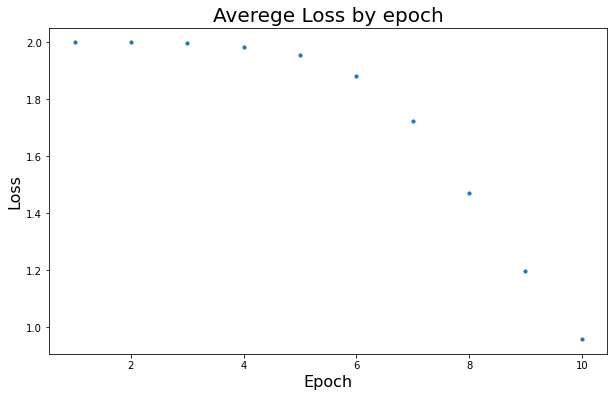

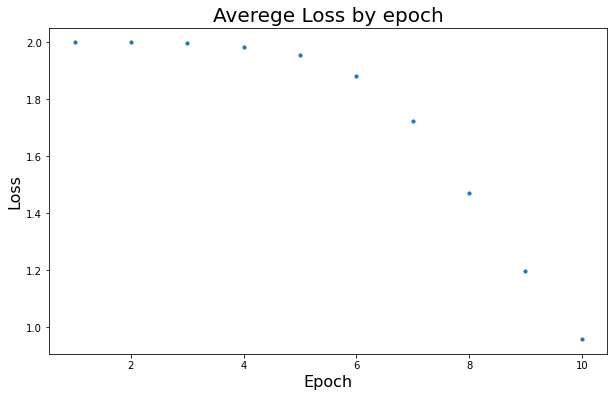

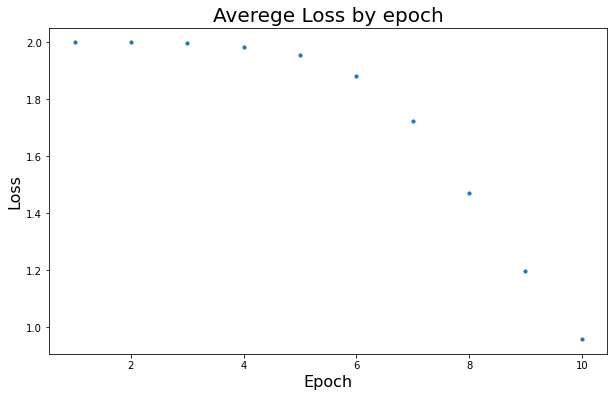

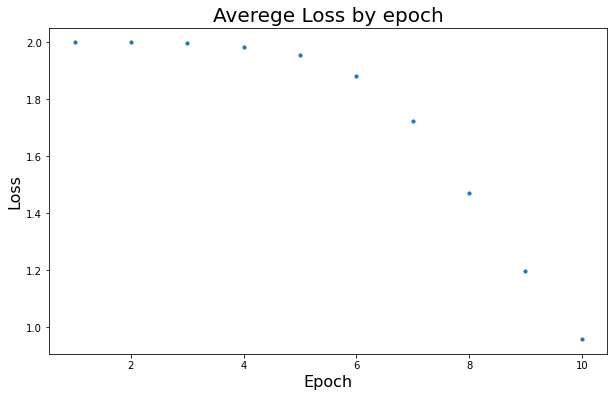

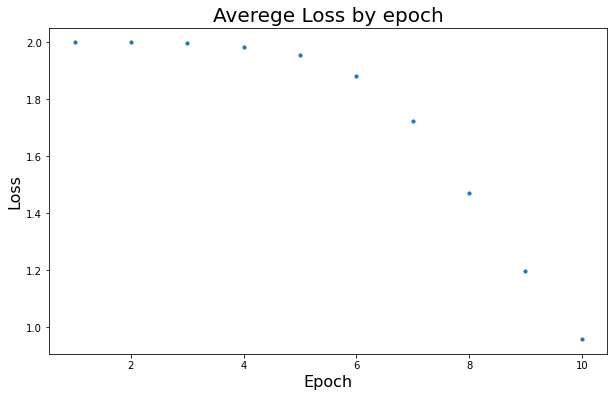

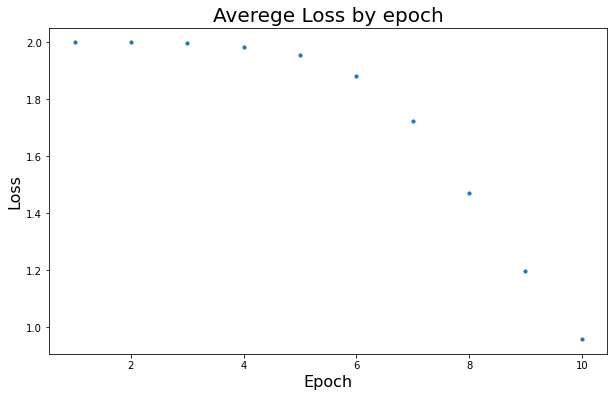

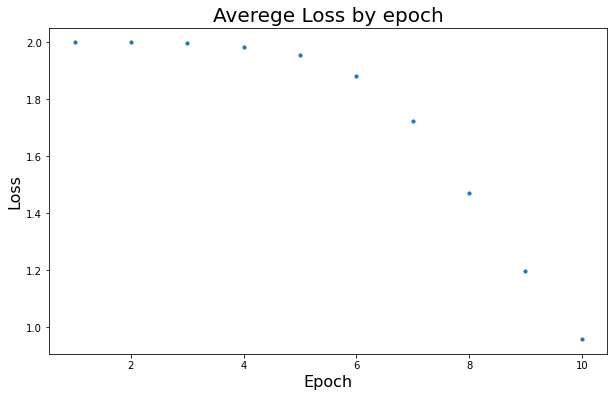

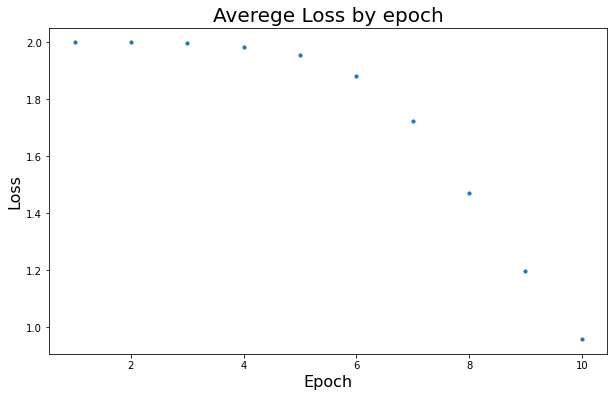

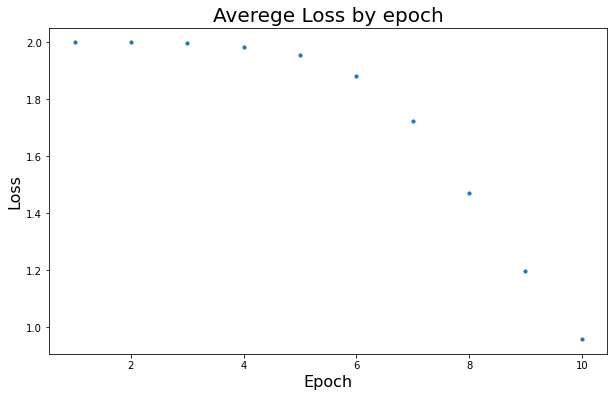

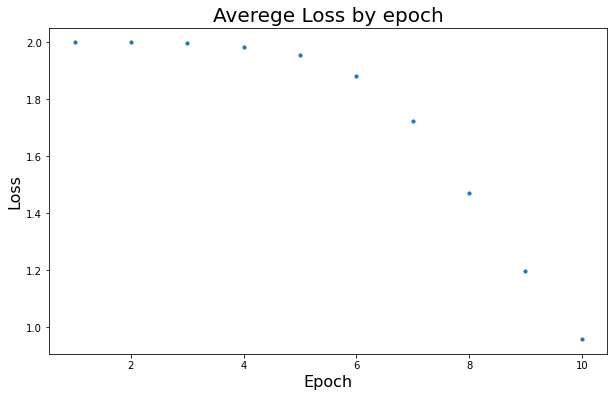

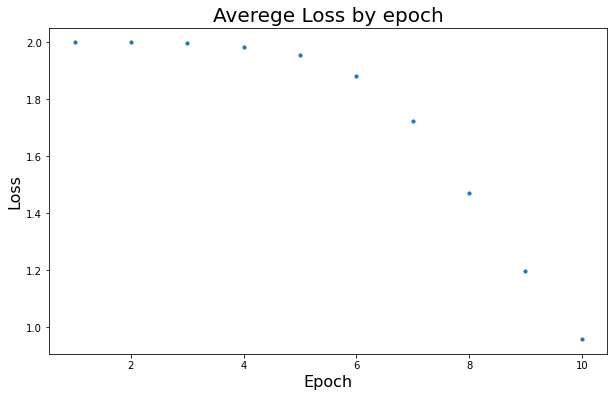

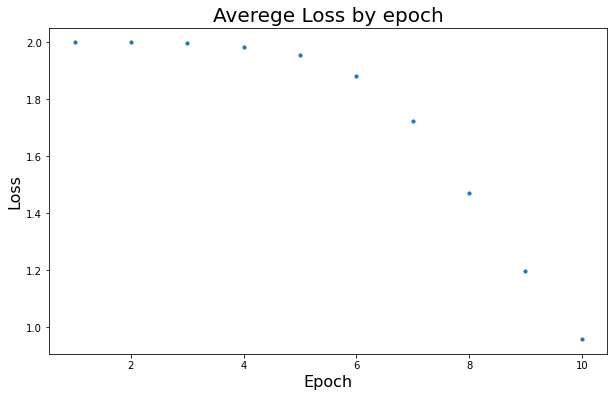

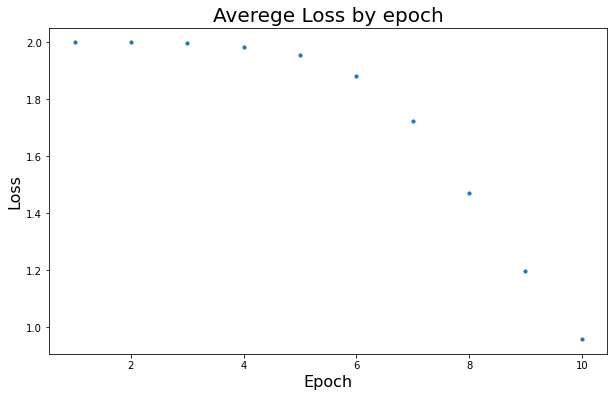

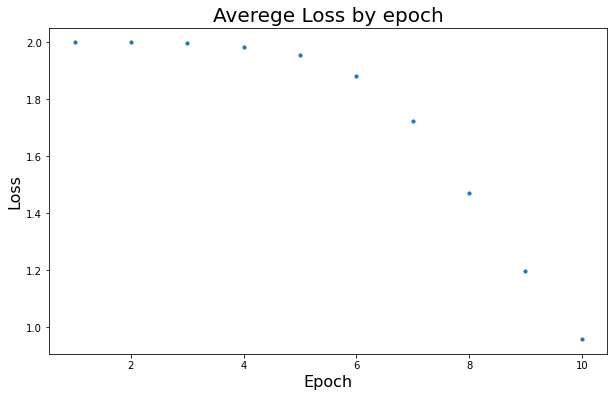

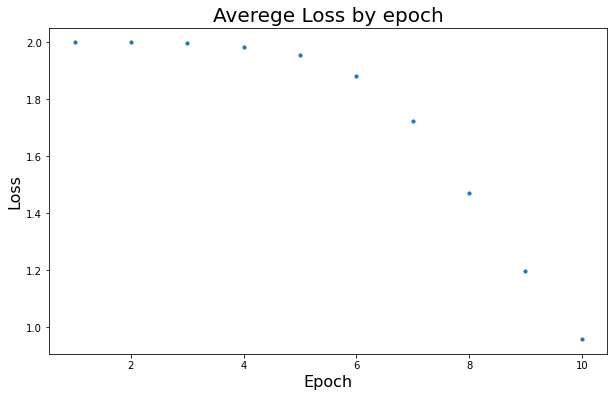

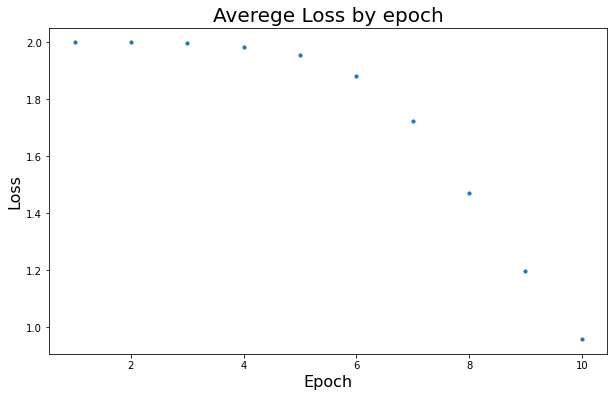

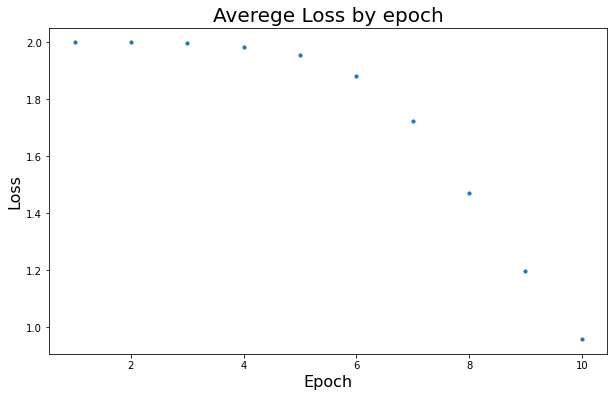

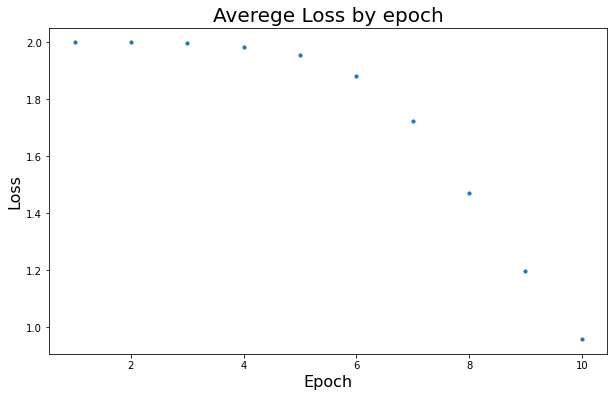

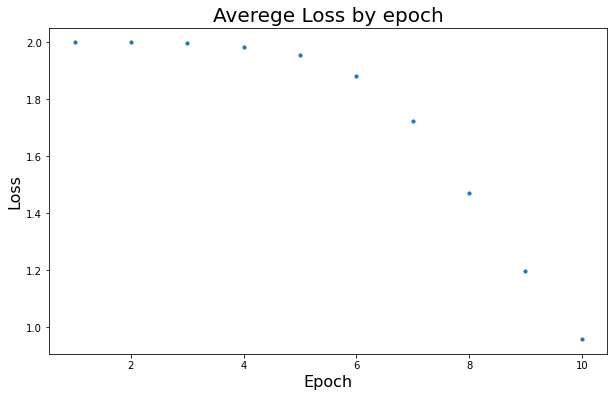

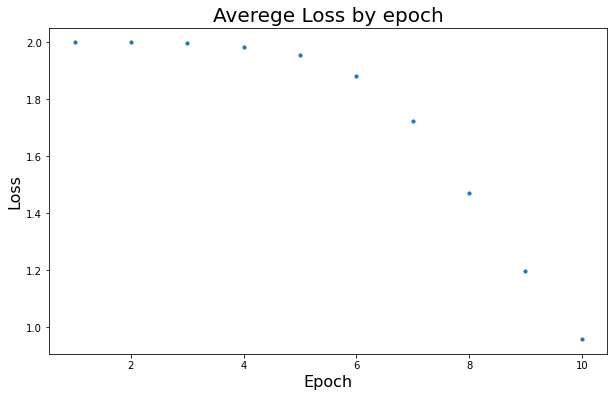

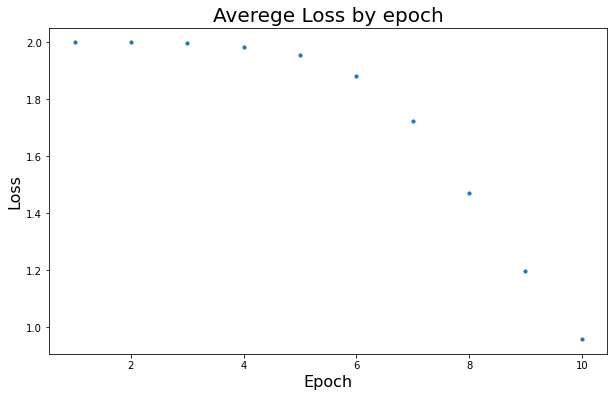

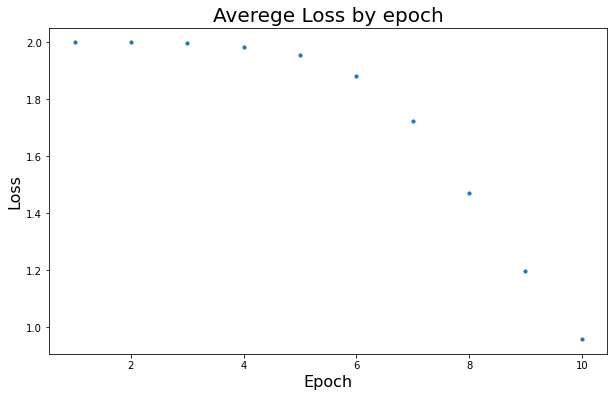

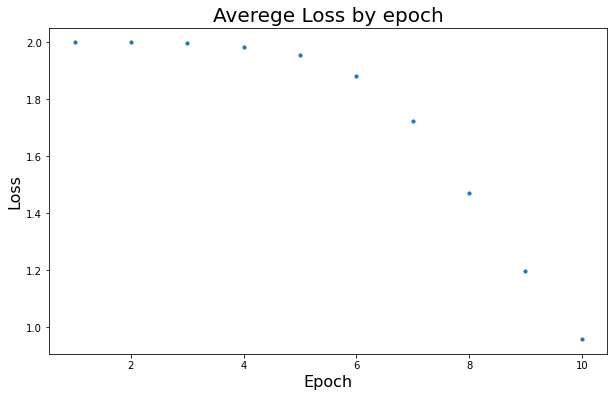

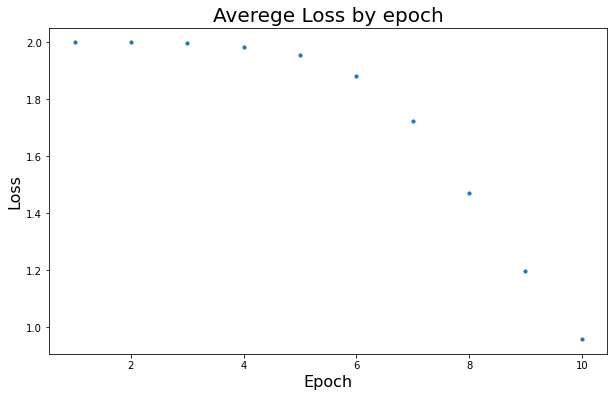

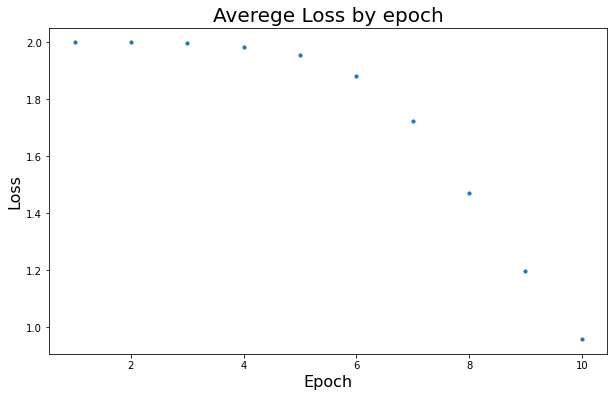

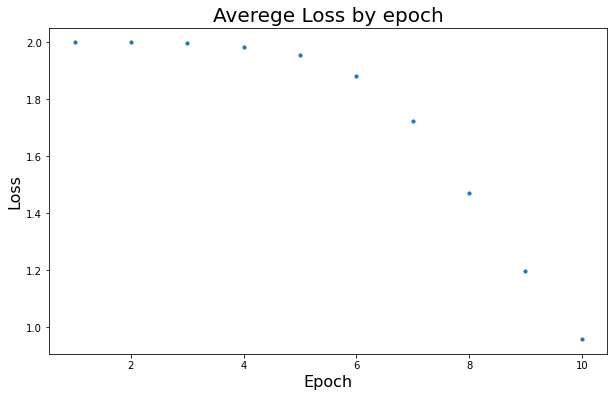

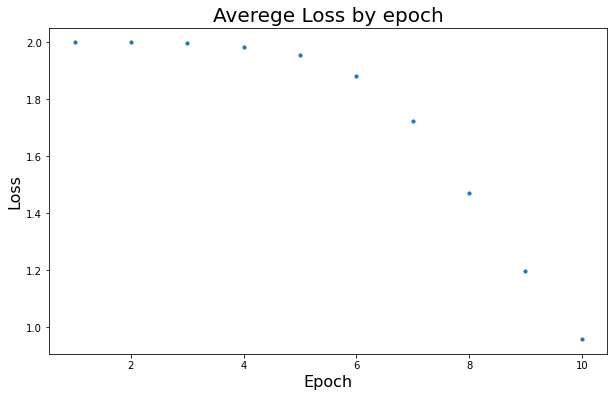

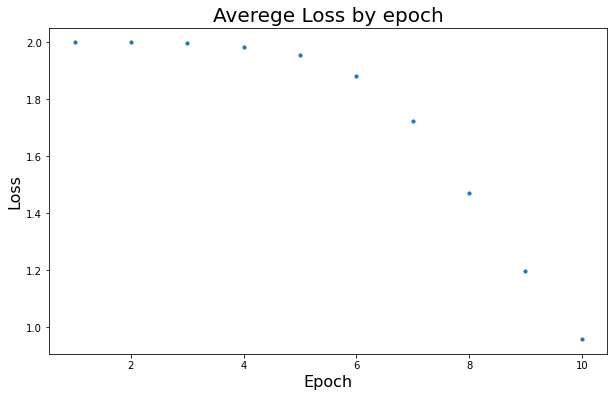

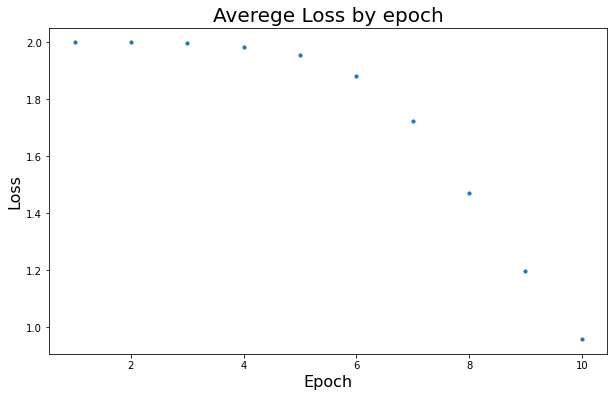

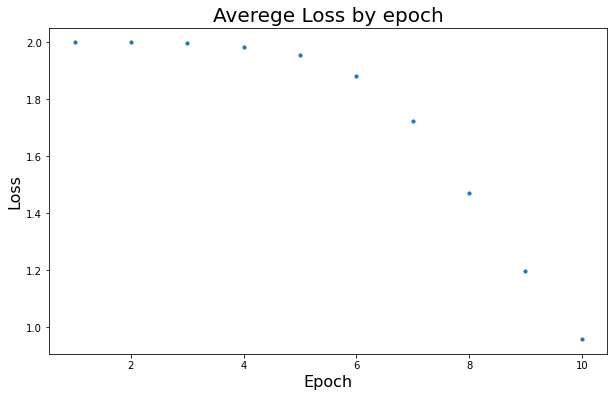

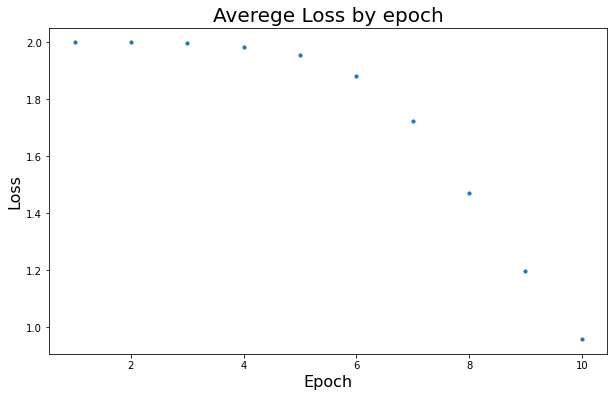

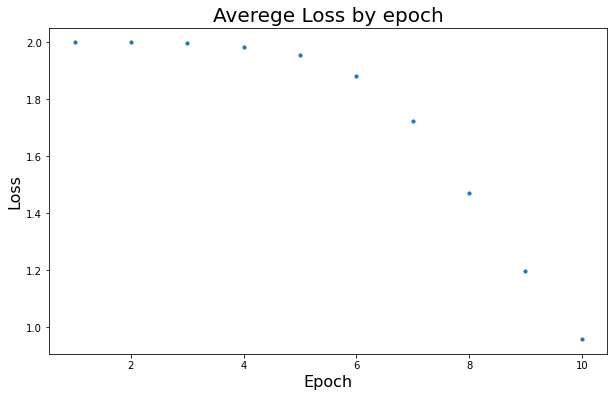

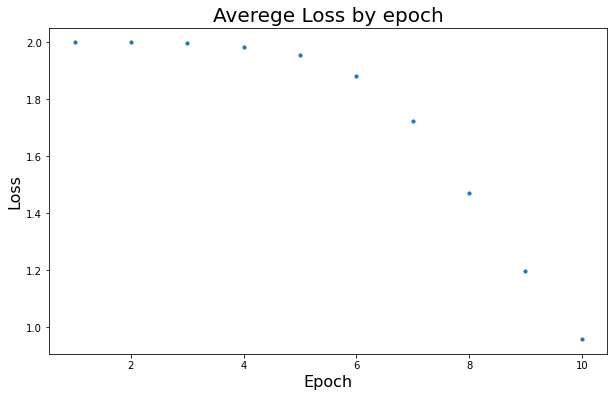

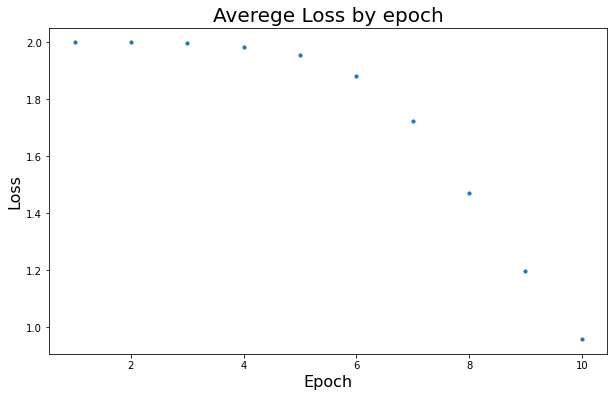

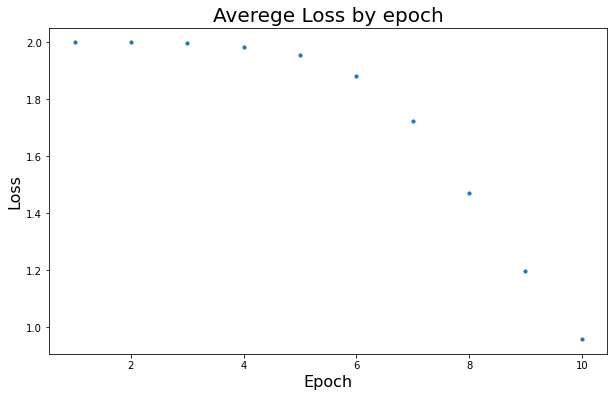

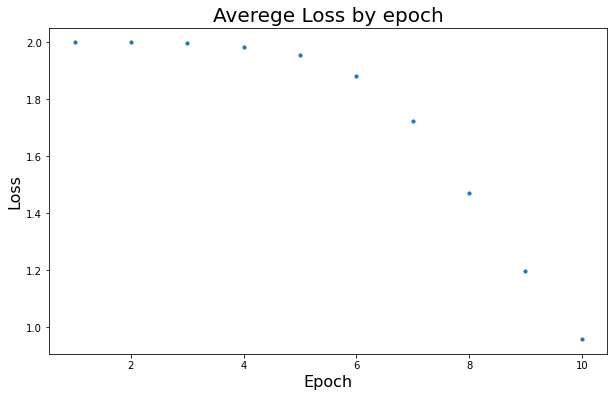

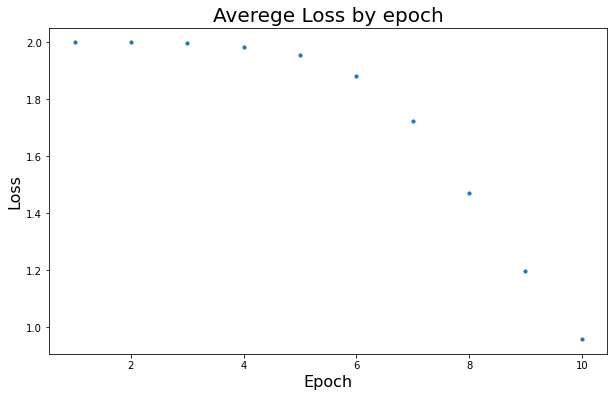

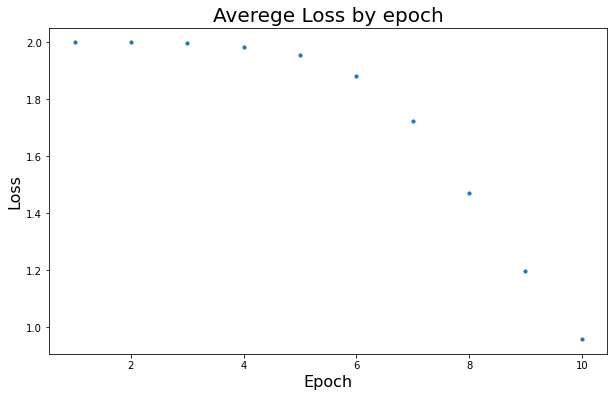

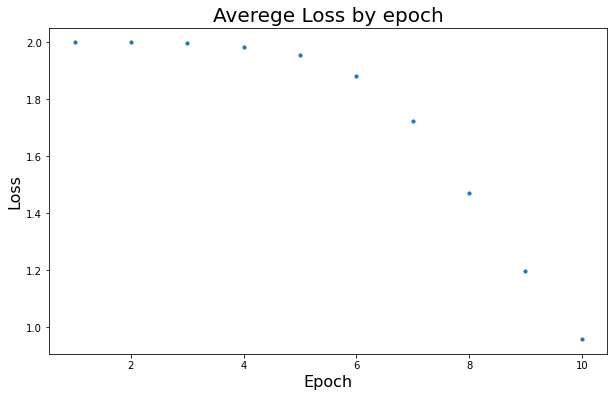

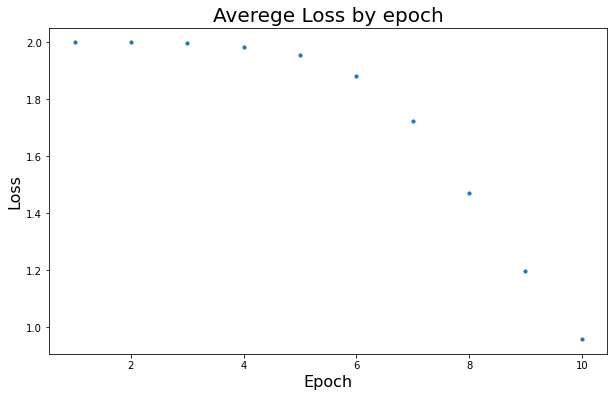

SyntaxError: 'return' outside function (<ipython-input-61-bbd90d7fce54>, line 48)

In [61]:
for I in range(0, X_train.shape[0]-1): #loop in all the passengers:
    
        # 1: input the data 
        x = X_train[I]
    
        # 2: Start the algorithm
    
        # 2.1: Feed forward
        z1 = ReLU_act(np.dot(w1, x) + b1) # output layer 1 
        z2 = ReLU_act(np.dot(w2, z1) + b2) # output layer 2
        y = sigmoid_act(np.dot(wOut, z2) + bOut) # Output of the Output layer
    
        #2.2: Compute the output layer's error
        delta_Out = 2 * (y-Y_train[I]) * sigmoid_act(y, der=True)
    
        #2.3: Backpropagate
        delta_2 = delta_Out * wOut * ReLU_act(z2, der=True) # Second Layer Error
        delta_1 = np.dot(delta_2, w2) * ReLU_act(z1, der=True) # First Layer Error
        
        # 3: Gradient descent 
        wOut = wOut - eta*delta_Out*z2  # Outer Layer
        bOut = bOut - eta*delta_Out
    
        w2 = w2 - eta*np.kron(delta_2, z1).reshape(q,p) # Hidden Layer 2
        b2 = b2 -  eta*delta_2
    
        w1 = w1 - eta*np.kron(delta_1, x).reshape(p, x.shape[0])
        b1 = b1 - eta*delta_1
    
        # 4. Computation of the loss function
        mu.append((y-Y_train[I])**2)
        vec_y.append(y)
    
        batch_loss = []
    
        for i in range(0, 10):
            loss_avg = 0
            for m in range(0, 60):
                loss_avg+=vec_y[30*i+m]/30
            batch_loss.append(loss_avg)

        plt.figure(figsize=(10,6))
        plt.scatter(np.arange(1, len(batch_loss)+1), batch_loss, alpha=1, s=10, label='error')
        plt.title('Averege Loss by epoch', fontsize=20)
        plt.xlabel('Epoch', fontsize=16)
        plt.ylabel('Loss', fontsize=16)
        plt.show()
return w1, b1, w2, b2, wOut, bOut, mu

In [63]:
def ANN_pred(X_test, w1, b1, w2, b2, wOut, bOut, mu):
    import numpy as np
    
    pred = []
    
    for I in range(0, X_test.shape[0]): #loop in all the passengers
        # 1: input the data 
        x = X_test[I]
        
        # 2.1: Feed forward
        z1 = ReLU_act(np.dot(w1, x) + b1) # output layer 1 
        z2 = ReLU_act(np.dot(w2, z1) + b2) # output layer 2
        y = sigmoid_act(np.dot(wOut, z2) + bOut)  # Output of the Output layer
        
        # Append the prediction;
        # We now need a binary classifier; we this apply an Heaviside Theta and we set to 0.5 the threshold
        # if y < 0.5 the output is zero, otherwise is 1
        pred.append( np.heaviside(y - 0.5, 1)[0] )
    return np.array(pred);

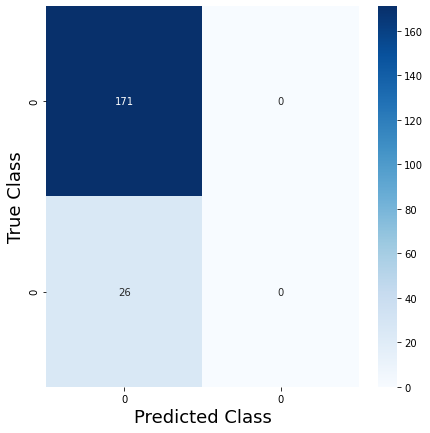

In [68]:
# Plot the confusion matrix
predictions = ANN_pred(X_test, w1, b1, w2, b2, wOut, bOut, mu)
cm = confusion_matrix(Y_test, predictions)

df_cm = pd.DataFrame(cm, index = [dict_live[i] for i in range(0,2)], columns = [dict_live[i] for i in range(0,2)])
plt.figure(figsize = (7,7))
sns.heatmap(df_cm, annot=True, cmap=plt.cm.Blues, fmt='g')
plt.xlabel("Predicted Class", fontsize=18)
plt.ylabel("True Class", fontsize=18)
plt.show()